## **House Price Prediction**



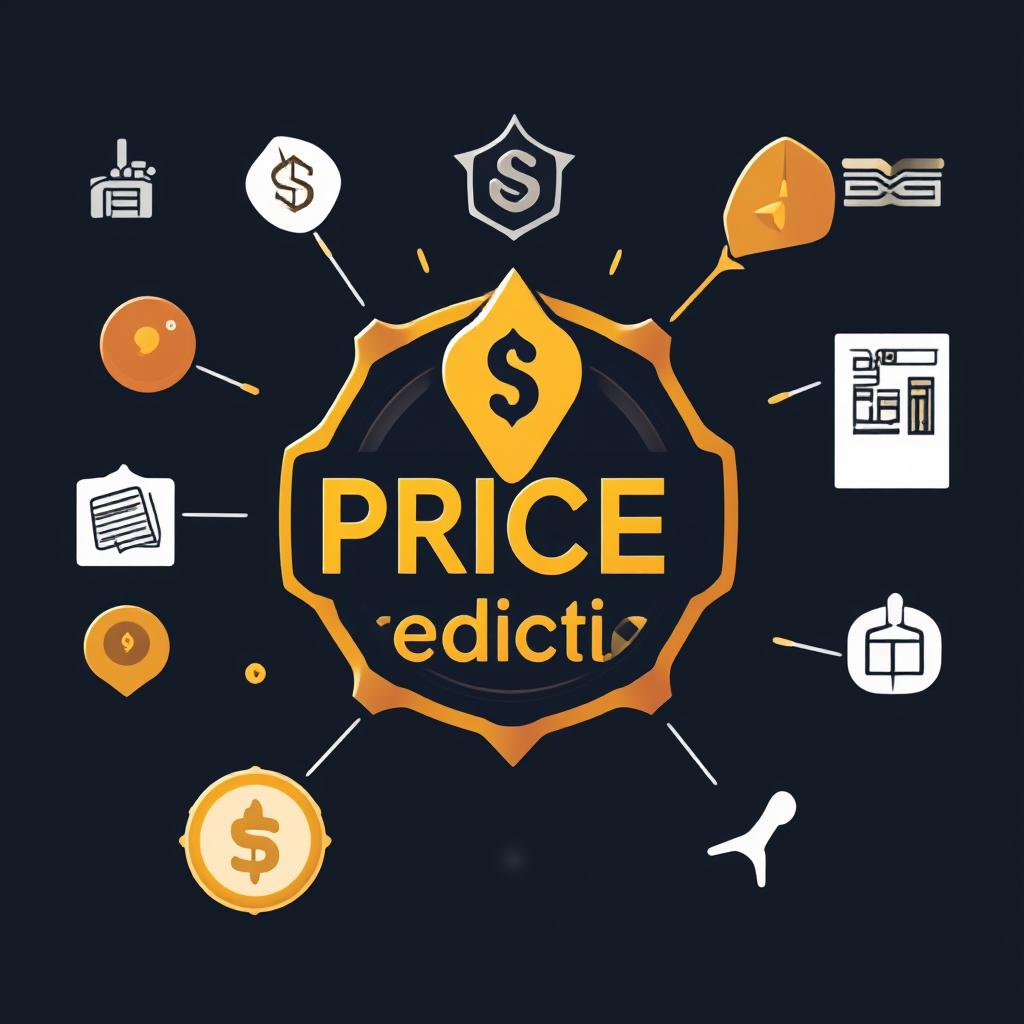

### **Context**

Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers. Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house, and you don’t know the price which you may expect—it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price.

### **Objective**

The objective of this problem statement is to predict the housing prices of a town or a suburb based on the features of the locality provided and identify the most important features to consider while predicting the prices.

### **Data Dictionary**

This dataset has 23 features, price being the target variable. The details of all the features are given below:

−	`cid`: a notation for a house

−	`dayhours`: Date house was sold

−	`price`: Price is prediction target (in $)

−	`room_bed`: Number of Bedrooms per house

−	`room_bath`: Number of bathrooms per bedrooms

−	`living_measure`: square footage of the home

−	`lot_measure`: square footage of the lot

−	`ceil`: Total floors (levels) in house

−	`coast`: House which has a view to a waterfront (0 - No, 1 - Yes)

−	`sight`: Has been viewed

−	`condition`: How good the condition is (Overall out of 5)

−	`quality`: grade given to the housing unit, based on grading system

−	`ceil_measure`: square footage of house apart from basement

−	`basement_measure`: square footage of the basement

−	`yr_built`: Built Year

−	`yr_renovated`: Year when house was renovated

−	`zipcode`: zip code

−	`lat`: Latitude coordinate

−	`long`: Longitude coordinate

−	`living_measure15`: Living room area in 2015 (implies-- some renovations) This might or might −	not have affected the lot size area

−	`lot_measure15`: lotSize area in 2015 (implies-- some renovations)

−	`furnished`: Based on the quality of room (0 - No, 1 - Yes)

−	`total_area`: Measure of both living and lot

### **Problem Definition**

If anybody wants to buy or sell house(or any property) in any city the main problem they face is to fix the right price for that particular house. Due to this they might be offering too low or high for the property.There are 'n' number of attributes which can influence the price for the house. The main intent of this project/work is to determine the right price of a house by considering the various attributes given in the dataset.

# Milestone 1

##Step 1: Load and Inspect the Data

In [ ]:
# Install any packages that are not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from IPython import get_ipython
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the Excel file
file_path = "House Price Prediction.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the identified sheet
df_original = pd.read_excel(xls, sheet_name='innercity')

In [ ]:
# Copy of original dataframe
df = df_original.copy()

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
# Display basic information about the dataset
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

## Step 2: Data Cleaning & Preprocessing

In [ ]:
# Convert 'dayhours' to datetime format
df['dayhours'] = pd.to_datetime(df['dayhours'], format='%Y%m%dT%H%M%S', errors='coerce')

# Convert 'dayhours' to YYYY-MM format
df['dayhours'] = df['dayhours'].dt.strftime('%Y-%m')

# Rename Column 'dayhours' --> 'year_month'
df.rename(columns={'dayhours':'year_month'}, inplace=True)

# Convert categorical variables to appropriate types
categorical_cols = ['ceil', 'coast', 'condition', 'furnished']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert numerical columns stored as objects to appropriate types
numeric_cols = ['yr_built', 'long', 'total_area']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Function to check null values, data types and number of unique values in each column.
def get_inform(df):
    check_df = pd.DataFrame()
    check_df['Missing_values'] = df.isnull().sum()
    check_df['data_types'] = df.dtypes
    check_df['unique'] = df.nunique()
    check_df['duplicated'] = df.duplicated()

    return check_df
get_inform(df)

Missing_values data_types  unique duplicated
cid                            0      int64   21436        NaN
year_month                     0     object      13        NaN
price                          0      int64    3625        NaN
room_bed                     108    float64      13        NaN
room_bath                    108    float64      30        NaN
living_measure                17    float64    1038        NaN
lot_measure                   42    float64    9765        NaN
ceil                          42   category       7        NaN
coast                          1   category       3        NaN
sight                         57    float64       5        NaN
condition                     57   category       6        NaN
quality                        1    float64      12        NaN
ceil_measure                   1    float64     946        NaN
basement                       1    float64     306        NaN
yr_built                      15    float64     116        NaN
yr_renovated                   0      int64      70        NaN
zipcode                        0      int64      70        NaN
lat                            0    float64    5034        NaN
long                          34    float64     752        NaN
living_measure15             166    float64     774        NaN
lot_measure15                 29    float64    8682        NaN
furnished                     29   category       2        NaN
total_area                    68    float64   11144        NaN

### Handle Missing Values

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Apply KNN Imputer to numerical columns
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Handle missing values in categorical columns (using mode imputation as an example)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Verify missing values are handled
df.isnull().sum()

cid                 0
year_month          0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cid               21613 non-null  float64 
 1   year_month        21613 non-null  object  
 2   price             21613 non-null  float64 
 3   room_bed          21613 non-null  float64 
 4   room_bath         21613 non-null  float64 
 5   living_measure    21613 non-null  float64 
 6   lot_measure       21613 non-null  float64 
 7   ceil              21613 non-null  category
 8   coast             21613 non-null  category
 9   sight             21613 non-null  float64 
 10  condition         21613 non-null  category
 11  quality           21613 non-null  float64 
 12  ceil_measure      21613 non-null  float64 
 13  basement          21613 non-null  float64 
 14  yr_built          21613 non-null  float64 
 15  yr_renovated      21613 non-null  float64 
 16  zipcode           2161

In [ ]:
# Description of the Dataset
df.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.371184e+00  9.289046e-01  0.000000e+00   
room_bath         21613.0  2.115093e+00  7.690269e-01  0.000000e+00   
living_measure    21613.0  2.079818e+03  9.182427e+02  2.900000e+02   
lot_measure       21613.0  1.509973e+04  4.138666e+04  5.200000e+02   
sight             21613.0  2.341276e-01  7.657419e-01  0.000000e+00   
quality           21613.0  7.656855e+00  1.175457e+00  1.000000e+00   
ceil_measure      21613.0  1.788368e+03  8.280834e+02  2.900000e+02   
basement          21613.0  2.915173e+02  4.425713e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.936936e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408197e-01 -1.225190e+02   
living_measure15  21613.0  1.986691e+03  6.847548e+02  3.990000e+02   
lot_measure15     21613.0  1.276203e+04  2.727111e+04  6.510000e+02   
total_area        21613.0  1.717963e+04  4.156833e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.620000e+03  1.068800e+04  1.651359e+06  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
total_area        7.035000e+03  9.580000e+03  1.300000e+04  1.652659e+06

### Convert or Add new features from existing ones

In [ ]:
# Extract only year of sale from dayhours
year = []
for i in df['year_month']:
    y = int(str(i)[:4])
    year.append(y)
df['sold_year']= year

In [ ]:
# Convert 'sold_year' and 'yr_built' to integers (if they contain non-numeric values, they will become NaN)
df["sold_year"] = pd.to_numeric(df["sold_year"], errors="coerce")
df["yr_built"] = pd.to_numeric(df["yr_built"], errors="coerce")

# Calculate the 'house_age' feature
df["house_age"] = df["sold_year"] - df["yr_built"] + 1

In [ ]:
# Convert specified columns to numeric, then to Int64 and round to integers
columns_to_convert = ['price', 'house_age', 'yr_built', 'living_measure', 'living_measure15', 'lot_measure', 'lot_measure15', 'living_measure15',
                   'ceil', 'coast', 'sight', 'condition', 'furnished', 'total_area', 'room_bed', 'room_bath', 'ceil_measure', 'basement', 'quality',
                   'yr_renovated', 'yr_built', 'long', 'lat', 'zipcode', 'sold_year']

for col in columns_to_convert:
    # Convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Round to the nearest integer
    df[col] = df[col].round(0).astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   year_month        21613 non-null  object 
 2   price             21613 non-null  Int64  
 3   room_bed          21613 non-null  Int64  
 4   room_bath         21613 non-null  Int64  
 5   living_measure    21613 non-null  Int64  
 6   lot_measure       21613 non-null  Int64  
 7   ceil              21583 non-null  Int64  
 8   coast             21583 non-null  Int64  
 9   sight             21613 non-null  Int64  
 10  condition         21585 non-null  Int64  
 11  quality           21613 non-null  Int64  
 12  ceil_measure      21613 non-null  Int64  
 13  basement          21613 non-null  Int64  
 14  yr_built          21613 non-null  Int64  
 15  yr_renovated      21613 non-null  Int64  
 16  zipcode           21613 non-null  Int64 

We can observe that after converting some features to numerical and coercing them, there appears some NAN values. We use then KNN Imputer to treat the columns with NANs.

In [ ]:
# Separate numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Apply KNN Imputer to numerical columns with NaNs
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [ ]:
# Convert specified columns to int64
for col in columns_to_convert:
    df[col] = df[col].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   year_month        21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  int64  
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  int64  
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
# Verify missing values are handled
df.isnull().sum()

cid                 0
year_month          0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
sold_year           0
house_age           0
dtype: int64

In [ ]:
# Calculate the unique values of the categorical variables: 'room_bed', 'room_bath', 'ceil', 'coast', 'quality', 'condition', 'sight', 'furnished'
unique_room_bed = sorted(df['room_bed'].unique())
unique_room_bath = sorted(df['room_bath'].unique())
unique_ceil = sorted(df['ceil'].unique())
unique_coast = sorted(df['coast'].unique())
unique_quality = sorted(df['quality'].unique())
unique_condition = sorted(df['condition'].unique())
unique_sight = sorted(df['sight'].unique())
unique_furnished = sorted(df['furnished'].unique())

print("Unique room_bed values (sorted):", unique_room_bed)
print("Unique room_bath values (sorted):", unique_room_bath)
print("Unique ceil values (sorted):", unique_ceil)
print("Unique coast values (sorted):", unique_coast)
print("Unique quality values (sorted):", unique_quality)
print("Unique condition values (sorted):", unique_condition)
print("Unique sight values (sorted):", unique_sight)
print("Unique furnished values (sorted):", unique_furnished)

Unique room_bed values (sorted): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
Unique room_bath values (sorted): [0, 1, 2, 3, 4, 5, 6, 7, 8]
Unique ceil values (sorted): [1, 2, 3, 4]
Unique coast values (sorted): [0, 1]
Unique quality values (sorted): [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Unique condition values (sorted): [1, 2, 3, 4, 5]
Unique sight values (sorted): [0, 1, 2, 3, 4]
Unique furnished values (sorted): [0, 1]


In [ ]:
# Convert categorical variables to appropriate types
cat_cols = ['room_bed', 'room_bath', 'ceil', 'coast', 'quality', 'condition', 'sight', 'furnished']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
def analyze_categorical_features(df, cat_cols):
    """
    Calculates the frequency of each category in the specified columns and shows the corresponding mean of the price.

    Args:
        df: The input DataFrame.
        cat_cols: A list of categorical column names.
    """
    for col in cat_cols:
        print(f"Frequency and Mean Price for {col}:")
        # Calculate frequency and mean price
        freq_df = df.groupby(col)['price'].agg(['count', 'mean']).reset_index()
        print(freq_df)
        # Create the plot
        fig, ax1 = plt.subplots(figsize=(10, 6))
        # Bar plot for frequency on the primary y-axis
        ax1.bar(freq_df[col], freq_df['count'], color='lightblue', label='Frequency')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Frequency', color='lightblue')
        ax1.tick_params(axis='y', labelcolor='lightblue')
        # Line plot for mean price on the secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(freq_df[col], freq_df['mean'], color='green', marker='o', label='Mean Price')
        ax2.set_ylabel('Mean Price', color='green')
        ax2.tick_params(axis='y', labelcolor='green')
        # Add title and legend
        plt.title(f'Frequency and Mean Price vs. {col}')
        fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
        plt.show()
        print("-" * 20)

Frequency and Mean Price for room_bed:
   room_bed  count          mean
0         0     13  4.102231e+05
1         1    197  3.189286e+05
2         2   2755  4.014207e+05
3         3   9821  4.661674e+05
4         4   6897  6.354905e+05
5         5   1598  7.864493e+05
6         6    270  8.274895e+05
7         7     38  9.514478e+05
8         8     13  1.105077e+06
9         9      6  8.939998e+05
10       10      3  8.200000e+05
11       11      1  5.200000e+05
12       33      1  6.400000e+05


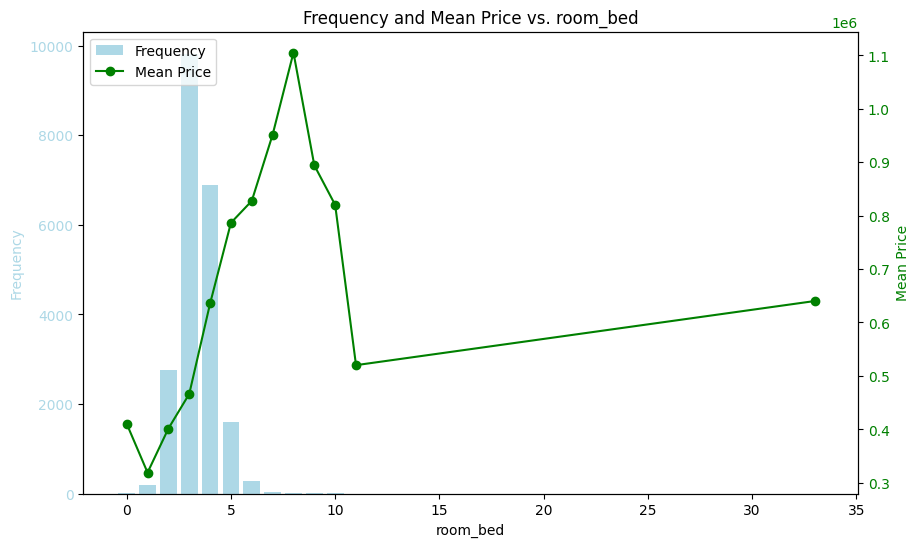

--------------------
Frequency and Mean Price for room_bath:
  room_bath  count          mean
0         0     14  3.886036e+05
1         1   3920  3.465683e+05
2         2  13868  5.005330e+05
3         3   2530  7.474795e+05
4         4   1194  1.078614e+06
5         5     57  1.847437e+06
6         6     24  2.603958e+06
7         7      2  2.735000e+06
8         8      4  4.330000e+06


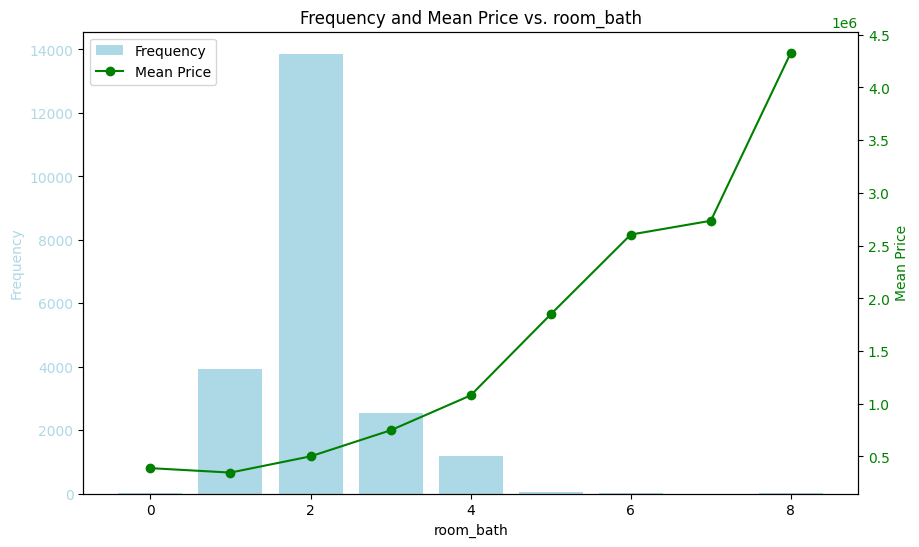

--------------------
Frequency and Mean Price for ceil:
  ceil  count           mean
0    1  10711  442630.375875
1    2  10284  638930.905290
2    3    610  583124.773770
3    4      8  933937.500000


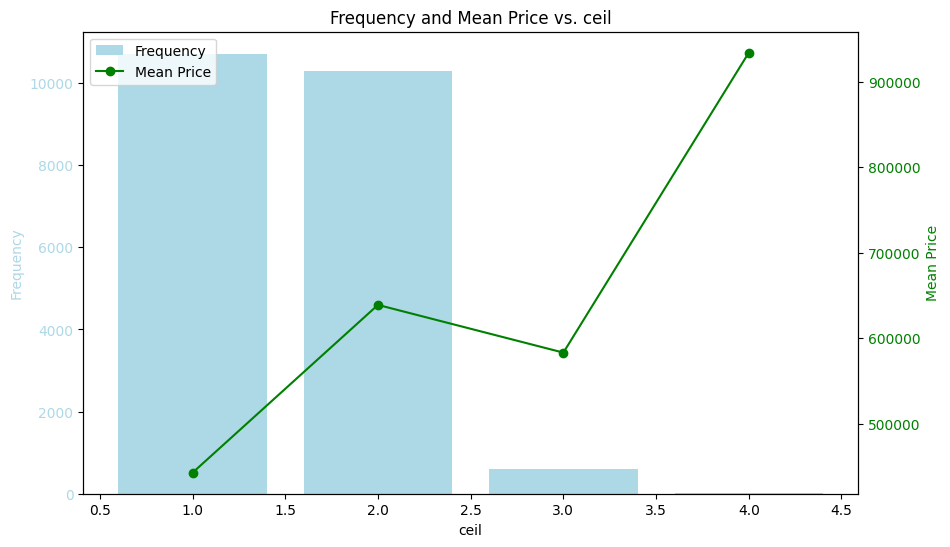

--------------------
Frequency and Mean Price for coast:
  coast  count          mean
0     0  21452  5.317155e+05
1     1    161  1.668301e+06


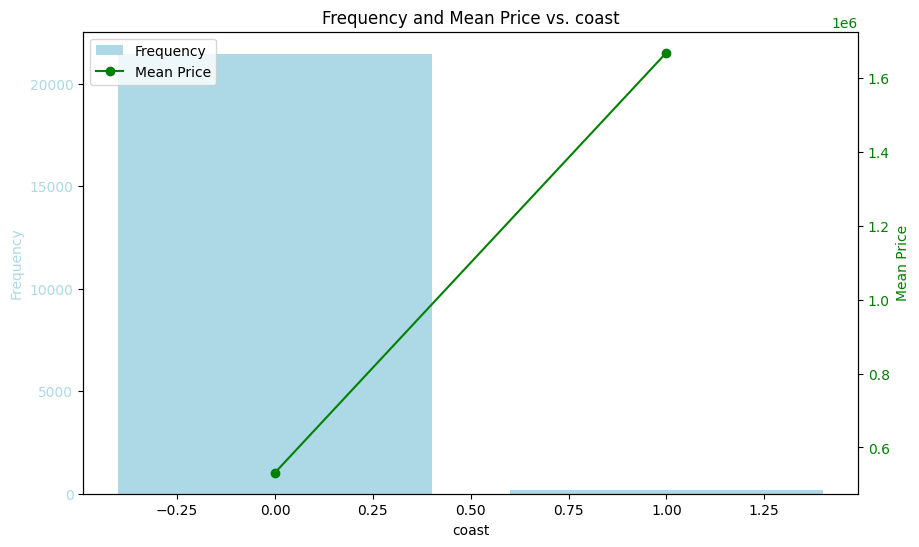

--------------------
Frequency and Mean Price for quality:
   quality  count          mean
0        1      1  1.420000e+05
1        3      3  2.056667e+05
2        4     29  2.143810e+05
3        5    242  2.485240e+05
4        6   2038  3.019166e+05
5        7   8981  4.025933e+05
6        8   6068  5.428955e+05
7        9   2615  7.737382e+05
8       10   1134  1.072347e+06
9       11    399  1.497792e+06
10      12     90  2.192500e+06
11      13     13  3.710769e+06


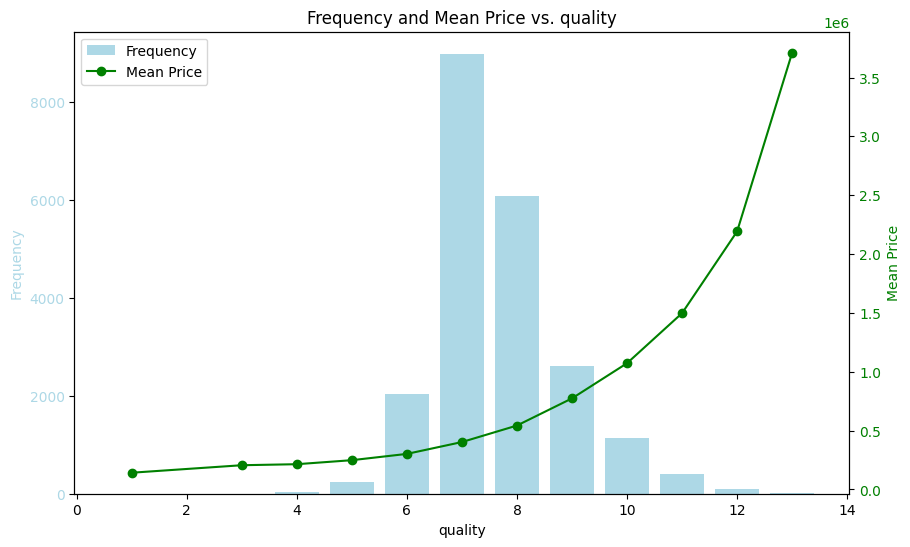

--------------------
Frequency and Mean Price for condition:
  condition  count           mean
0         1     30  334431.666667
1         2    172  326269.122093
2         3  14056  542337.691662
3         4   5661  520774.761526
4         5   1694  612515.489965


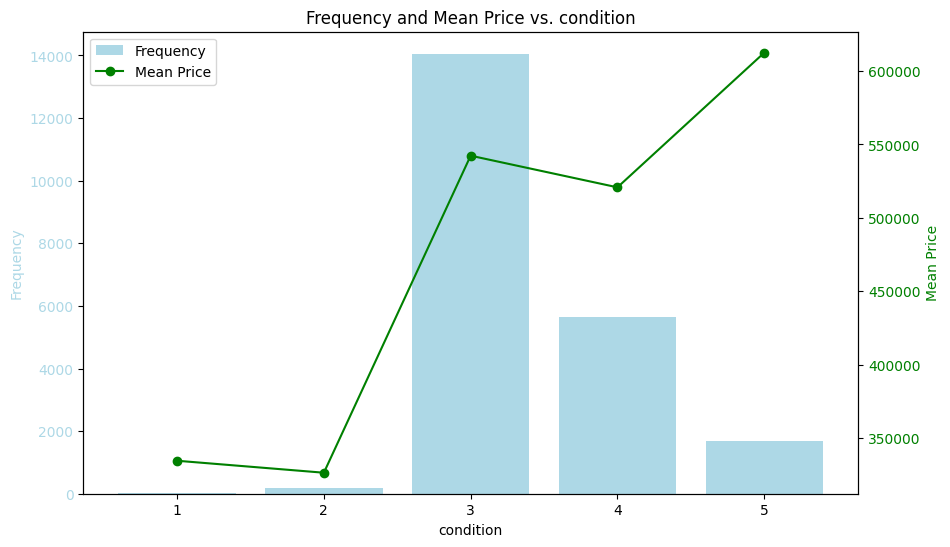

--------------------
Frequency and Mean Price for sight:
  sight  count          mean
0     0  19489  4.966133e+05
1     1    335  8.174811e+05
2     2    961  7.911354e+05
3     3    510  9.724684e+05
4     4    318  1.466554e+06


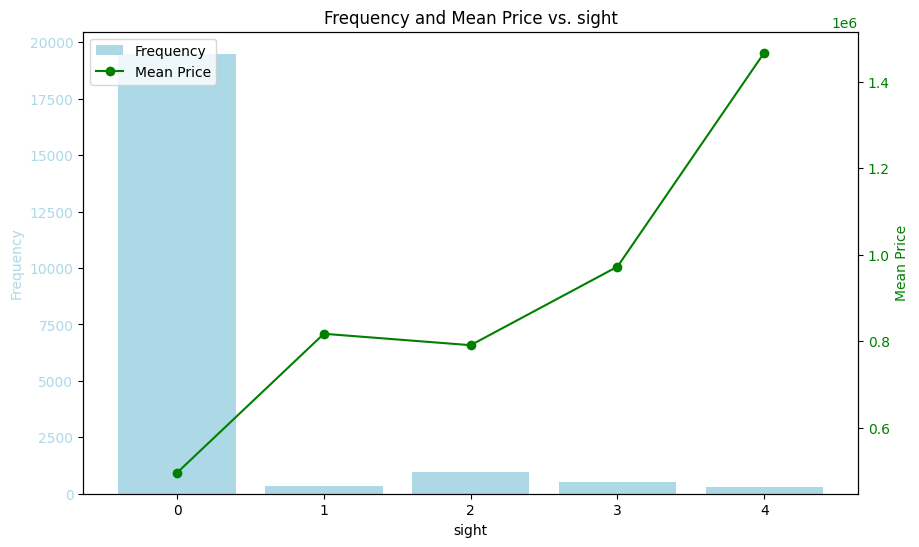

--------------------
Frequency and Mean Price for furnished:
  furnished  count           mean
0         0  17367  437403.973628
1         1   4246  960565.753179


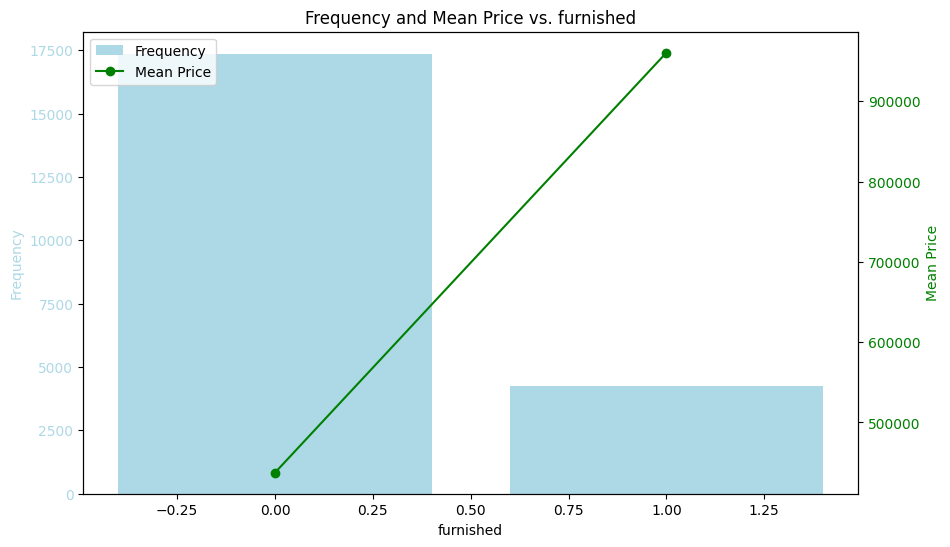

--------------------


In [ ]:
## Calculate the frequency of each category in the specified columns and show the corresponding mean of the price
analyze_categorical_features(df, cat_cols)

In [ ]:
# Replacing room_bed values with low frequency with room_bed values that are closer in mean_price
df.room_bed = df.room_bed.replace({0: 2, 7: 6, 8: 6, 9: 6, 10: 6, 11: 3, 33: 4})
# Replacing room_bath values with low frequency with room_bath values that are closer in mean_price
df.room_bath = df.room_bath.replace({0: 1, 4: 3, 5: 3, 6: 3, 7: 3, 8: 2})
# Replacing ceil values with low frequency with ceil values that are closer in mean_price
df.ceil = df.ceil.replace({4: 2})
# Replacing sight values with low frequency with sight values that are closer in mean_price
df.sight = df.sight.replace({4: 3})
# Replacing quality values with low frequency with quality values that are closer in mean_price
df.quality = df.quality.replace({1: 6, 3: 6, 4: 6, 5: 6, 10: 6, 11: 6, 12: 6, 13: 6})
# Replacing condition values with low frequency with condition values that are closer in mean_price
df.condition = df.condition.replace({1: 2})

Frequency and Mean Price for room_bed:
  room_bed  count           mean
0        1    197  318928.598985
1        2   2768  401462.078035
2        3   9822  466172.854714
3        4   6898  635491.172514
4        5   1598  786449.296621
5        6    330  853839.906061


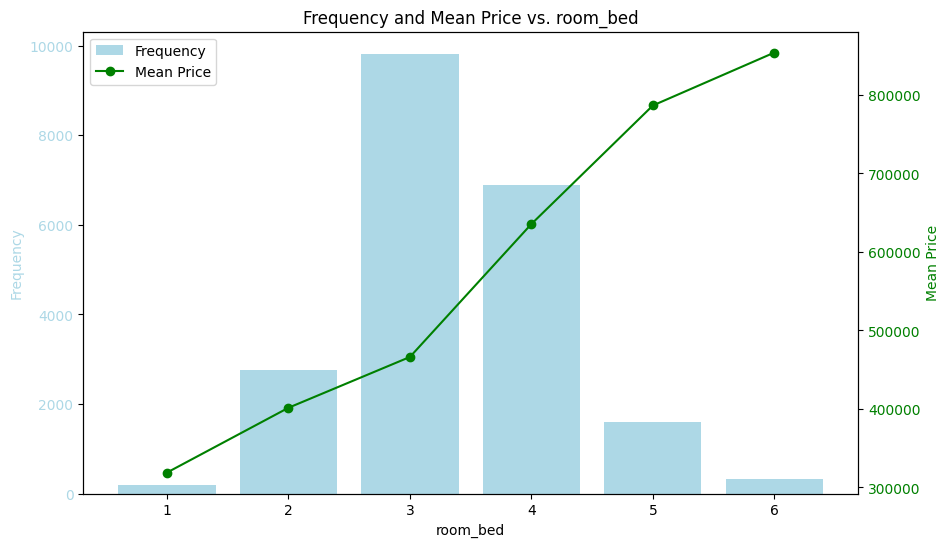

--------------------
Frequency and Mean Price for room_bath:
  room_bath  count           mean
0         1   3934  346717.852059
1         2  13872  501637.196583
2         3   3807  880551.031521


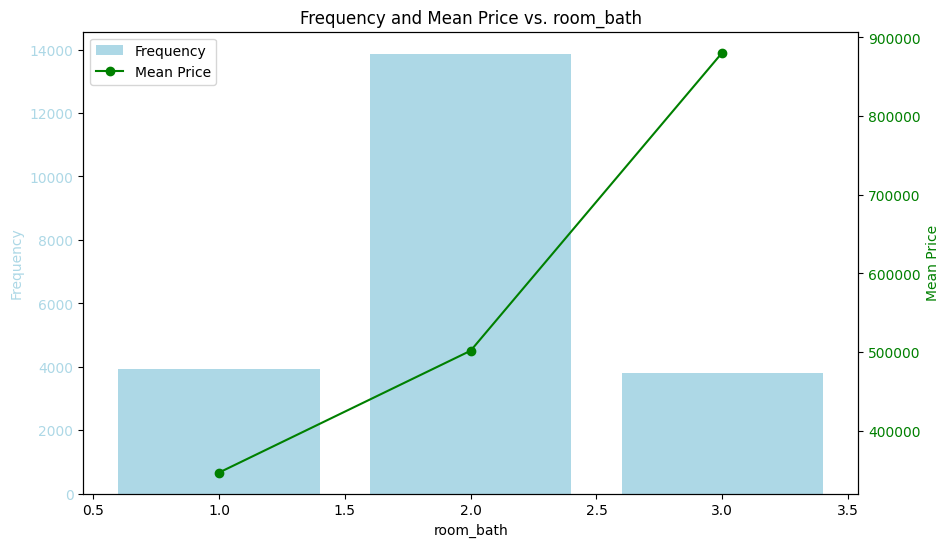

--------------------
Frequency and Mean Price for ceil:
  ceil  count           mean
0    1  10711  442630.375875
1    2  10292  639160.214730
2    3    610  583124.773770


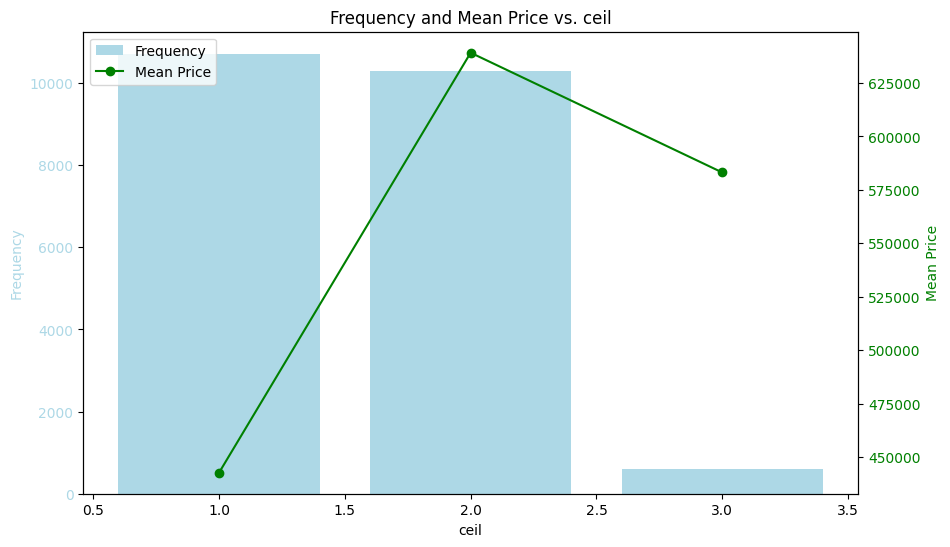

--------------------
Frequency and Mean Price for coast:
  coast  count          mean
0     0  21452  5.317155e+05
1     1    161  1.668301e+06


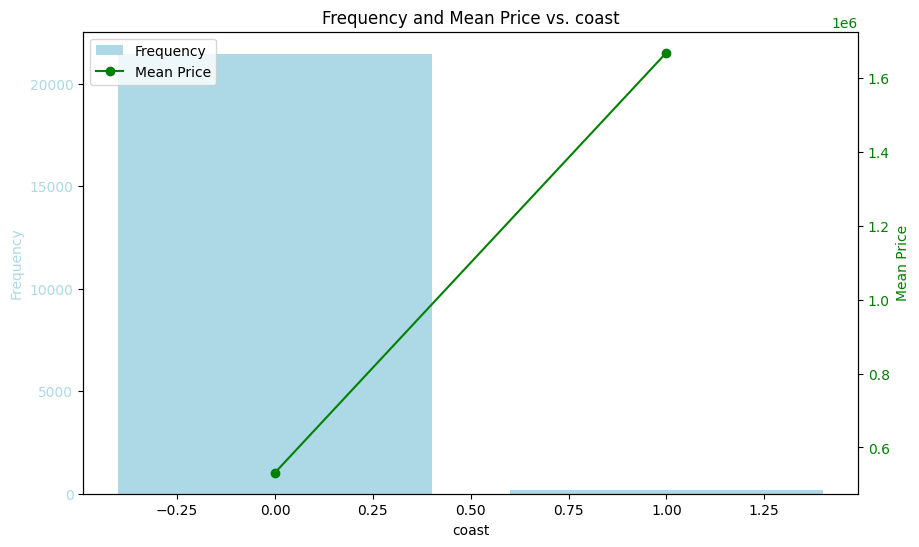

--------------------
Frequency and Mean Price for quality:
  quality  count           mean
0       6   3949  694264.626234
1       7   8981  402593.324351
2       8   6068  542895.499670
3       9   2615  773738.222180


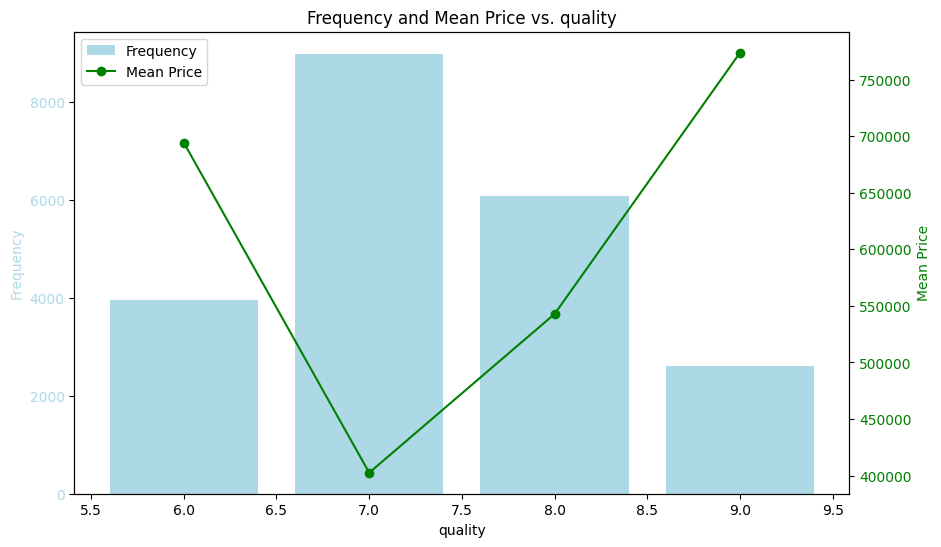

--------------------
Frequency and Mean Price for condition:
  condition  count           mean
0         2    202  327481.381188
1         3  14056  542337.691662
2         4   5661  520774.761526
3         5   1694  612515.489965


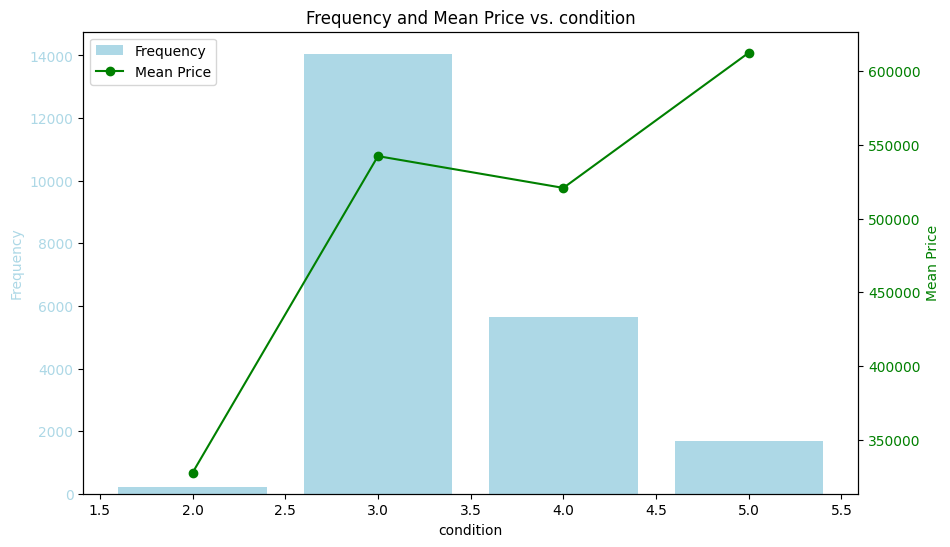

--------------------
Frequency and Mean Price for sight:
  sight  count          mean
0     0  19489  4.966133e+05
1     1    335  8.174811e+05
2     2    961  7.911354e+05
3     3    828  1.162226e+06


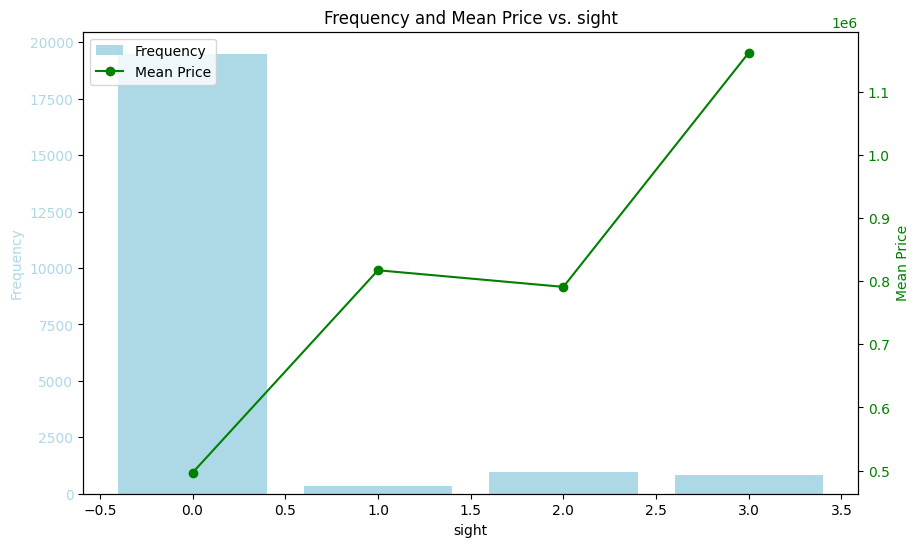

--------------------
Frequency and Mean Price for furnished:
  furnished  count           mean
0         0  17367  437403.973628
1         1   4246  960565.753179


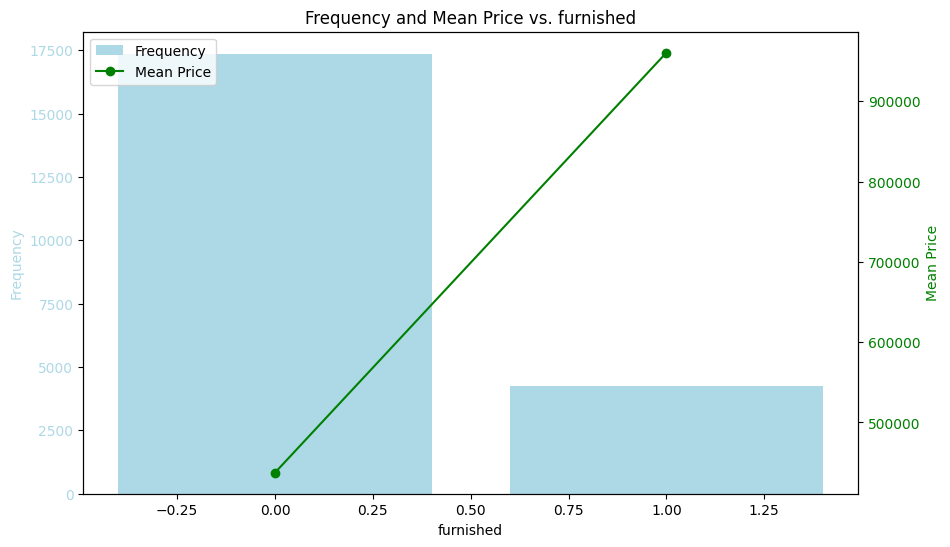

--------------------


In [ ]:
## Calculate the frequency of each category in the specified columns and show the corresponding mean of the price
analyze_categorical_features(df, cat_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cid               21613 non-null  float64 
 1   year_month        21613 non-null  object  
 2   price             21613 non-null  int64   
 3   room_bed          21613 non-null  category
 4   room_bath         21613 non-null  category
 5   living_measure    21613 non-null  int64   
 6   lot_measure       21613 non-null  int64   
 7   ceil              21613 non-null  category
 8   coast             21613 non-null  category
 9   sight             21613 non-null  category
 10  condition         21613 non-null  category
 11  quality           21613 non-null  category
 12  ceil_measure      21613 non-null  int64   
 13  basement          21613 non-null  int64   
 14  yr_built          21613 non-null  int64   
 15  yr_renovated      21613 non-null  int64   
 16  zipcode           2161

### Outlier Detection and Handling

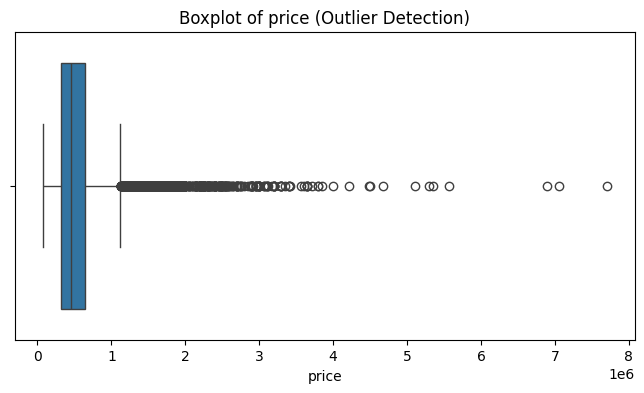

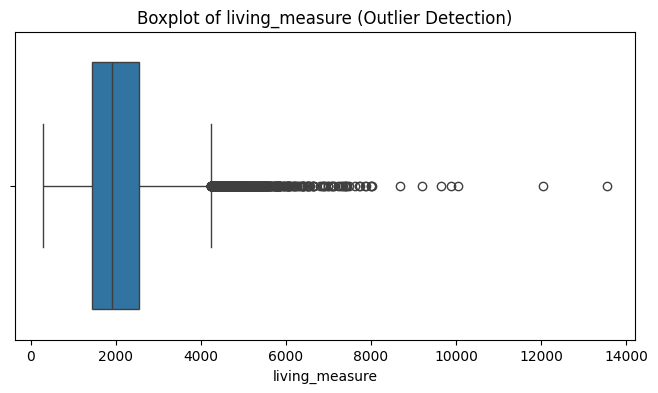

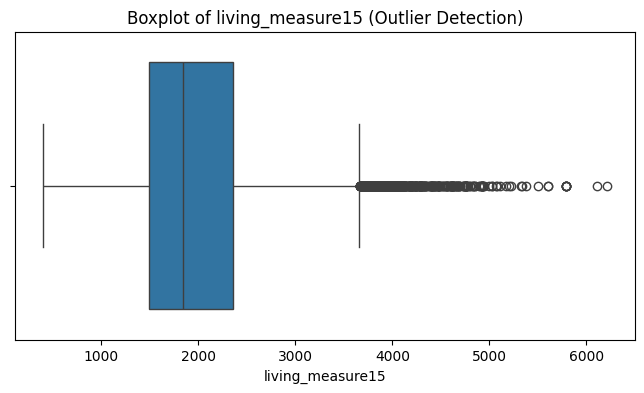

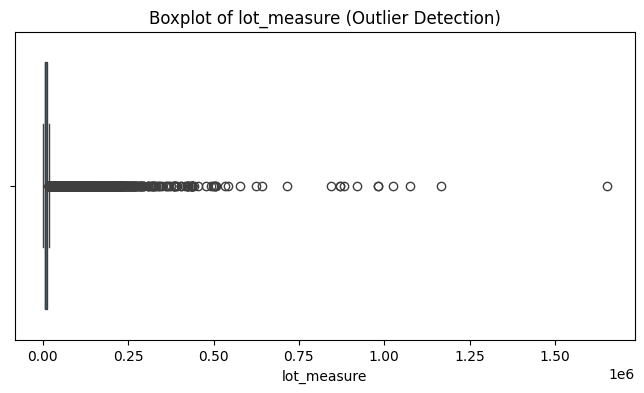

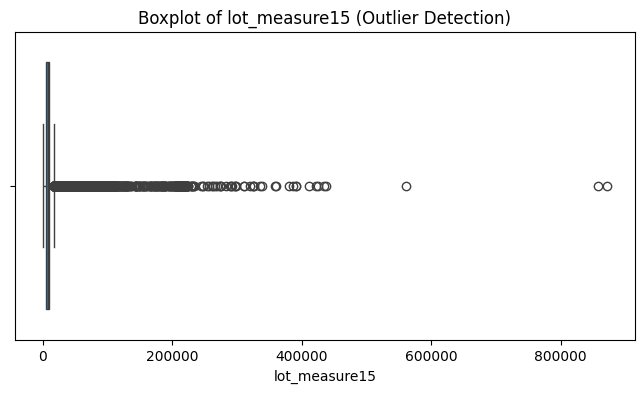

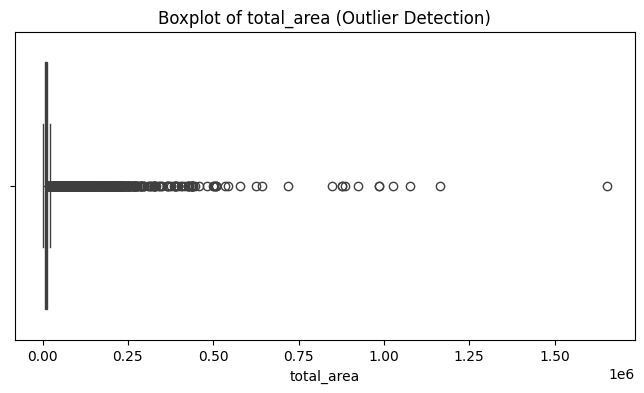

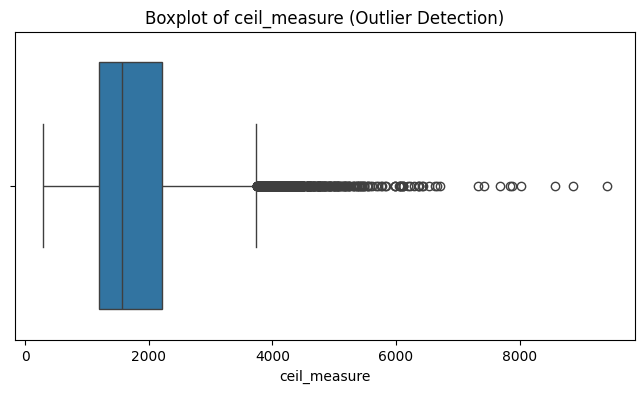

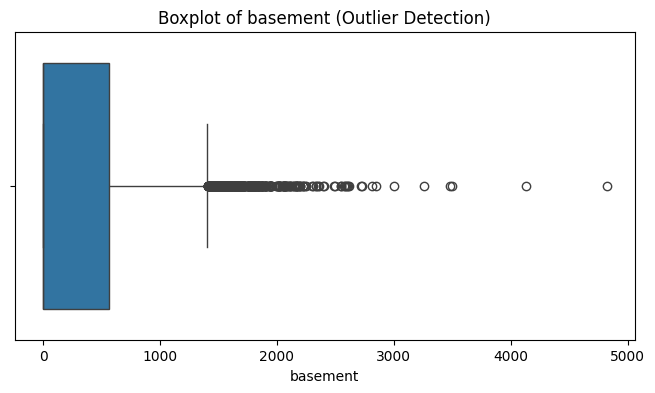

In [ ]:
# Detecting outliers using boxplots for key numerical features
outlier_features = ['price', 'living_measure', 'living_measure15', 'lot_measure', 'lot_measure15', 'total_area', 'ceil_measure', 'basement']

for feature in outlier_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature} (Outlier Detection)')
    plt.xlabel(feature)
    plt.show()

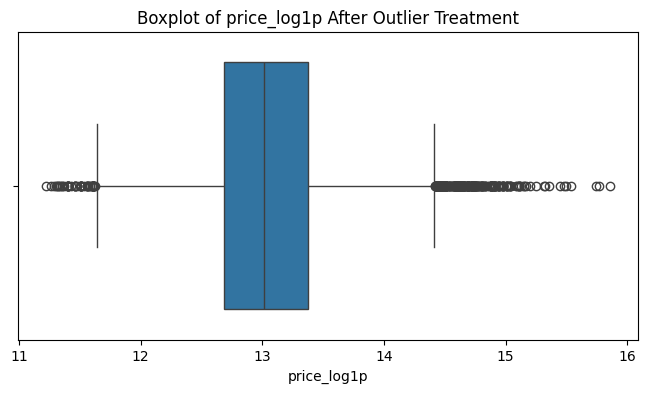

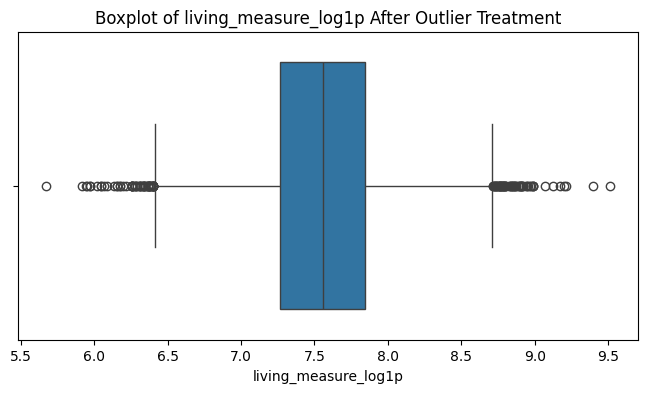

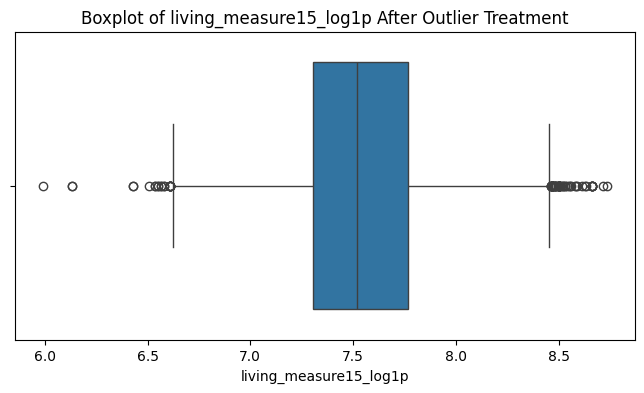

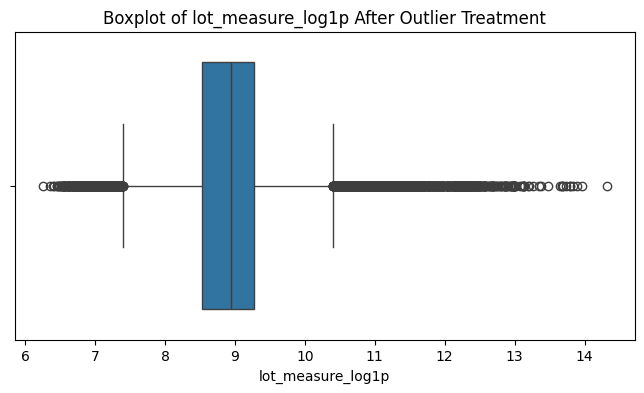

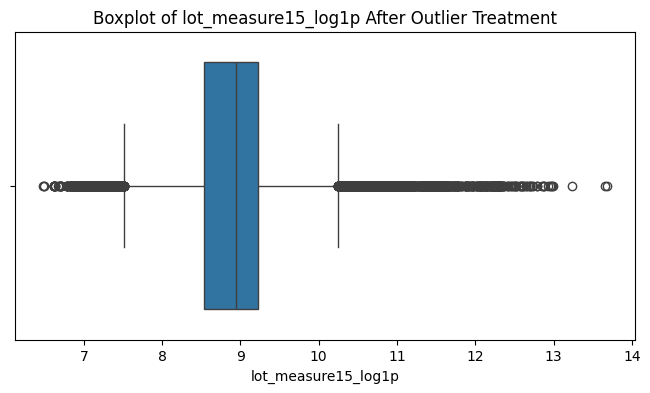

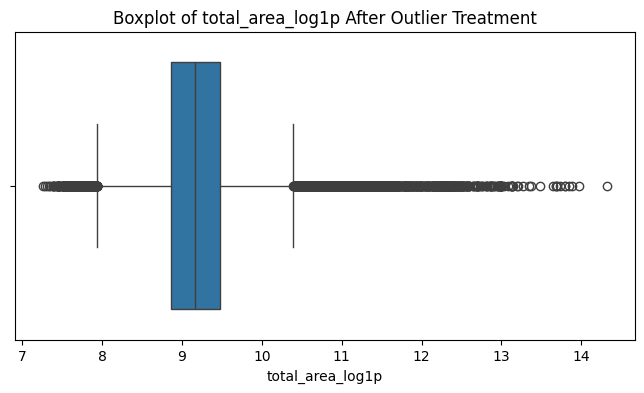

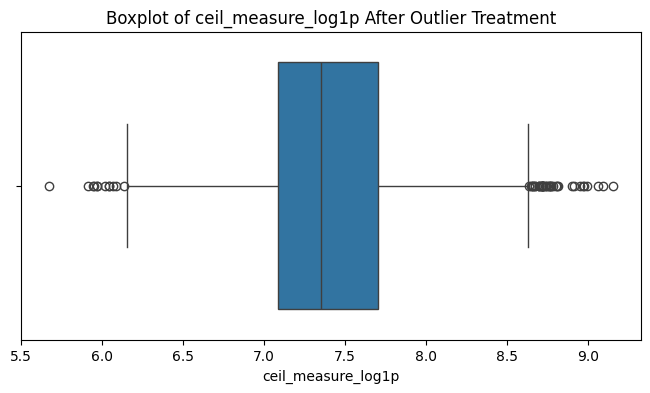

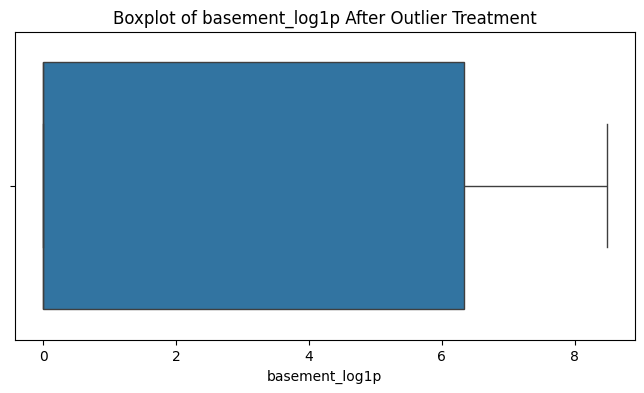

In [ ]:
# Verify the new distributions after Log1p transform
for feature in outlier_features:
    # Apply log1p transformation to handle outliers
    df[feature + '_log1p'] = np.log1p(df[feature])

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature + '_log1p'])
    plt.title(f'Boxplot of {feature}_log1p After Outlier Treatment')
    plt.xlabel(feature + '_log1p')
    plt.show()

In [ ]:
# Drop the original outlier features
df = df.drop(columns=outlier_features)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   cid                     21613 non-null  float64 
 1   year_month              21613 non-null  object  
 2   room_bed                21613 non-null  category
 3   room_bath               21613 non-null  category
 4   ceil                    21613 non-null  category
 5   coast                   21613 non-null  category
 6   sight                   21613 non-null  category
 7   condition               21613 non-null  category
 8   quality                 21613 non-null  category
 9   yr_built                21613 non-null  int64   
 10  yr_renovated            21613 non-null  int64   
 11  zipcode                 21613 non-null  int64   
 12  lat                     21613 non-null  int64   
 13  long                    21613 non-null  int64   
 14  furnished             

**Mitigating Outliers in Numerical Data with Log1p Transformation**

Using the log1p transformation is a common technique to handle outliers in numerical features. This transformation applies the natural logarithm to the feature values after adding 1, which helps to reduce the impact of extreme values.

This transformation can help make the data more normally distributed, which is beneficial for many machine learning algorithms.

## Step 3: Exploratory Data Analysis (EDA)

### Number of Houses Sold & Mean Price per Month over Time

In [ ]:
# Number of Houses Sold Over Time
print(df['year_month'].value_counts().sort_index())

year_month
2014-05    1768
2014-06    2180
2014-07    2211
2014-08    1940
2014-09    1774
2014-10    1878
2014-11    1411
2014-12    1471
2015-01     978
2015-02    1250
2015-03    1875
2015-04    2231
2015-05     646
Name: count, dtype: int64


In [ ]:
# Calculate the aggregated mean price per month
mean_price_log1p_per_month = df.groupby(['year_month'])['price_log1p'].agg('mean')
print(mean_price_log1p_per_month)

year_month
2014-05    13.061634
2014-06    13.079807
2014-07    13.059797
2014-08    13.044293
2014-09    13.034473
2014-10    13.038289
2014-11    13.011228
2014-12    13.017619
2015-01    13.008521
2015-02    12.992569
2015-03    13.051457
2015-04    13.096213
2015-05    13.075737
Name: price_log1p, dtype: float64


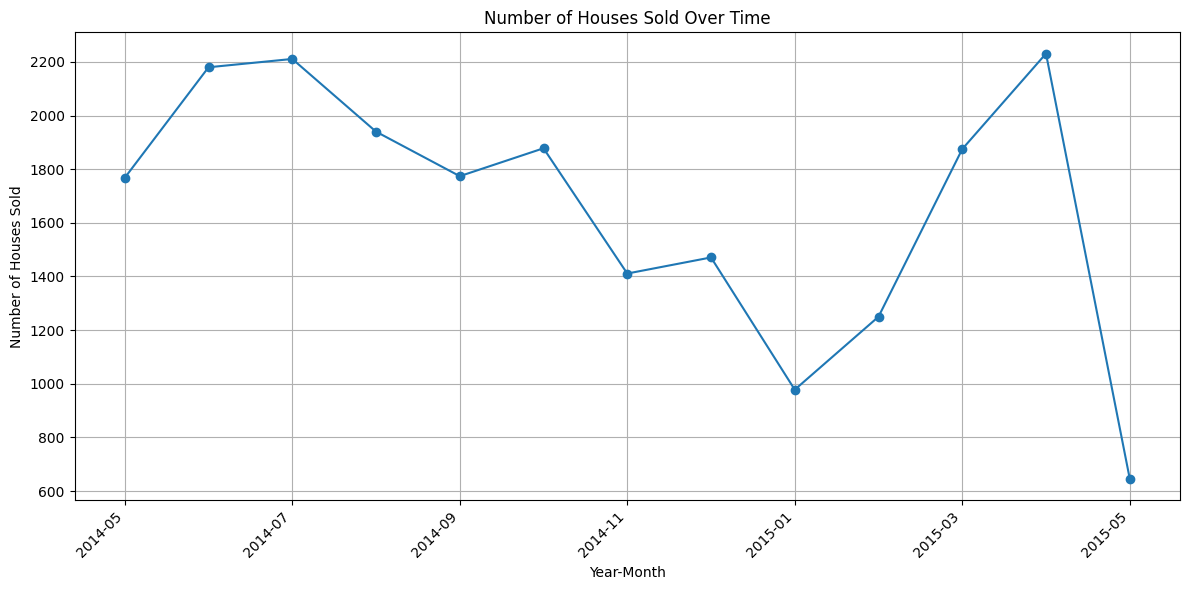

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))
df['year_month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold Over Time')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Plot 1: Number of Houses Sold Over Time**

- Sales data shows a general upward trend from May 2014 to April 2015, peaking at 2223 units in April 2015.
- A significant drop occurs in May 2015 (to 645 units).
- Sales in the latter half of 2014 show a gradual decline.
- The first quarter of 2015 also displays a fluctuating pattern, before the strong sales in April 2015.

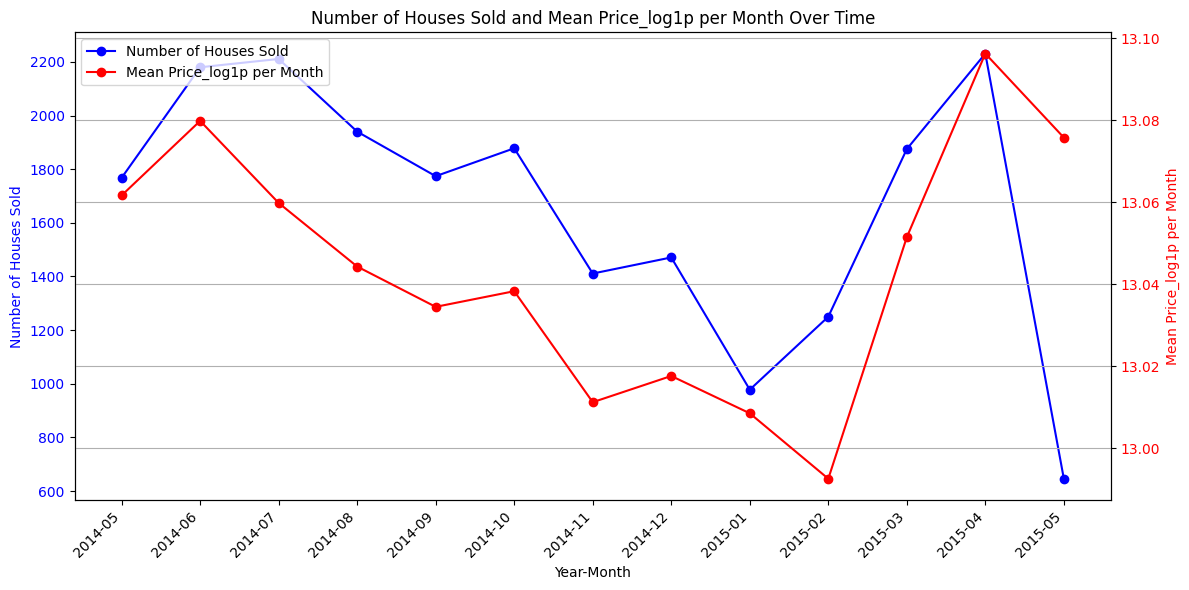

In [ ]:
# Calculate the aggregated mean price per month
mean_price_log1p_per_month = df.groupby(['year_month'])['price_log1p'].agg('mean')

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the number of houses sold
ax1.plot(df['year_month'].value_counts().sort_index().index,
         df['year_month'].value_counts().sort_index().values,
         marker='o', color='blue', label='Number of Houses Sold')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Houses Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45, ha='right')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(mean_price_log1p_per_month.index, mean_price_log1p_per_month.values,
         marker='o', color='red', label='Mean Price_log1p per Month')
ax2.set_ylabel('Mean Price_log1p per Month', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Number of Houses Sold and Mean Price_log1p per Month Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Find the month with the highest sales:
max_sales_month = df['year_month'].value_counts().idxmax()
print(f"Month with highest sales: {max_sales_month}")

# Find the month with the lowest sales:
min_sales_month = df['year_month'].value_counts().idxmin()
print(f"Month with lowest sales: {min_sales_month}")

# Calculate the correlation between sales volume and average price
sales_volume = df['year_month'].value_counts().sort_index().values
mean_price = df.groupby('year_month')['price_log1p'].mean().values
correlation = np.corrcoef(sales_volume, mean_price)[0,1]
print(f"Correlation between sales volume and average price_log1p: {correlation}")

Month with highest sales: 2015-04
Month with lowest sales: 2015-05
Correlation between sales volume and average price_log1p: 0.4685189596268225


**Plot 2: Number of Houses Sold and Mean Price per Month**

**Sales Trend:**
- Overall, sales show an upward trend from May 2014 to April 2015, with a peak in April 2015.
- A sharp decline is observed in May 2015.
- The latter half of 2014 shows a gradual sales decrease.
- The first quarter of 2015 demonstrates fluctuations before the April peak.

**Price_log1p Trend:**
- The average price_log1p per month generally follows the same trend as sales volume, albeit with some variations.
- There's no clear direct correlation between sales volume and average price_log1p; periods of high sales do not always correspond to high average prices, and vice versa.
- Further analysis is needed to understand the relationship between sales and average price_log1p, potentially examining other factors influencing price.

**Potential further investigations:**
1. **Investigate external factors:** Economic conditions, seasonal effects, or marketing campaigns might explain the May 2015 drop and sales fluctuations.
2. **Deeper price analysis:** Correlate price with other features (e.g., house size, location, features) to identify factors driving price variations.
3. **Segmentation:** Analyze sales and prices by different customer segments or house categories to reveal specific trends.

### Mean Price per Zip code & Clustering based on Price and Location

In [ ]:
# Calculate the aggregated mean price per month
df['avg_price_log1p_zipcode'] = df.groupby(['zipcode'])['price_log1p'].transform('mean')
print(df[['zipcode','price_log1p','avg_price_log1p_zipcode']].head())

   zipcode  price_log1p  avg_price_log1p_zipcode
0    98034    13.304687                13.076286
1    98118    12.154785                12.841957
2    98118    13.507627                12.841957
3    98002    12.456835                12.337707
4    98118    13.017005                12.841957


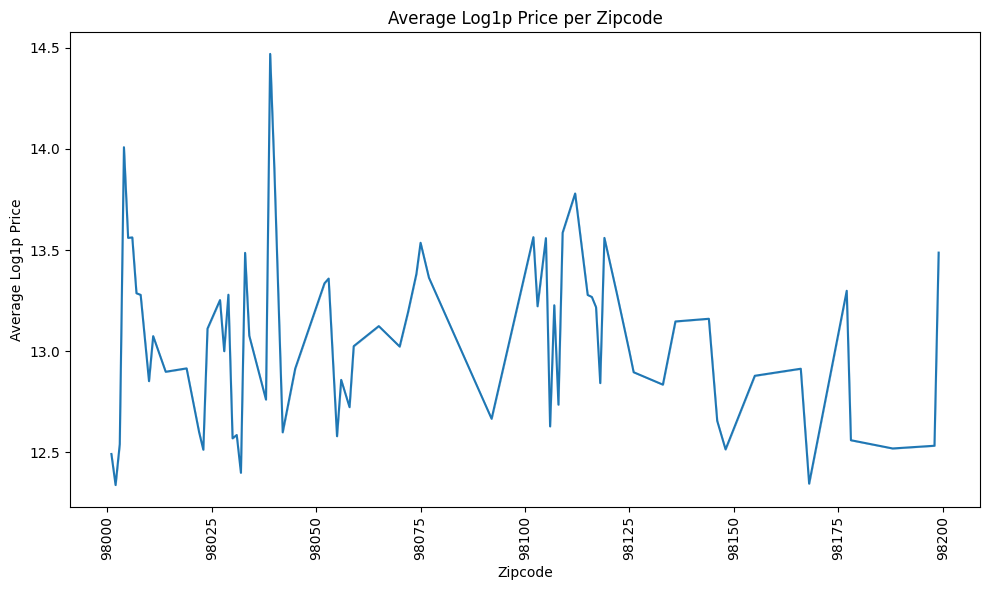

In [ ]:
# Convert 'zipcode' to integer first, then to categorical
df['zipcode'] = df['zipcode'].astype(int)
df['zipcode'] = df['zipcode'].astype('category')

# Plotting 'avg_price_log1p_zipcode' per 'zipcode'
plt.figure(figsize=(10, 6))
sns.lineplot(x='zipcode', y='avg_price_log1p_zipcode', data=df)
plt.xlabel('Zipcode')
plt.ylabel('Average Log1p Price')
plt.title('Average Log1p Price per Zipcode')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights and conclusions:**

- The plot shows the relationship between zip code and the average log-transformed price.

- There are variations in average prices across different zip codes. Some zip codes show higher average prices, while others have lower average prices.

- Next step is to identify any clusters or patterns in the data. Are there groups of zip codes with similar average prices?

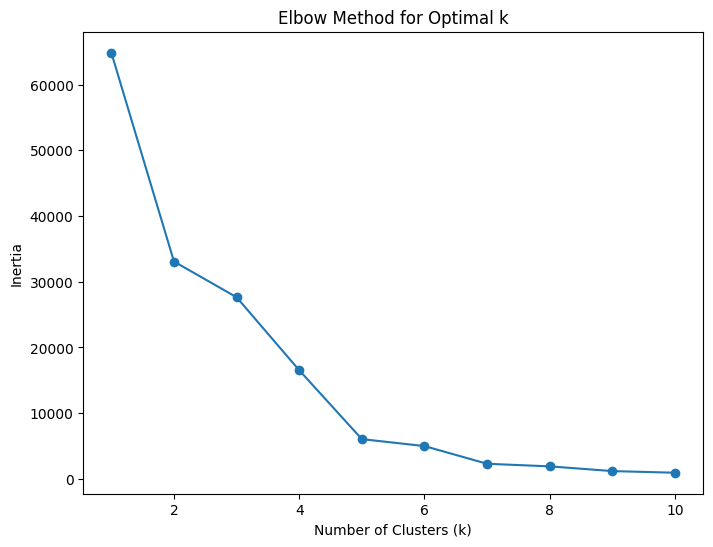

<Figure size 800x600 with 0 Axes>

In [ ]:
# Prepare the data for clustering
# Select relevant features for clustering
features_for_clustering = ['avg_price_log1p_zipcode', 'lat', 'long']
X = df[features_for_clustering]

# Standardize the features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (e.g., using the Elbow method)
inertia = []
for k in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow method plot, choose an appropriate 'k'
optimal_k = 3 # example, replace with your chosen k

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters on a map (using latitude and longitude)
plt.figure(figsize=(8, 6))
# Calculate the average latitude and longitude for each cluster
cluster_centers = df.groupby('cluster')[['lat', 'long']].mean()

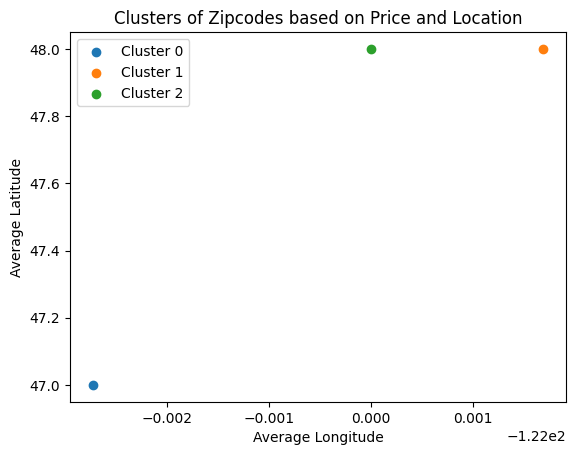

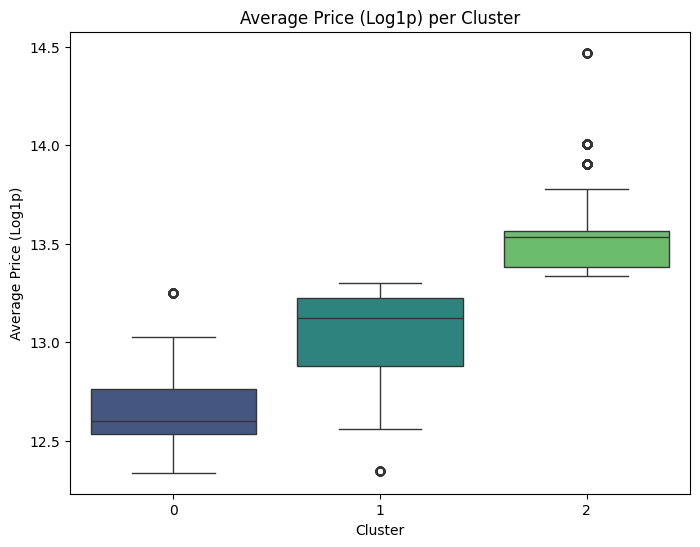

In [ ]:
# Plot the clusters
for cluster in cluster_centers.index:
    plt.scatter(cluster_centers.loc[cluster, 'long'], cluster_centers.loc[cluster, 'lat'], label=f'Cluster {cluster}')
plt.xlabel('Average Longitude')
plt.ylabel('Average Latitude')
plt.title('Clusters of Zipcodes based on Price and Location')
plt.legend()
plt.show()

# More straightforward representation: Boxplot of Average Price by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='avg_price_log1p_zipcode', data=df, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Average Price (Log1p)')
plt.title('Average Price (Log1p) per Cluster')
plt.show()

In [ ]:
# Interpretation of Clusters:
for cluster in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print("Average Price (log1p):", cluster_data['avg_price_log1p_zipcode'].mean())
    print("Average Latitude:", cluster_data['lat'].mean())
    print("Average Longitude:", cluster_data['long'].mean())
    print("Other relevant statistics...")  # add more analysis here
    print("-" * 20)

Cluster 0:
Average Price (log1p): 12.652643982988419
Average Latitude: 47.0
Average Longitude: -122.00272479564033
Other relevant statistics...
--------------------
Cluster 1:
Average Price (log1p): 13.060406177474718
Average Latitude: 47.99990069513406
Average Longitude: -121.99831181727905
Other relevant statistics...
--------------------
Cluster 2:
Average Price (log1p): 13.551217098121123
Average Latitude: 48.0
Average Longitude: -122.0
Other relevant statistics...
--------------------


Cluster 0:
Median Price: 12.598429550345802
Median House Size (living_measure): 7.523481312573497
Median House Age: 37.0
Mode Condition: 3


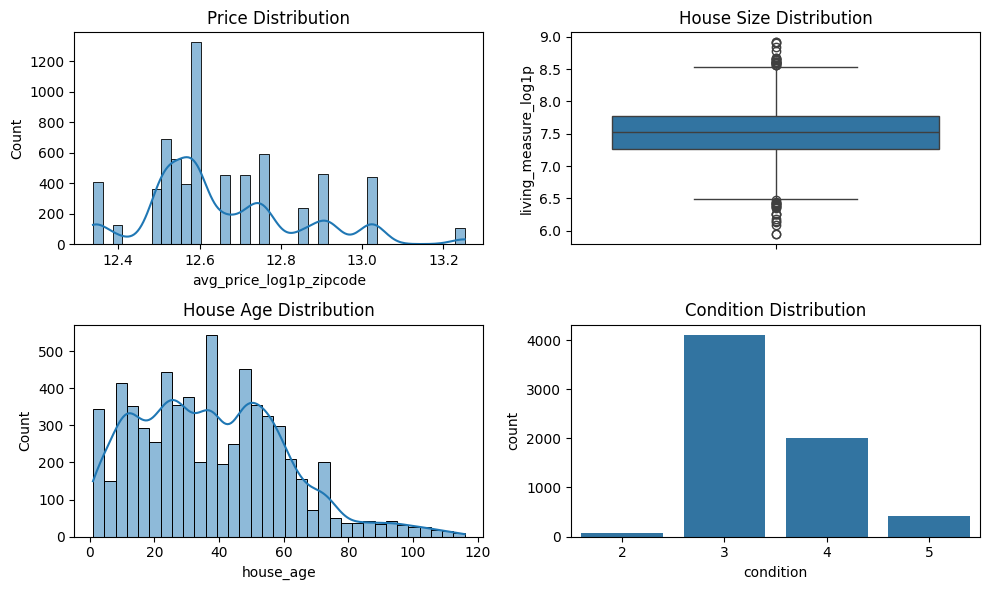

--------------------
Cluster 1:
Median Price: 13.123764050672976
Median House Size (living_measure): 7.473637108496206
Median House Age: 53.0
Mode Condition: 3


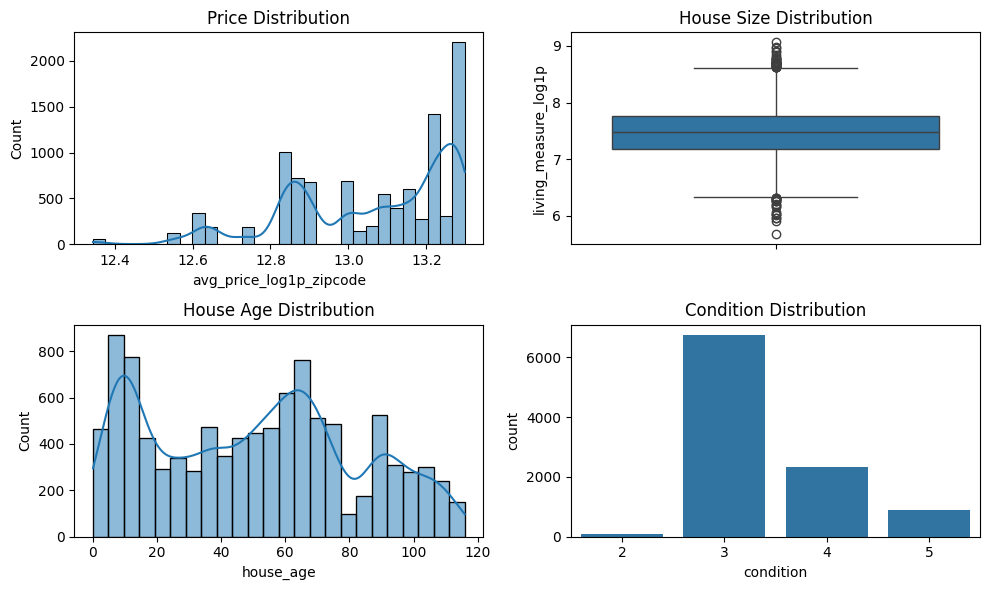

--------------------
Cluster 2:
Median Price: 13.536099467939726
Median House Size (living_measure): 7.80016307039296
Median House Age: 36.0
Mode Condition: 3


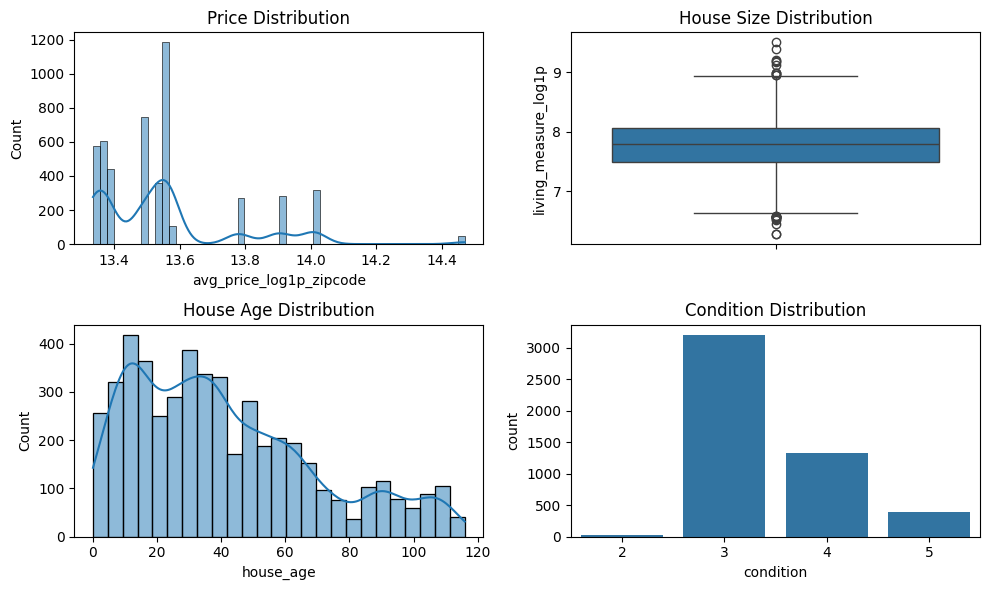

--------------------


In [ ]:
# Analyze Cluster characteristics in terms of Price, House Size, House Age, Condition
for cluster in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print("Median Price:", cluster_data['avg_price_log1p_zipcode'].median())
    print("Median House Size (living_measure):", cluster_data['living_measure_log1p'].median())
    print("Median House Age:", cluster_data['house_age'].median())
    # Instead of median, use mode for 'condition' (most frequent category)
    print("Mode Condition:", cluster_data['condition'].mode()[0]) # Get the most frequent category

    # Create visualizations
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(cluster_data['avg_price_log1p_zipcode'], kde=True)
    plt.title('Price Distribution')

    plt.subplot(2, 2, 2)
    sns.boxplot(y=cluster_data['living_measure_log1p'])
    plt.title('House Size Distribution')

    plt.subplot(2, 2, 3)
    sns.histplot(cluster_data['house_age'], kde=True)
    plt.title('House Age Distribution')

    plt.subplot(2, 2, 4)
    sns.countplot(x=cluster_data['condition'])
    plt.title('Condition Distribution')

    plt.tight_layout()
    plt.show()
    print("-" * 20)


**Comparative Analysis:**

- **Price:**
  - Cluster 2 has the highest median price, followed by Cluster 1, and then Cluster 0.
- **House Size:**
  - Cluster 2 also has the largest median house size.
  - Cluster 0 and Cluster 1 have similar house sizes, with Cluster 0 being slightly larger.
- **House Age:**
  - Cluster 1 has the oldest houses with a median age of 53 years.
  - Clusters 0 and 2 have similar house ages, around 36-37 years.
- **Condition:**
  - All clusters have a mode condition of 3, indicating that the most common condition rating is the same across all clusters.

These characteristics suggest that Cluster 2 represents newer and larger houses with higher prices, while Cluster 1 represents older houses with slightly lower prices. Cluster 0 falls somewhere in between in terms of price and house size but has a similar house age to Cluster 2. The condition of houses is consistent across all clusters.


### Distributions of key numerical features

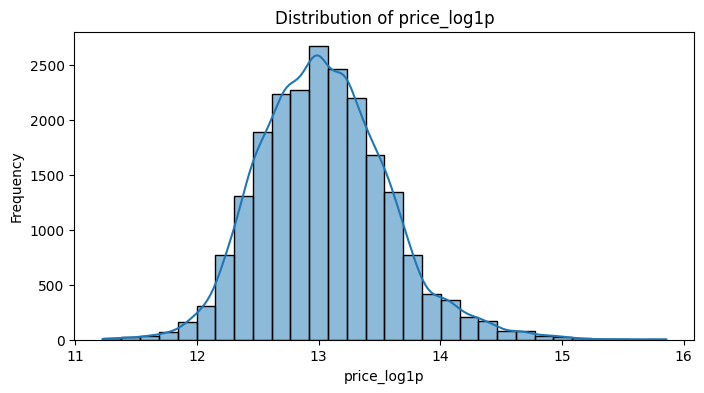

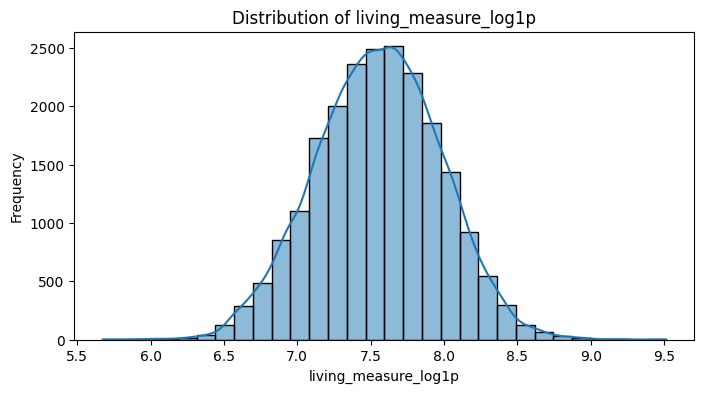

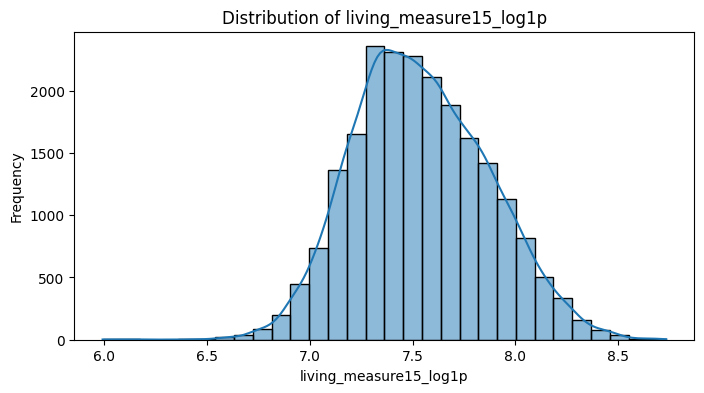

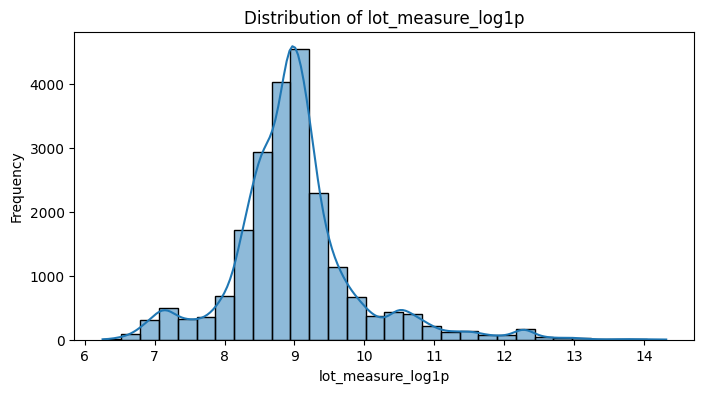

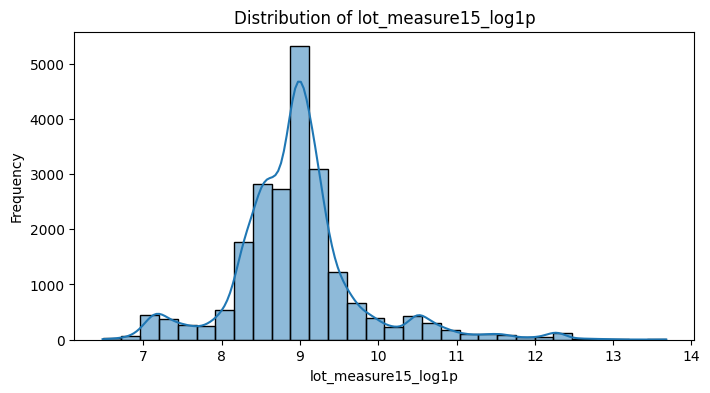

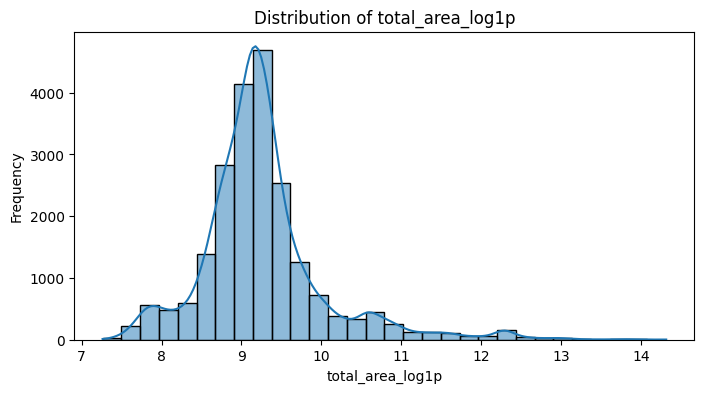

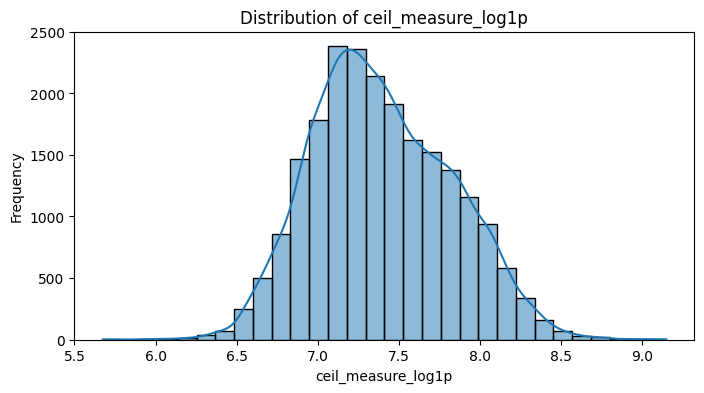

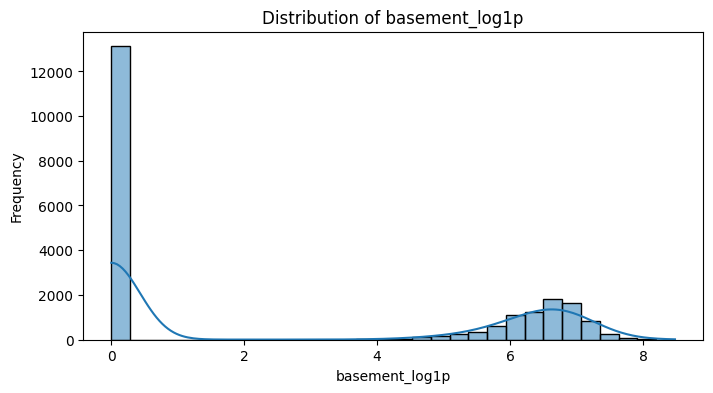

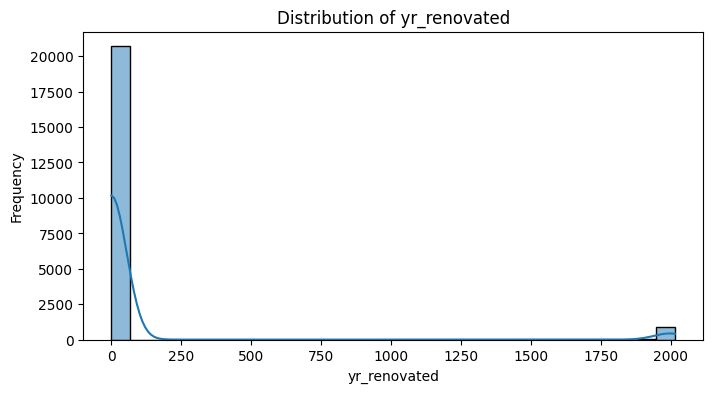

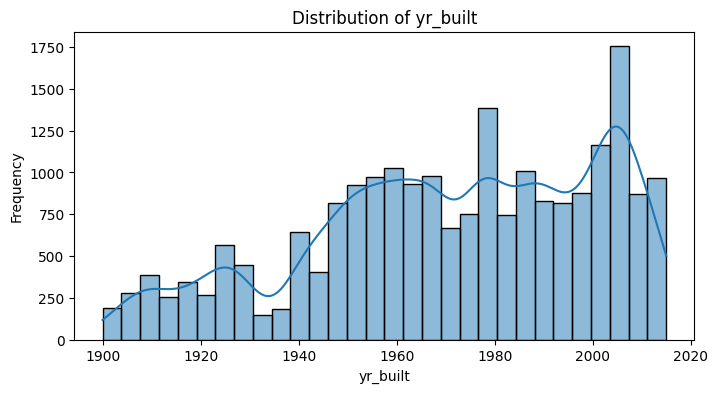

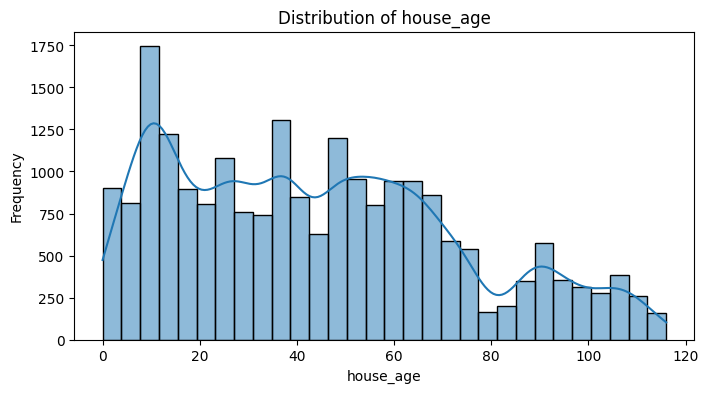

In [ ]:
# Plot distributions of key numerical features
num_features = ['price_log1p', 'living_measure_log1p', 'living_measure15_log1p', 'lot_measure_log1p', 'lot_measure15_log1p', 'total_area_log1p', 'ceil_measure_log1p', 'basement_log1p', 'yr_renovated', 'yr_built', 'house_age']

for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Analyze numerical features' distributions
num_features = ['price_log1p', 'living_measure_log1p', 'living_measure15_log1p', 'lot_measure_log1p', 'lot_measure15_log1p', 'total_area_log1p', 'ceil_measure_log1p', 'basement_log1p', 'yr_renovated', 'yr_built', 'house_age']
for feature in num_features:
  print(f"Analysis of {feature}:")
  print(f"  - Mean: {df[feature].mean()}")
  print(f"  - Median: {df[feature].median()}")
  print(f"  - Standard Deviation: {df[feature].std()}")
  print(f"  - Minimum: {df[feature].min()}")
  print(f"  - Maximum: {df[feature].max()}")
  print(f"  - Skewness: {df[feature].skew()}")  # Measure of asymmetry
  print("-" * 20)


Analysis of price_log1p:
  - Mean: 13.04788854727321
  - Median: 13.017005083966255
  - Standard Deviation: 0.5268208317342267
  - Minimum: 11.225256725762893
  - Maximum: 15.856731016694035
  - Skewness: 0.4289733115510522
--------------------
Analysis of living_measure_log1p:
  - Mean: 7.550921743643015
  - Median: 7.555381944240273
  - Standard Deviation: 0.4244223901423487
  - Minimum: 5.673323267171493
  - Maximum: 9.513477398982824
  - Skewness: -0.03424134803126608
--------------------
Analysis of living_measure15_log1p:
  - Mean: 7.54017679159662
  - Median: 7.518064181233078
  - Standard Deviation: 0.3270191172835487
  - Minimum: 5.991464547107982
  - Maximum: 8.734077192559303
  - Skewness: 0.20700071463081818
--------------------
Analysis of lot_measure_log1p:
  - Mean: 8.990349781591675
  - Median: 8.938662873666118
  - Standard Deviation: 0.90197599148563
  - Minimum: 6.255750041753367
  - Maximum: 14.31710974879976
  - Skewness: 0.9616692934599284
--------------------
Ana

**Plot 3: Histograms of Numerical Features:**

- **price_log1p**: Slightly skewed right with a mean of 13.05 and a median of 13.02. The standard deviation is 0.53, ranging from 11.23 to 15.86.

- **living_measure_log1p**: Nearly symmetric with a mean of 7.55 and a median of 7.56. The standard deviation is 0.42, ranging from 5.67 to 9.51.

- **living_measure15_log1p**: Slightly skewed right with a mean of 7.54 and a median of 7.52. The standard deviation is 0.33, ranging from 5.99 to 8.73.

- **lot_measure_log1p**: Skewed right with a mean of 8.99 and a median of 8.94. The standard deviation is 0.90, ranging from 6.26 to 14.32.

- **lot_measure15_log1p**: Skewed right with a mean of 8.96 and a median of 8.94. The standard deviation is 0.81, ranging from 6.48 to 13.68.

- **total_area_log1p**: Highly skewed right with a mean of 9.25 and a median of 9.17. The standard deviation is 0.77, ranging from 7.26 to 14.32.

- **ceil_measure_log1p**: Slightly skewed right with a mean of 7.40 and a median of 7.35. The standard deviation is 0.43, ranging from 5.67 to 9.15.

- **basement_log1p**: Slightly skewed right with a mean of 2.53 and a median of 0. The standard deviation is 3.17, ranging from 0 to 8.48.

- **yr_renovated**: Highly skewed right with a mean of 84.40 and a median of 0. The standard deviation is 401.68, ranging from 0 to 2015.

- **yr_built**: Slightly skewed left with a mean of 1971.01 and a median of 1975. The standard deviation is 29.37, ranging from 1900 to 2015.

- **house_age**: Slightly skewed right with a mean of 44.32 and a median of 41. The standard deviation is 29.37, ranging from 0 to 116.

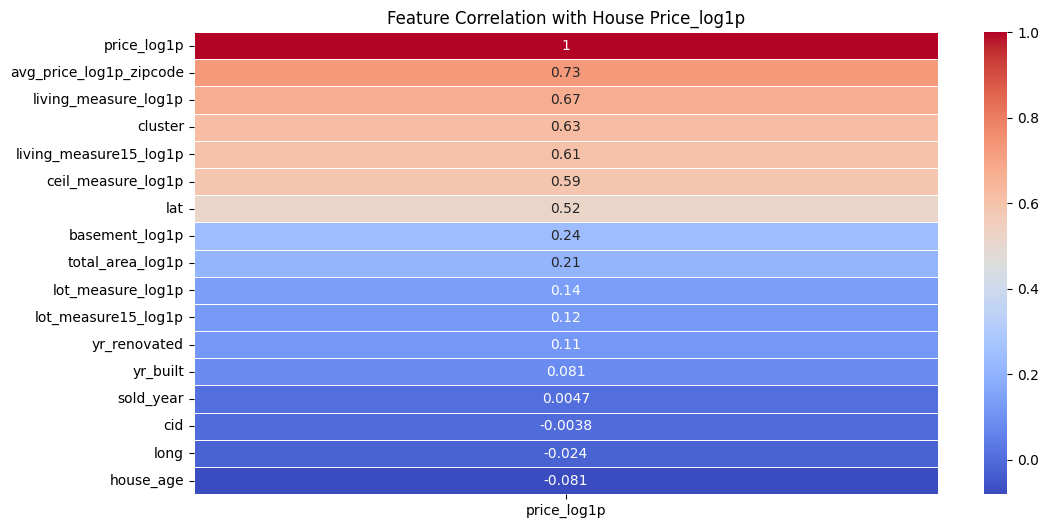

In [ ]:
# Compute correlation matrix
# get numerical columns
numerical_df = df.select_dtypes(include=np.number)
# compute the correlation matrix using only numerical data
corr_matrix = numerical_df.corr()

# Display heatmap of correlations with price
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix[['price_log1p']].sort_values(by='price_log1p', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation with House Price_log1p")
plt.show()

**Plot 4: Feature Correlation with Price**

**Strongest positive correlations with price:**
  - 'avg_price_log1p_zipcode' has a positive correlation of 0.73 with price.
  - 'living_measure_log1p' has a positive correlation of 0.67 with price.
  - 'cluster' has a positive correlation of 0.63 with price.

**Strongest negative correlations with price:**
  - 'cid' has a negative correlation of -0.003 with price.
  - 'long' has a negative correlation of -0.024 with price.
  - 'house_age' has a negative correlation of -0.081 with price.

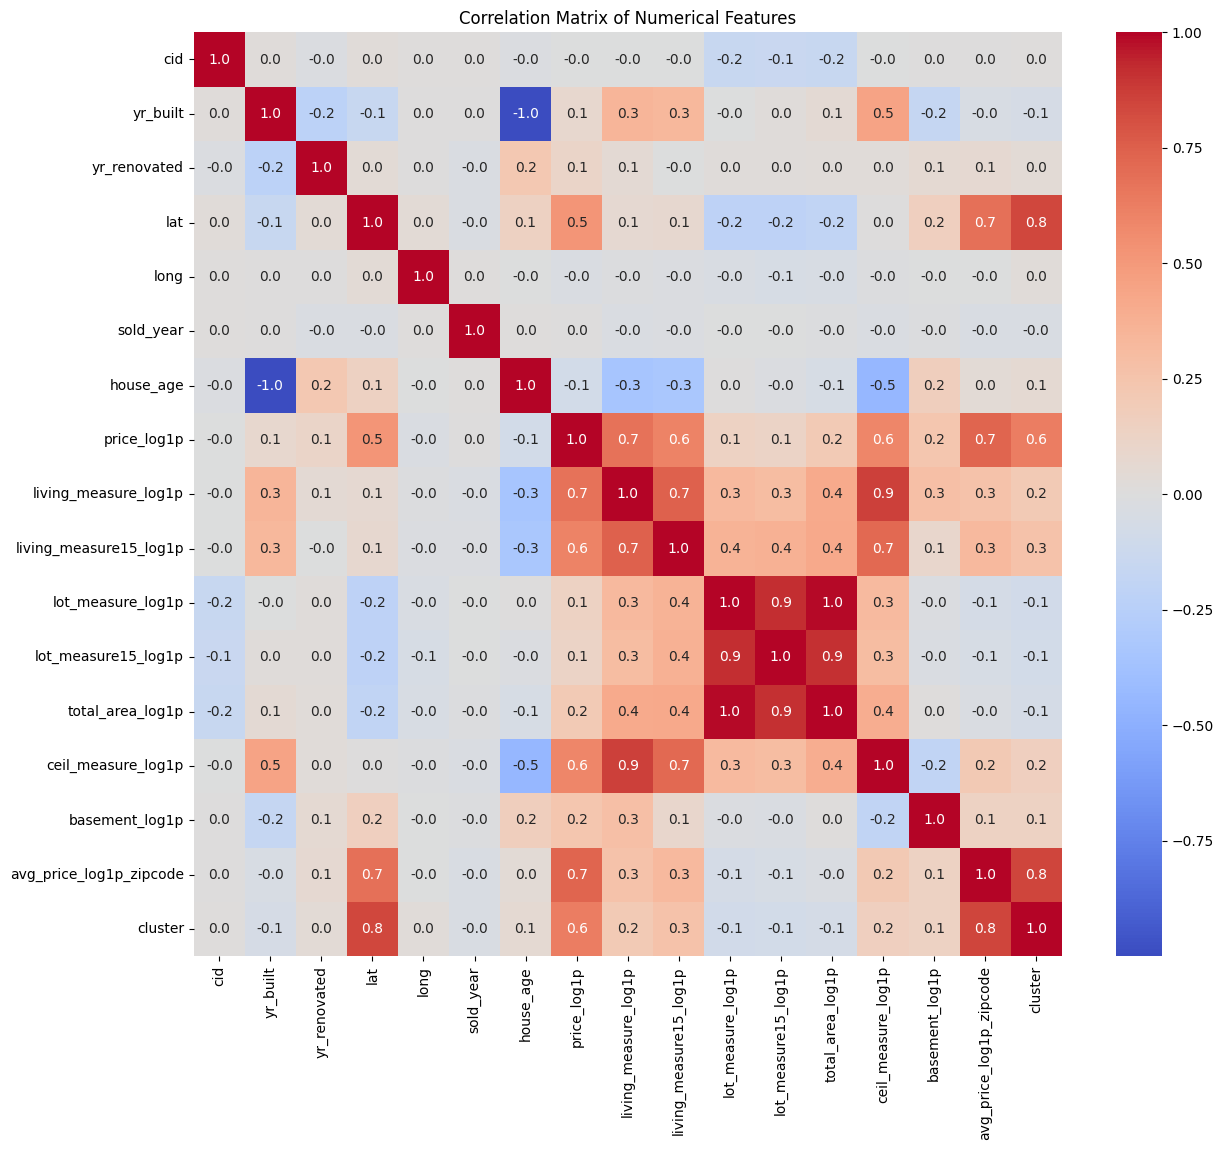

In [ ]:
# Correlation Matrix Heatmap
# get numerical columns
numerical_df = df.select_dtypes(include=np.number)
# compute the correlation matrix using only numerical data
corr_matrix = numerical_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
#Since 'total_area_log1p' and 'lot_measure_log1p' are 100% positively correlated, drop 'lot_measure' from df
df = df.drop('lot_measure_log1p', axis=1)

In [ ]:
#Since 'house_age' and 'yr_built' are 100% negatively correlated, drop 'yr_built' from df
df = df.drop('yr_built', axis=1)

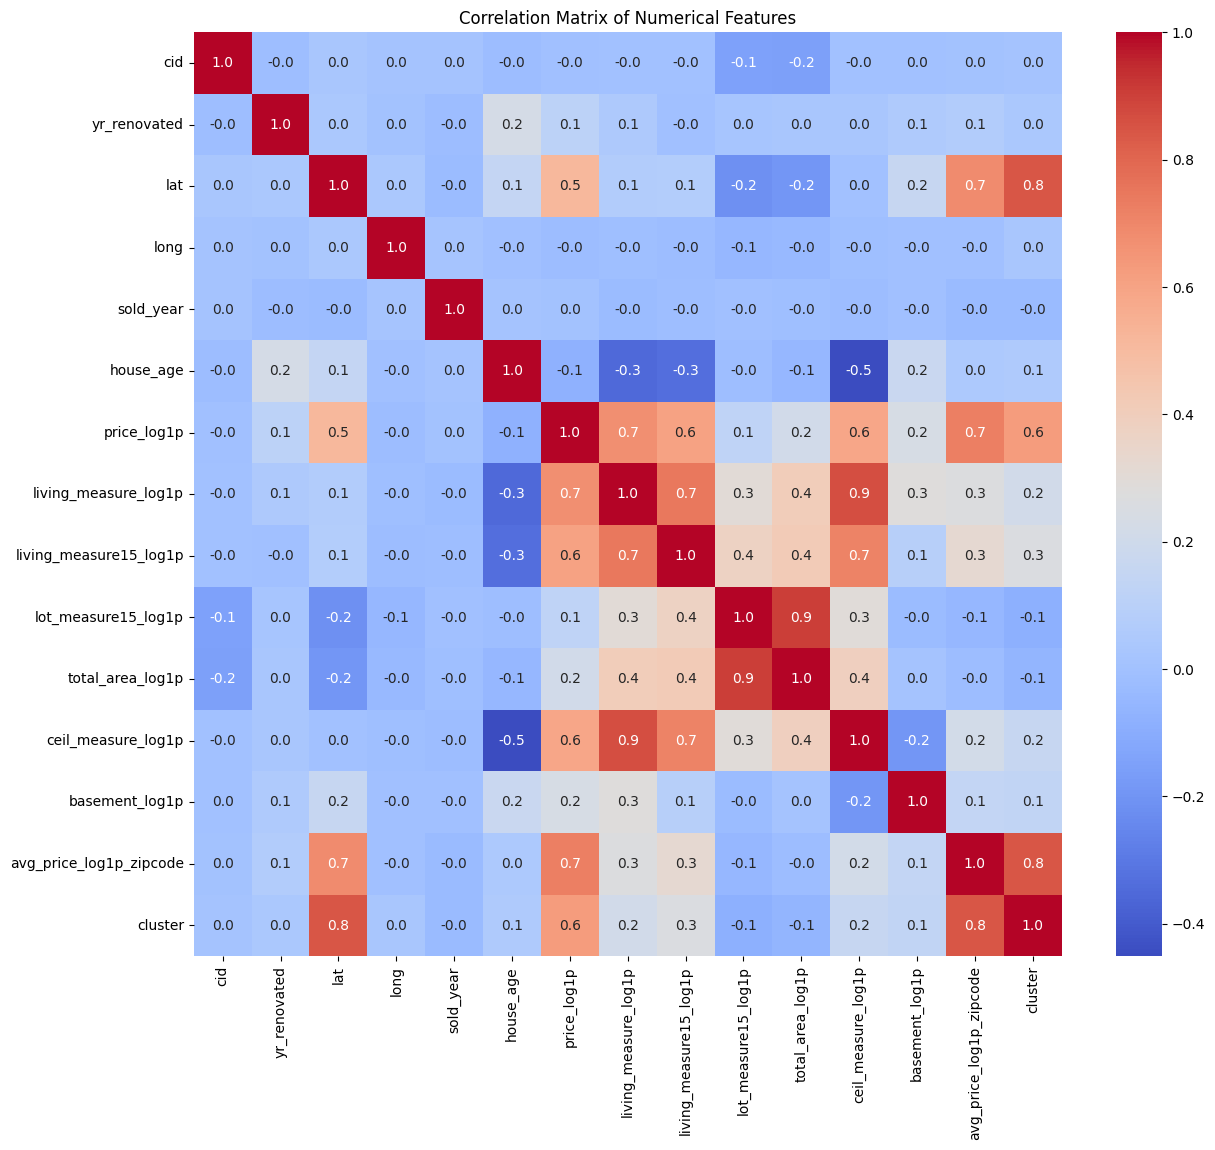

In [ ]:
# Correlation Matrix Heatmap
# get numerical columns
numerical_df = df.select_dtypes(include=np.number)
# compute the correlation matrix using only numerical data
corr_matrix = numerical_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Plot 5: Correlation Matrix Heatmap**

1. **`living_measure_log1p` and `ceil_measure_log1p`:** A very strong positive correlation (0.9) shows properties with larger living areas also tend to have larger ceil areas. This is expected as the living area is part of the ceil area.

2. **`living_measure_log1p` and `living_measure15_log1p`:** A high positive correlation (0.7) means that houses with larger living areas tend to also have larger recently renovated or updated living areas. This reinforces the importance of living space size in general.

3. **`living_measure15_log1p` and `ceil_measure_log1p`:** A strong positive correlation (0.7) indicates that properties with larger recently renovated or updated living areas generally have larger ceil areas. This is expected as the living area is part of the ceil area.

4. **`living_measure_log1p` and `price_log1p`:** A strong positive correlation (0.7) suggests that larger living spaces tend to command higher prices.

5. **`living_measure15_log1p` and `price_log1p`:**  A notable positive correlation (0.6) indicates that recently renovated or updated living areas are associated with higher prices. This, combined with the 'living_measure' correlation, highlights the importance of living space size and its recent condition.

6. **`ceil_measure_log1p` and `price_log1p`:**  A notable positive correlation (0.6) implies that larger overall ceiling area are linked to increased property value.

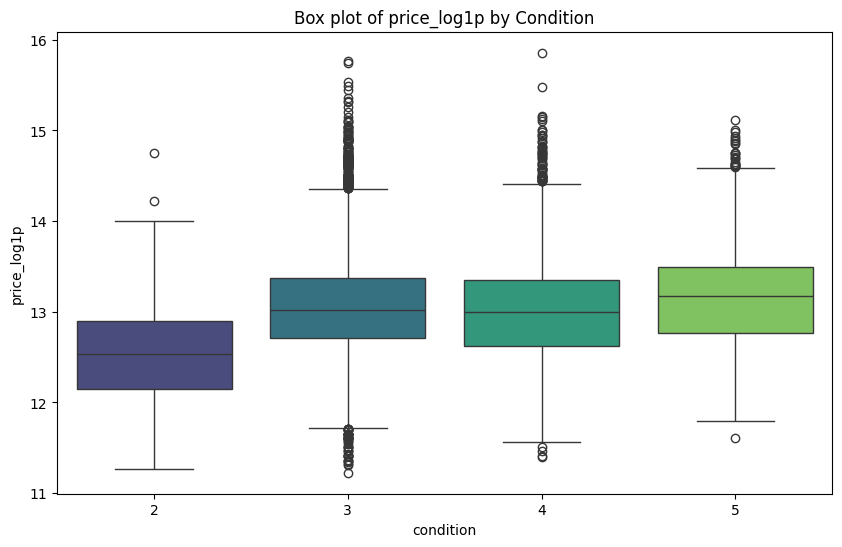

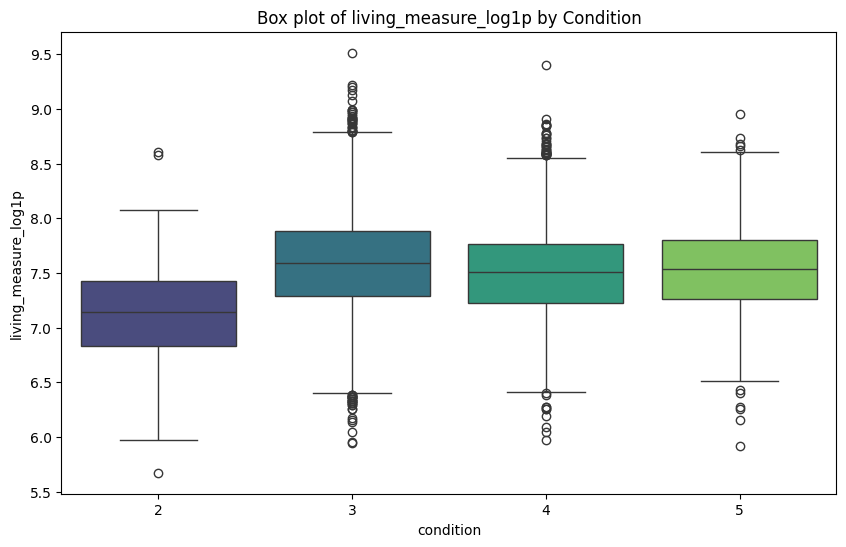

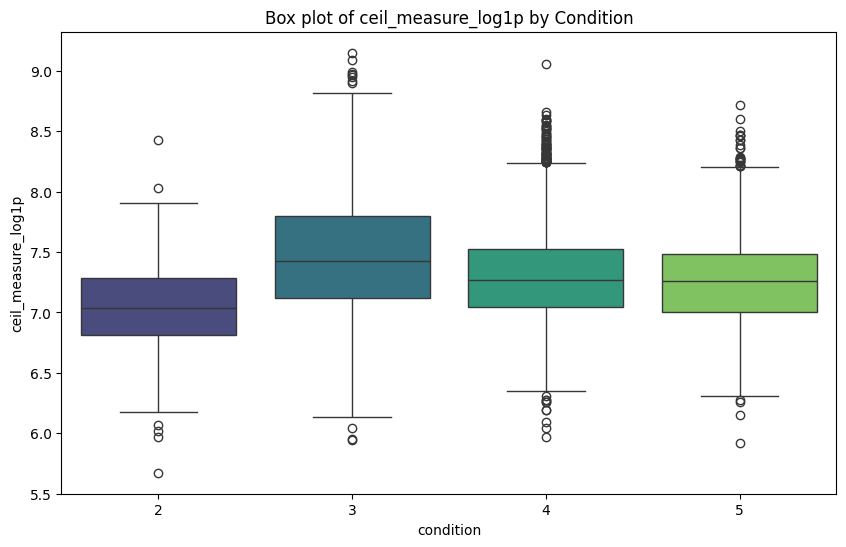

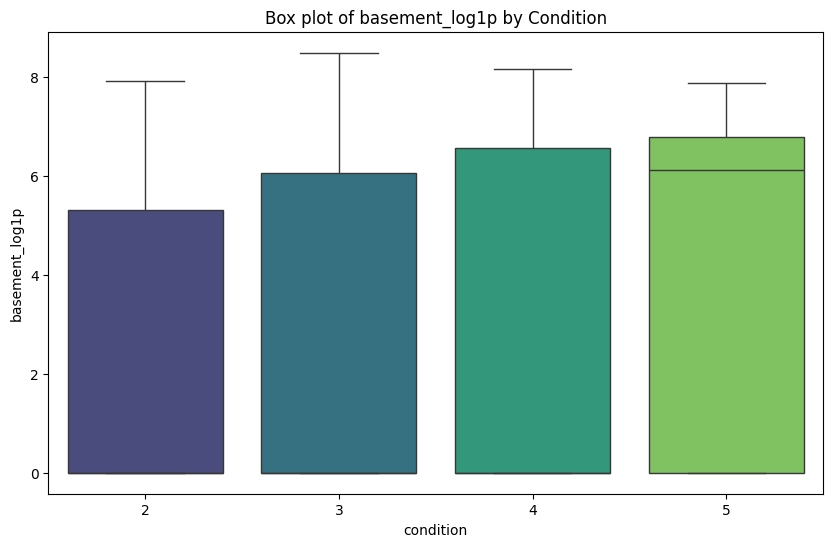

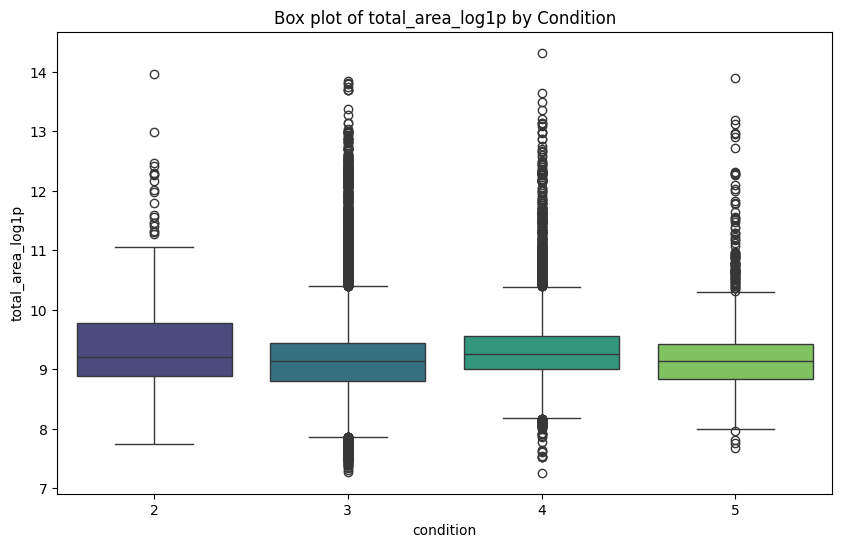

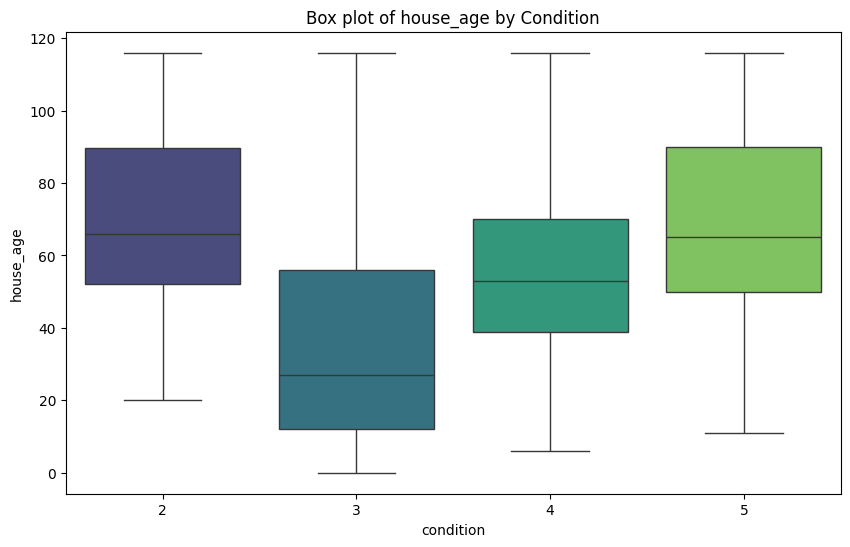

In [ ]:
# Box plots to visualize the distribution of numerical features for different categories
num_features = ['price_log1p', 'living_measure_log1p', 'ceil_measure_log1p', 'basement_log1p', 'total_area_log1p', 'house_age']

for col in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='condition', y=col, data=df, palette='viridis')
    plt.title(f'Box plot of {col} by Condition')
    plt.show()

In [ ]:
# Get the numeric columns
numerical_cols = ['price_log1p', 'living_measure_log1p', 'ceil_measure_log1p', 'basement_log1p', 'total_area_log1p', 'house_age']

for col in numerical_cols:
    medians_condition = df.groupby('condition')[col].median()
    print(f"Median {col} by Condition:\n{medians_condition}\n")

Median price_log1p by Condition:
condition
2    12.531750
3    13.019225
4    12.994532
5    13.172000
Name: price_log1p, dtype: float64

Median living_measure_log1p by Condition:
condition
2    7.143610
3    7.586296
4    7.507141
5    7.539559
Name: living_measure_log1p, dtype: float64

Median ceil_measure_log1p by Condition:
condition
2    7.039660
3    7.427144
4    7.266129
5    7.259116
Name: ceil_measure_log1p, dtype: float64

Median basement_log1p by Condition:
condition
2    0.000000
3    0.000000
4    0.000000
5    6.122433
Name: basement_log1p, dtype: float64

Median total_area_log1p by Condition:
condition
2    9.201401
3    9.133675
4    9.252058
5    9.134107
Name: total_area_log1p, dtype: float64

Median house_age by Condition:
condition
2    66.0
3    27.0
4    53.0
5    65.0
Name: house_age, dtype: float64



**Plot 6: Distributions of the following numerical features _['price_log1p', 'living_measure_log1p', 'ceil_measure_log1p', 'basement_log1p', 'total_area_log1p', 'house_age']_ which vary across different Conditions**:

1. **`price_log1p` against the different `condition` categories**
  - The median `price_log1p` increases with better `condition`, ranging from 12.48 for `condition` 1 to 13.17 for `condition` 5. This indicates that properties in better `condition` tend to have higher prices.

2. **`living_measure_log1p` against the different `condition` categories**
  - The median `living_measure_log1p` increases with better `condition`, ranging from 6.91 for `condition` 1 to 7.59 for `condition` 3. This suggests that properties in better `condition` tend to have larger living areas.

3. **`ceil_measure_log1p` against the different `condition` categories**
  - The median `ceil_measure_log1p` increases with better `condition`, ranging from 6.87 for `condition` 1 to 7.43 for `condition` 3. This indicates that ceiling measurements are generally larger in better `condition` properties.

4. **`basement_log1p` against the different `condition` categories**
  - The median `basement_log1p` is 0 for conditions 1 to 4, and 6.11 for `condition` 5. This shows that basements are more common in properties in the best `condition`.

5. **`total_area_log1p` against the different `condition` categories**
  - The median `total_area_log1p` is relatively consistent across conditions, ranging from 9.13 for `condition` 3 to 9.25 for `condition` 4. This suggests that total area does not vary significantly with `condition`.

6. **`house_age` against the different `condition` categories**
  - The median house_age decreases with better `condition`, ranging from 87 years for condition 1 to 27 years for condition 3. This indicates that older houses tend to be in poorer `condition`, but there are also some older houses in better `condition`.

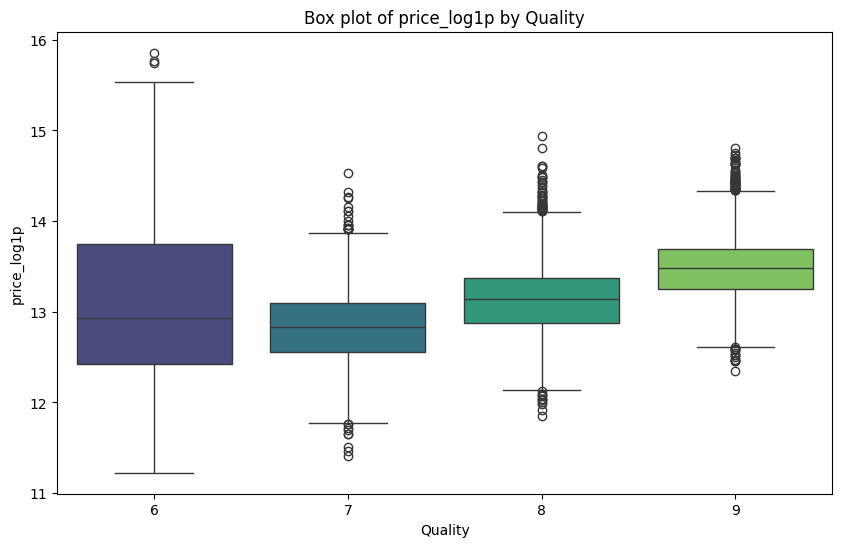

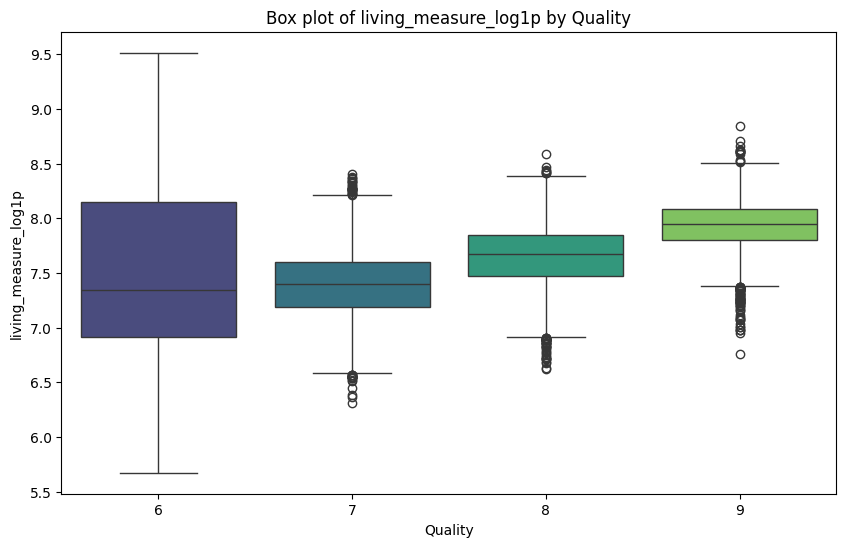

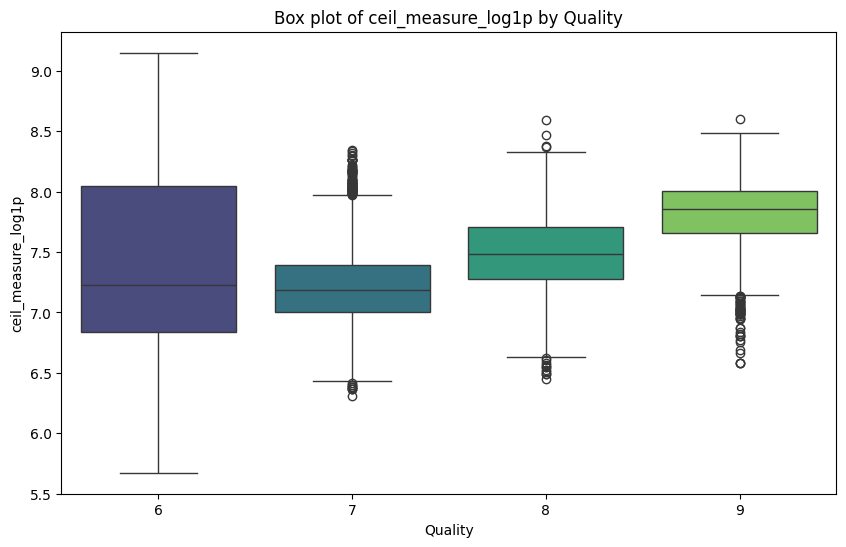

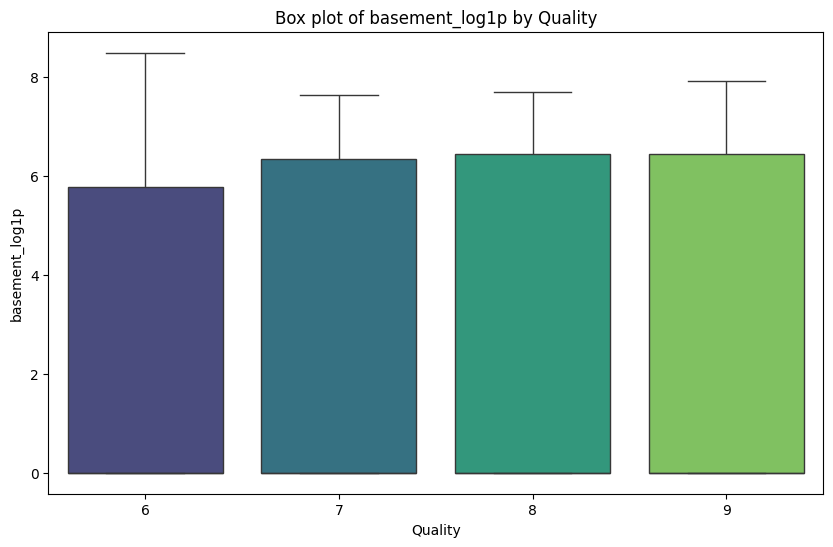

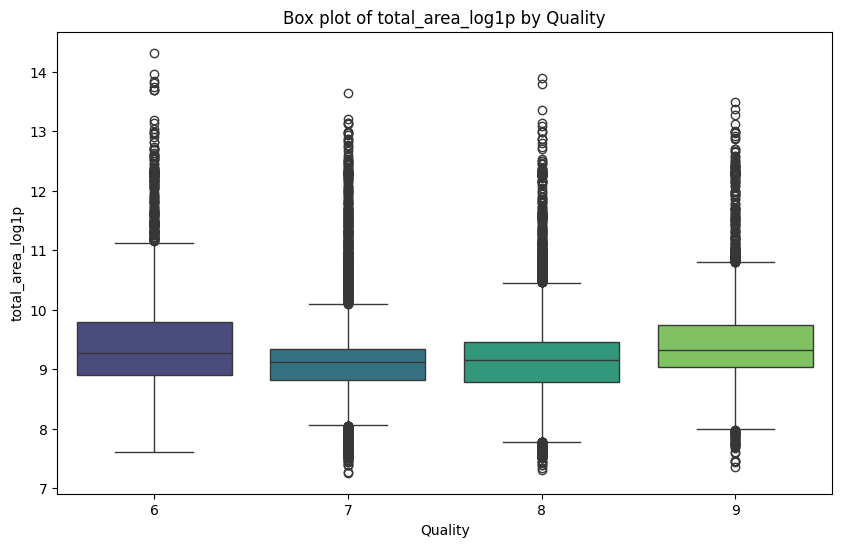

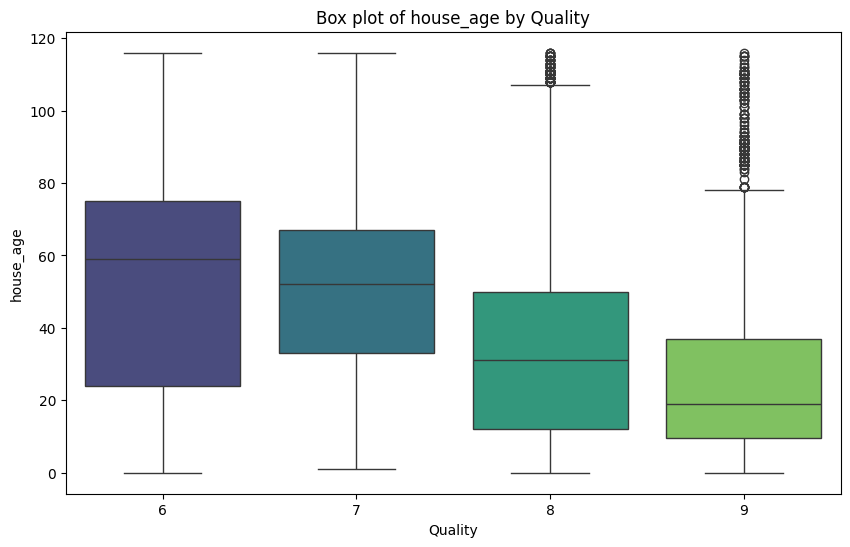

In [ ]:
# Box plots to visualize the distribution of numerical features for different categories
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y=col, data=df, palette='viridis')
    plt.title(f'Box plot of {col} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(col)
    plt.show()

In [ ]:
for col in numerical_cols:
    medians_quality = df.groupby('quality')[col].median()
    print(f"Median {col} by Quality:\n{medians_quality}\n")

Median price_log1p by Quality:
quality
6    12.932415
7    12.834684
8    13.142168
9    13.487008
Name: price_log1p, dtype: float64

Median living_measure_log1p by Quality:
quality
6    7.346655
7    7.396949
8    7.673688
9    7.944847
Name: living_measure_log1p, dtype: float64

Median ceil_measure_log1p by Quality:
quality
6    7.223296
7    7.186144
8    7.484930
9    7.852050
Name: ceil_measure_log1p, dtype: float64

Median basement_log1p by Quality:
quality
6    0.0
7    0.0
8    0.0
9    0.0
Name: basement_log1p, dtype: float64

Median total_area_log1p by Quality:
quality
6    9.274723
7    9.115040
8    9.161465
9    9.323669
Name: total_area_log1p, dtype: float64

Median house_age by Quality:
quality
6    59.0
7    52.0
8    31.0
9    19.0
Name: house_age, dtype: float64



**Plot 7: Distributions of the following numerical features _['price_log1p', 'living_measure_log1p', 'ceil_measure_log1p', 'basement_log1p', 'total_area_log1p', 'house_age']_ which vary across different Qualities**:

1. **`price_log1p` against the different quality categories**
  - The median `price_log1p` increases significantly with better quality, ranging from 12.32 for quality below 5 to 14.47 for quality above 12. This indicates that higher quality properties tend to have much higher prices.

2. **`living_measure_log1p` against the different quality categories**
  - The median `living_measure_log1p` increases significantly with better quality, ranging from 6.75 for quality below 5 to 8.54 for quality above 12. This suggests that higher quality properties tend to have much larger living areas.

3. **`ceil_measure_log1p` against the different quality categories**
  - The median `ceil_measure_log1p` increases significantly with better quality, ranging from 6.71 for quality below 5 to 8.45 for quality above 12. This indicates that higher quality properties tend to have much larger ceiling measurements.

4. **`basement_log1p` against the different quality categories**
  - The median `basement_log1p` is 0 for qualities 6 to 11 and below 5, and 6.33 for quality above 12. This shows that basements are more common in properties with the highest quality.

5. **`total_area_log1p` against the different quality categories**
  - The median `total_area_log1p` increases significantly with better quality, ranging from 8.99 for quality below 5 to 10.38 for quality above 12. This suggests that higher quality properties tend to have much larger total areas.

6. **`house_age` against the different quality categories**
  - The median `house_age` decreases significantly with better quality, ranging from 76 years for quality below 5 to 18 years for quality above 12. This indicates that older houses tend to be of lower quality, while newer houses are generally of higher quality.

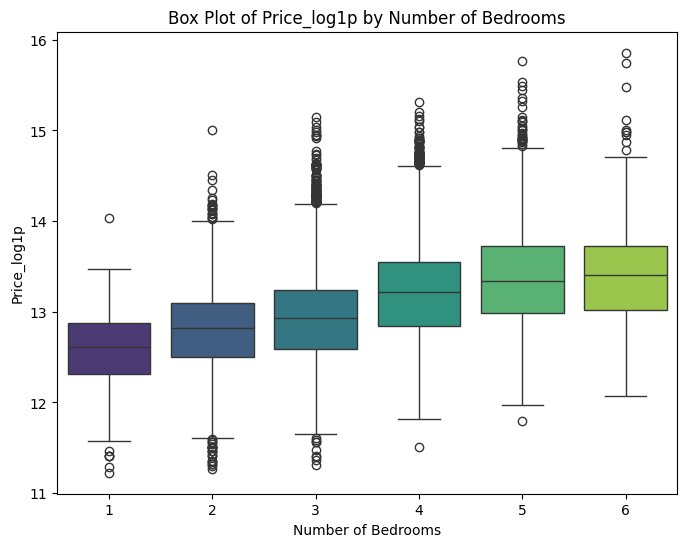

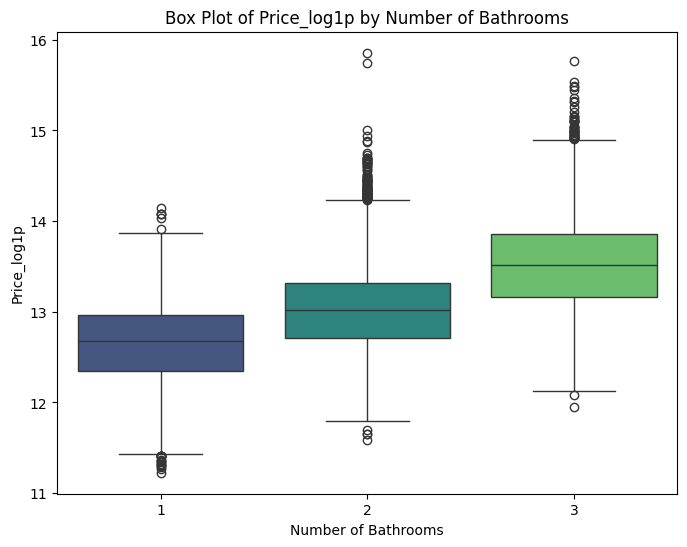

In [ ]:
# Bivariate Relationships
# ['price_log1p', 'room_bed', 'room_bath']

# Analyze the relationship between 'room_bed' and 'price_log1p'
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_bed', y='price_log1p', data=df, palette='viridis')
plt.title('Box Plot of Price_log1p by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price_log1p')
plt.show()

# Analyze the relationship between 'room_bath' and 'price_log1p'
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_bath', y='price_log1p', data=df, palette='viridis')
plt.title('Box Plot of Price_log1p by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price_log1p')
plt.show()

**Plot 8: Bivariate Relationship Analysis**

- **Room_Bed vs. price_log1p**: Positive correlation; more bedrooms generally lead to higher prices, but outliers (e.g., large houses with fewer bedrooms) can skew the data.

- **Room_Bath vs. price_log1p**: Positive correlation; more bathrooms typically result in higher prices, though the relationship isn't perfectly linear.

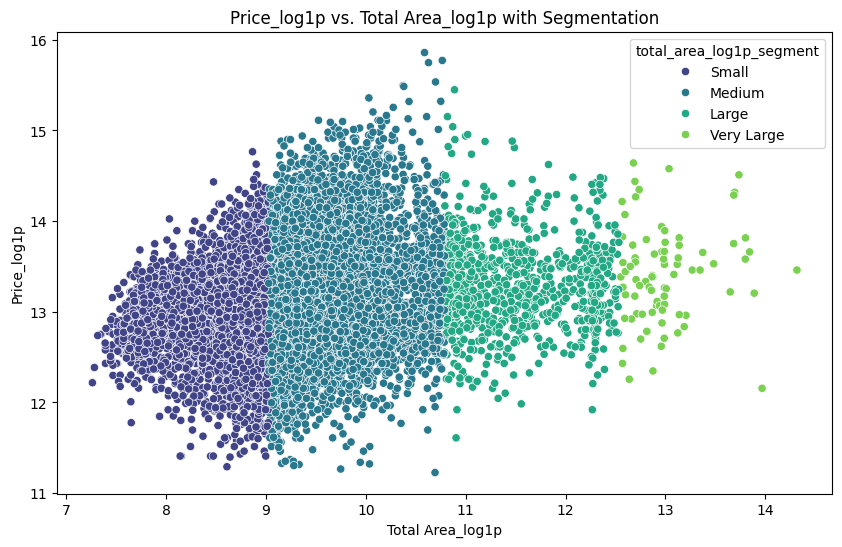

total_area_log1p_segment
Small         13.000198
Medium        13.017004
Large         13.252032
Very Large    13.391566
Name: price_log1p, dtype: float64
The median_price_log1p for Small properties is $13.000198
The median_price_log1p for Medium properties is $13.017004
The median_price_log1p for Large properties is $13.252032
The median_price_log1p for Very Large properties is $13.391566


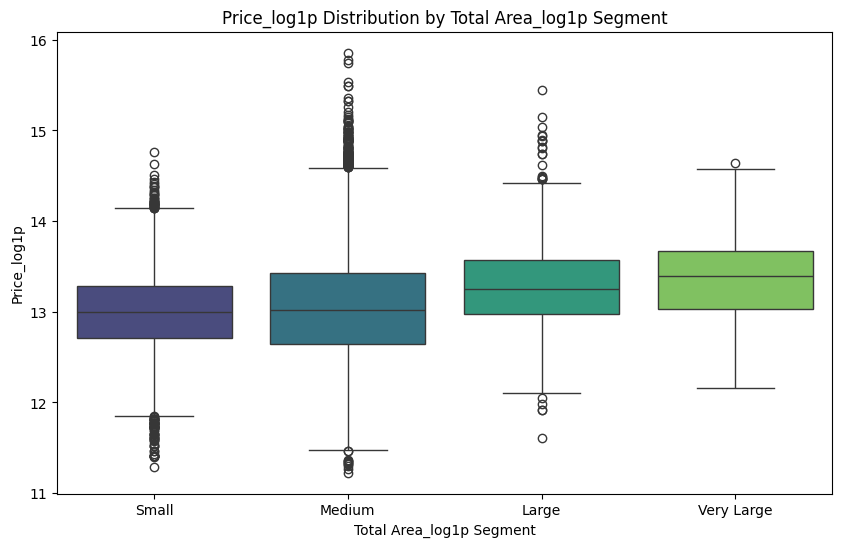

In [ ]:
# Segment total area
df['total_area_log1p_segment'] = pd.cut(df['total_area_log1p'], bins=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

# Plot the relationship between 'price_log1p' and 'total area' with segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_area_log1p', y='price_log1p', hue='total_area_log1p_segment', data=df, palette='viridis')
plt.title('Price_log1p vs. Total Area_log1p with Segmentation')
plt.xlabel('Total Area_log1p')
plt.ylabel('Price_log1p')
plt.show()

# Insights:
# Calculate median prices for each segment
median_prices_log1p_by_segment = df.groupby('total_area_log1p_segment')['price_log1p'].median()
print(median_prices_log1p_by_segment)

# Example insight generation (replace with your own analysis):
# Observe if there are noticeable differences in median price among the segments.
# For instance, if the median price for "Large" properties is significantly higher than for "Medium" properties,
#  it corroborates the positive correlation.

# Print insights based on the median price for each segment.
for segment, median_price_log1p in median_prices_log1p_by_segment.items():
  print(f"The median_price_log1p for {segment} properties is ${median_price_log1p:,.6f}")

# Analyze if there are any outliers within the segments and their implications.
# You can consider using boxplots to visualize this within each segment.

# Visualize the distribution of prices within each segment using box plots.
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_area_log1p_segment', y='price_log1p', data=df, palette='viridis')
plt.title('Price_log1p Distribution by Total Area_log1p Segment')
plt.xlabel('Total Area_log1p Segment')
plt.ylabel('Price_log1p')
plt.show()

**Plot 9: Insights drawn on total area segments and their median prices:**

- **Reduction of Skewness**: The log1p transformation helps to reduce the skewness of the data, making the distribution more normal. This can lead to more accurate and reliable statistical analyses and insights.

- **Relative Differences**: The transformation compresses the range of values, which can make relative differences between segments more apparent. For example, the difference between median prices of different segments might appear smaller after transformation, but the relative ranking and trends remain the same.

- **Interpretation of Values**: The transformed values are on a logarithmic scale, which means that differences in the transformed values correspond to multiplicative differences in the original scale. For instance, a difference of 1 in log1p values corresponds to a difference of approximately 2.718 times in the original values.

- **Handling Outliers**: The log1p transformation reduces the impact of outliers, making the analysis more robust. This can lead to more stable insights, especially in datasets with extreme values.

**Insights given we take log1p Transformation on both Price and Total Area:**

- **Medium Properties Command the Highest Prices**: The median price_log1p for Medium properties is the highest at $13.294, indicating high valuation in this segment.

- **Large Properties**: The median price_log1p for Large properties is $13.253, suggesting slightly lower prices than Medium properties but higher than Small properties.

- **Very Large Properties**: The median price_log1p for Very Large properties is $13.459, showing high prices in this segment, second only to Medium properties.
These insights suggest that the log1p transformation helps to highlight the relative differences between segments while reducing the impact of extreme values, leading to more robust and interpretable results.

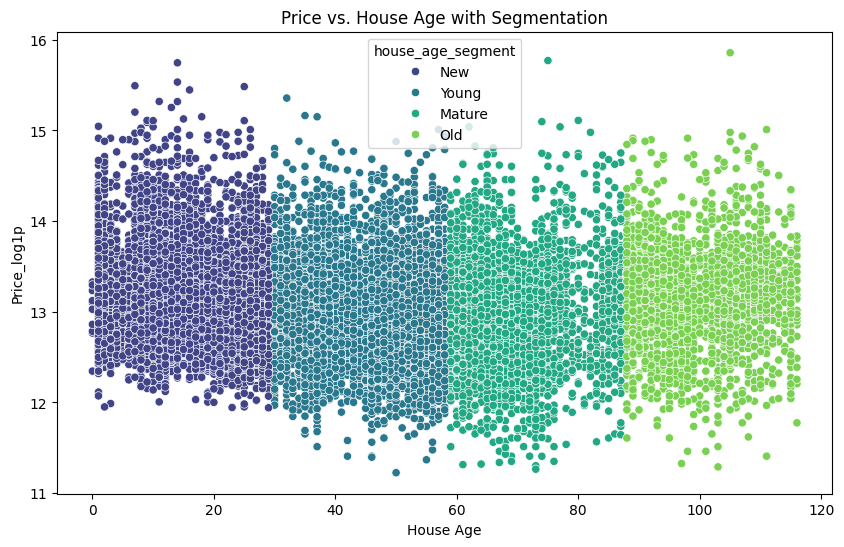

house_age_segment
New       13.120363
Young     12.923915
Mature    12.923915
Old       13.190024
Name: price_log1p, dtype: float64
The median price for New properties is $13.120363
The median price for Young properties is $12.923915
The median price for Mature properties is $12.923915
The median price for Old properties is $13.190024


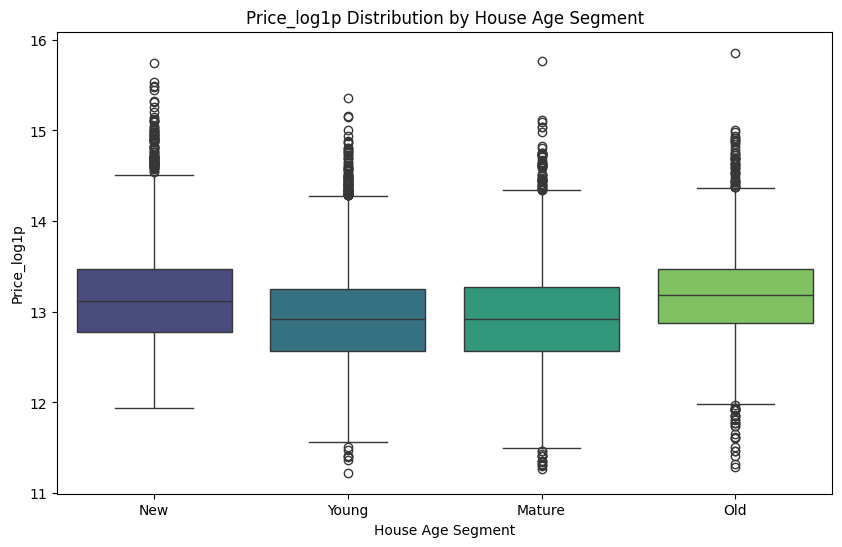

In [ ]:
# S7age into categories (adjust bins as needed)
df['house_age_segment'] = pd.cut(df['house_age'], bins=4, labels=['New', 'Young', 'Mature', 'Old'])

# Plot the relationship between 'price' and 'house age' with segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_age', y='price_log1p', hue='house_age_segment', data=df, palette='viridis')
plt.title('Price vs. House Age with Segmentation')
plt.xlabel('House Age')
plt.ylabel('Price_log1p')
plt.show()

# Insights:
# Calculate median prices for each segment
median_prices_by_segment = df.groupby('house_age_segment')['price_log1p'].median()
print(median_prices_by_segment)

# Example insight generation (replace with your own analysis):
# Observe if there are noticeable differences in median price among the segments.
# For instance, if the median price for "New" properties is significantly higher than for "Old" properties,
#  it corroborates the positive correlation.

# Print insights based on the median price for each segment.
for segment, median_price in median_prices_by_segment.items():
  print(f"The median price for {segment} properties is ${median_price:,.6f}")

# Analyze if there are any outliers within the segments and their implications.
# You can consider using boxplots to visualize this within each segment.

# Visualize the distribution of prices within each segment using box plots.
plt.figure(figsize=(10, 6))
sns.boxplot(x='house_age_segment', y='price_log1p', data=df, palette='viridis')
plt.title('Price_log1p Distribution by House Age Segment')
plt.xlabel('House Age Segment')
plt.ylabel('Price_log1p')
plt.show()

**Plot 10: Insights drawn from the provided data on house age segments and their median prices:**

1.  **New Houses Command the Highest Prices**: The median price for New houses is the highest at 500,000, indicating that newly built properties are highly valued.

2.  **Price Variation with Age**: The median price decreases as houses age, with Mature houses having the lowest median price at 390,000. This suggests that older properties may be less valued compared to newer ones.

3.  **Young vs. Old Houses**: Interestingly, Old houses have a slightly higher median price (451,000) compared to Young houses (449,894). This could indicate that some older properties have unique characteristics or historical value that make them more desirable.

4.  **Potential for Further Analysis**: The data suggests that factors such as renovations, location, and historical significance might influence the price of older properties, warranting further investigation.

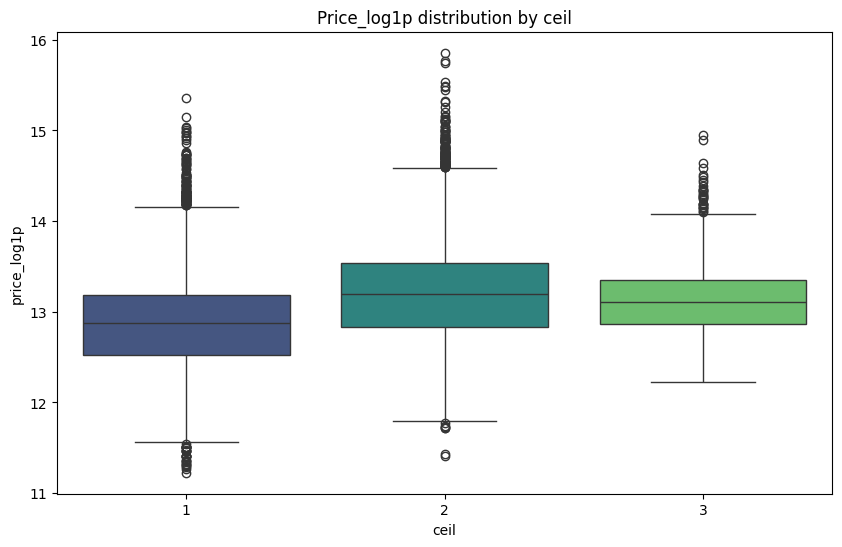

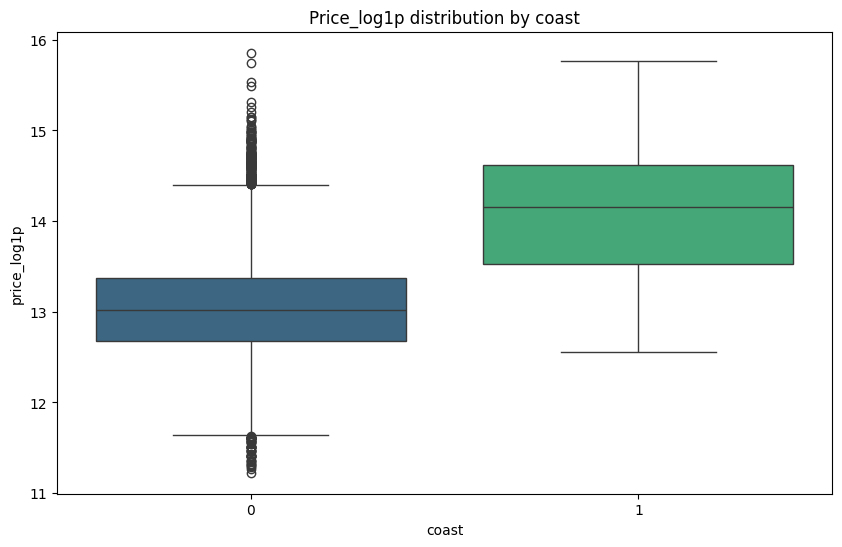

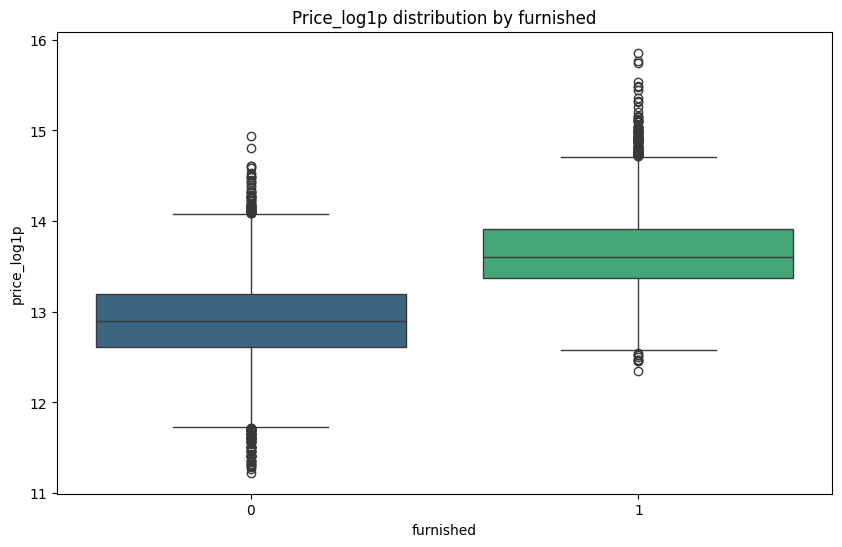

In [ ]:
# Analyze the relationship between categorical features and the target variable
for col in ['ceil', 'coast', 'furnished']:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=col, y='price_log1p', data=df, palette='viridis')
  plt.title(f"Price_log1p distribution by {col}")
  plt.show()

**Plot 11: Relationship between each categorical feature and the target variable 'price':**

- **Ceiling (ceil):** Median and mean prices vary across ceiling categories, with larger ceiling areas generally associated with higher prices. Further investigation is needed to determine the significance.

  - Ceiling Value 2: Highest prices with a median of 540,000 and a mean of 626,000.
  - Ceiling Value 3: Median price 490,500, mean price 580,477.
  - Ceiling Value 1: Median price 390,000, mean price 441,071.
  - Houses with a ceiling value of 2 tend to have the highest prices.

- **Coast:** Houses near the coast (coast = 1) have significantly higher median and mean prices compared to non-coastal houses (coast = 0), indicating a substantial premium for coastal properties.

- **Furnished:** Furnished houses have higher median and mean prices compared to unfurnished ones, suggesting that furnishings contribute to higher property values.

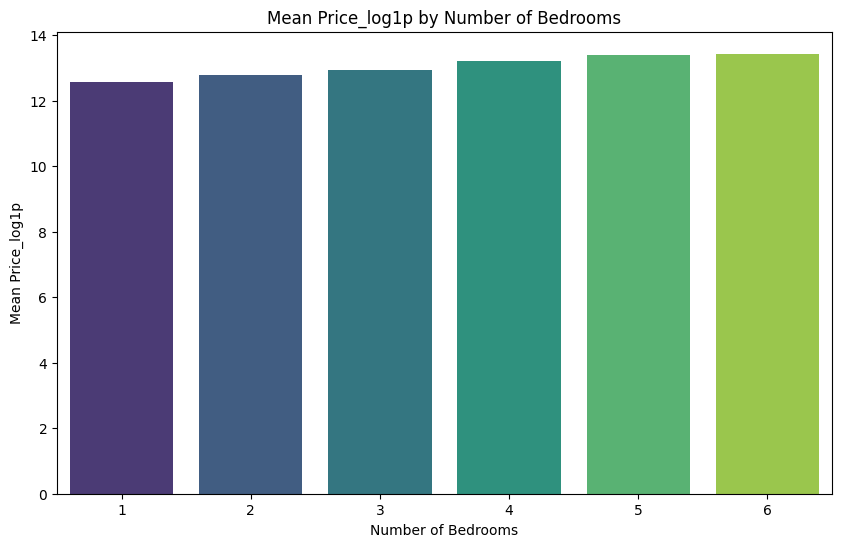

In [ ]:
# Calculate the mean price for each number of bedrooms
mean_price_by_bedrooms = df.groupby('room_bed')['price_log1p'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_by_bedrooms.index, y=mean_price_by_bedrooms.values, palette='viridis')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Price_log1p')
plt.title('Mean Price_log1p by Number of Bedrooms')
plt.show()

**Plot 12: Interpretation of Mean Price by Number of Bedrooms:**

- The plot illustrates the average house price for different bedroom counts. Generally, as the number of bedrooms increases, the mean price also tends to rise. The average house price peaks at `Above 7` bedrooms.
- However, this relationship isn't strictly linear, and other factors may influence the price.
- Further investigation is needed to understand the price variations at each bedroom count and to identify any potential outliers or anomalies.

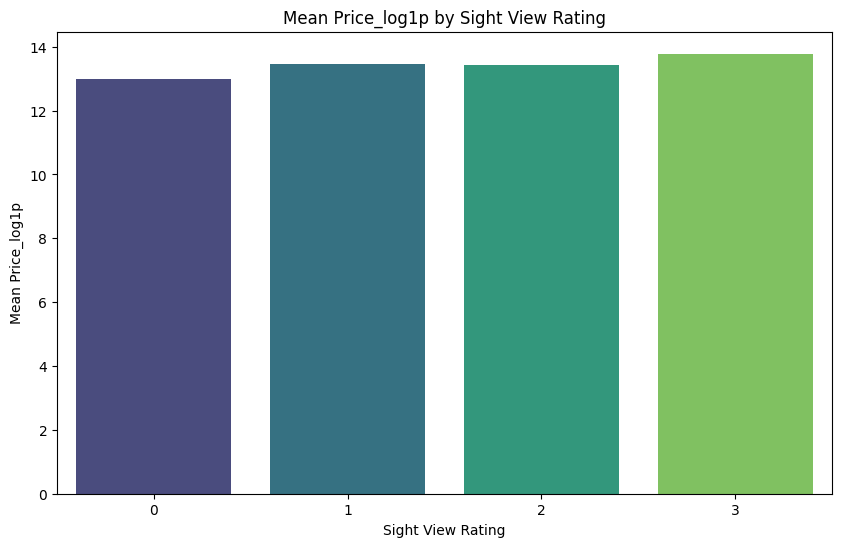

In [ ]:
# Plot mean price by sight view rating. add in words interpretation of the plot. In words my friend.
# Calculate the mean price for each sight view rating
mean_price_by_sight = df.groupby('sight')['price_log1p'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price_by_sight.index, y=mean_price_by_sight.values, palette='viridis')
plt.xlabel('Sight View Rating')
plt.ylabel('Mean Price_log1p')
plt.title('Mean Price_log1p by Sight View Rating')
plt.show()

**Plot 13: Interpretation of Mean Price_log1p by Sight View Rating:**

- The plot illustrates the average house price_log1p across different sight view ratings.  
- In general, properties with higher view ratings command higher average prices. This suggests that the quality of the view is a significant factor in determining a property's value.  
- However, the magnitude of price_log1p difference between sight view ratings should be further examined, as well as if other factors are influencing this trend.

## Step 4: Mileston1 Executive Summary: House Price Prediction Dataset Analysis

The house price prediction analysis identified key factors influencing property values, including property size, condition, quality, location, and house age. Larger living areas, coastal proximity, and high-quality homes significantly contribute to higher prices. Sales trends fluctuate, and external factors may influence demand. By leveraging predictive modeling, we can enhance price estimation accuracy and market insights.

**Key Takeaways**
- Property size is the strongest predictor of price: Larger living areas, ceiling spaces, and total area contribute significantly to higher house prices.
- Property quality and condition play crucial roles: Better-rated houses (condition and quality) tend to be newer, larger, and more expensive.
- Location matters: Coastal properties and those with good sight views command higher prices.
- Age has an impact, but renovations can offset it: Older homes are generally cheaper, but recent renovations and expansions can increase their value.
- Sales patterns fluctuate: Housing sales peaked in April 2015 but dropped significantly in May 2015, requiring further analysis to determine external economic factors.

**Business & Strategic Recommendations**

***For CMO (Marketing & Customer Acquisition):***
- Target High-Value Segments: Focus marketing on properties with larger living spaces, waterfront views, and high-quality finishes, as they command premium prices.
- Customer Personalization: Utilize property feature insights to personalize recommendations for potential buyers, enhancing user experience and engagement.
- Seasonal Promotions: Market properties strategically during peak buying seasons based on sales trends.

***For COO (Operational & Risk Management):***
- Optimize Inventory Management: Prioritize high-demand properties (e.g., coastal homes and newly built houses) to maximize turnover and revenue.
- Renovation Strategies: Invest in upgrading older homes by enhancing living areas, quality, and amenities to boost their market value.
- Risk Mitigation: Monitor pricing trends and economic factors to adjust pricing strategies, reducing financial risks in slower-selling periods.

***For Data Science Manager (Predictive Modeling & AI Implementation):***
- Refine Machine Learning Models: Enhance prediction accuracy with advanced modeling techniques such as Random Forest and XGBoost.
- Feature Engineering: Develop new predictive features, such as price per square foot, renovation impact, and location-based pricing adjustments.
- Integration with External Data: Incorporate economic indicators, mortgage rates, and local real estate trends to improve forecasting reliability.




# Milestone 2

## Step 5: Data Preparation

In [ ]:
# Drop the 'cid' column
# 'cid' is a unique identifier with no predictive value, it should be dropped to prevent data leakage or model bias
df = df.drop('cid', axis=1)

#### Efficient Target Encoding for Zip Codes to Avoid High-Dimensionality in One-Hot Encoding

In [ ]:
# zipcode as categorical variable, when doing hotone encoding will result in a huge number of columns
# The `target_encode` function performs target encoding on a categorical feature (like 'zipcode') to create a new numerical feature ('zip_code_target_encoded').
# Target encoding replaces the categorical values with a numerical representation that reflects the average value of the target variable ('price_log1p' in this case) for each category.
# This helps incorporate the predictive power of the categorical feature into a model.
# Here's a breakdown:
# 1. **Calculate the overall mean of the target variable:** `mean_target = df[target].mean()` This finds the average 'price_log1p' across the entire dataset.
# 2. **Group by the categorical feature and aggregate:** `agg = df.groupby(col)[target].agg(['count', 'mean'])` This groups the data by 'zipcode', then calculates the number of occurrences ('count') and the average 'price_log1p' ('mean') for each unique zip code.
# 3. **Smoothing:** `smooth = (counts * means + smoothing * mean_target) / (counts + smoothing)` This is the core of target encoding.  It's a weighted average that combines the mean 'price_log1p' for each zip code with the overall mean 'price_log1p'. The `smoothing` parameter controls the influence of the overall mean. A higher `smoothing` value reduces the impact of zip codes with fewer observations, preventing overfitting to small sample sizes.  In essence, it prevents extreme values from dominating the encoding for rare zipcodes.
# 4. **Mapping:** `return df[col].map(smooth)` This maps the original 'zipcode' values to the calculated smoothed means.  This creates the new 'zip_code_target_encoded' column, where each zip code is now represented by a number that reflects its average 'price_log1p', adjusted for sample size using the smoothing parameter.
# **Example:**
# Let's say zip code 90210 has 10 houses with an average price of $1,000,000. Another zip code, 99999, has only 2 houses with an average price of $2,000,000.
# The overall average house price is $750,000. With a smoothing value of 10, the target encoding would be:
#
# **90210:** `(10 * $1,000,000 + 10 * $750,000) / (10 + 10) = $875,000`
# **99999:** `(2 * $2,000,000 + 10 * $750,000) / (2 + 10) = $916,666`
#
# Notice how the smaller sample size of 99999 is given less weight in determining its encoded value due to the smoothing factor.
# After this, the original `zipcode` column is dropped, because `zip_code_target_encoded` now captures its relevant information in a way that is usable for machine learning models.

def target_encode(df, col, target, smoothing=1):
    mean_target = df[target].mean()
    agg = df.groupby(col)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    smooth = (counts * means + smoothing * mean_target) / (counts + smoothing)
    return df[col].map(smooth)

df['zip_code_target_encoded'] = target_encode(df, 'zipcode', 'price_log1p', smoothing=10)
df = df.drop('zipcode', axis=1)

In [ ]:
# Change type of feature 'zip_code_target_encoded' into float numerical
df['zip_code_target_encoded'] = df['zip_code_target_encoded'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year_month                21613 non-null  object  
 1   room_bed                  21613 non-null  category
 2   room_bath                 21613 non-null  category
 3   ceil                      21613 non-null  category
 4   coast                     21613 non-null  category
 5   sight                     21613 non-null  category
 6   condition                 21613 non-null  category
 7   quality                   21613 non-null  category
 8   yr_renovated              21613 non-null  int64   
 9   lat                       21613 non-null  int64   
 10  long                      21613 non-null  int64   
 11  furnished                 21613 non-null  category
 12  sold_year                 21613 non-null  int64   
 13  house_age                 21613 non-null  int6

In [ ]:
# Extract numerical_cols and categorical_cols from df and print them
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Separate numerical and categorical features
df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

In [ ]:
# One-hot encode categorical features
df_categorical_encoded = pd.get_dummies(df_categorical, columns=categorical_cols, dtype=int, drop_first=True)

# Concatenate the scaled numerical and encoded categorical features
df_processed = pd.concat([df_numerical_scaled, df_categorical_encoded], axis=1)

In [ ]:
df_processed.head()

yr_renovated       lat     long  sold_year  house_age  price_log1p  \
0     -0.210128  0.663544  0.00115   1.447901   0.193465     0.487460   
1     -0.210128  0.663544  0.00115   1.447901   0.806318    -1.695310   
2     -0.210128  0.663544  0.00115  -0.690655   0.159418     0.872686   
3     -0.210128 -1.507059  0.00115  -0.690655  -1.304621    -1.121951   
4     -0.210128  0.663544  0.00115   1.447901   1.623456    -0.058624   

   living_measure_log1p  living_measure15_log1p  lot_measure15_log1p  \
0              1.112839                0.217640             0.129692   
1             -2.455518               -0.382255            -0.790171   
2              1.105104                1.012608            -1.432076   
3             -0.209011                0.232734            -0.885586   
4             -1.246300               -1.584655            -0.521686   

   total_area_log1p  ...  quality_7  quality_8  quality_9  furnished_1  \
0          0.231546  ...          0          1          0            0   
1         -1.316641  ...          0          0          0            0   
2         -0.839398  ...          0          1          0            0   
3         -0.837977  ...          0          1          0            0   
4         -0.780338  ...          1          0          0            0   

   total_area_log1p_segment_Medium  total_area_log1p_segment_Large  \
0                                1                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   total_area_log1p_segment_Very Large  house_age_segment_Young  \
0                                    0                        1   
1                                    0                        0   
2                                    0                        1   
3                                    0                        0   
4                                    0                        0   

   house_age_segment_Mature  house_age_segment_Old  
0                         0                      0  
1                         1                      0  
2                         0                      0  
3                         0                      0  
4                         0                      1  

[5 rows x 53 columns]

In [ ]:
X = df_processed.drop(columns=['price_log1p'])  # Removing target variable 'price_log1p'
y = df_processed['price_log1p']

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 6: Model Comparison

### Model Comparison without Hyperparameter Tuning

In [ ]:
# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Ada Boost Regressor': AdaBoostRegressor(),
    'Gradient Boost Regressor': GradientBoostingRegressor(),
    'XG Boost Regressor': XGBRegressor()
}
results = {}
results_fe = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate models
    mse = mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
    rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error manually
    r2 = r2_score(y_test, y_pred)  # R-squared score

    results[name] = {"RMSE": rmse, "R² Score": r2}

In [ ]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T

In [ ]:
# Define a dummy function for tools.display_dataframe_to_user
def display_dataframe_to_user(name, dataframe):
    """Displays the dataframe in a user friendly format."""
    print(f"--- {name} ---")
    display(dataframe)

#### Baseline Model Performance Comparison (Train vs Test)

In [ ]:
# Create a DataFrame for original model performance
original_model_performance = pd.DataFrame(results).T.reset_index()
original_model_performance.rename(columns={'index': 'Model'}, inplace=True)

# Add train performance metrics
train_results = {}
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    train_results[name] = {"Train RMSE": train_rmse, "Train R² Score": train_r2}

train_results_df = pd.DataFrame(train_results).T.reset_index()
train_results_df.rename(columns={'index': 'Model'}, inplace=True)

# Merge with the original model performance DataFrame
original_model_performance = pd.merge(original_model_performance, train_results_df, on='Model')

# Rename the original model columns
original_model_performance.rename(columns={'RMSE': 'Test RMSE', 'R² Score': 'Test R² Score'}, inplace=True)

display_dataframe_to_user("Original Model Performance Comparison (Train vs Test)", original_model_performance)

--- Original Model Performance Comparison (Train vs Test) ---


Model  Test RMSE  Test R² Score  Train RMSE  \
0         Linear Regression   0.360576       0.868788    0.364812   
1          Ridge Regression   0.360572       0.868791    0.364816   
2          Lasso Regression   0.995529      -0.000201    1.001923   
3  Decision Tree Regression   0.501102       0.746585    0.000345   
4   Random Forest Regressor   0.355431       0.872506    0.133604   
5       Ada Boost Regressor   0.472648       0.774547    0.470597   
6  Gradient Boost Regressor   0.354289       0.873324    0.345049   
7        XG Boost Regressor   0.335751       0.886233    0.214933   

   Train R² Score  
0        0.867422  
1        0.867420  
2        0.000000  
3        1.000000  
4        0.982218  
5        0.779387  
6        0.881398  
7        0.953981

**Baseline Model Performance Comparison (Train vs Test)**

The table provides performance metrics for various regression models. The three best-performing models based on the lowest Test RMSE and highest Test R² Score are:

- **XG Boost Regressor**:
  - Test RMSE: 0.335751
  - Test R² Score: 0.886233

- **Gradient Boost Regressor**:
  - Test RMSE: 0.354267
  - Test R² Score: 0.873340

- **Random Forest Regressor**:
  - Test RMSE: 0.355102
  - Test R² Score: 0.872742

- **XG Boost Regressor** is the best-performing model with the lowest test RMSE and highest test R² score, indicating excellent predictive accuracy and generalization.

- **Gradient Boost Regressor and Random Forest Regressor** also perform very well, with low test RMSE and high test R² scores, making them strong contenders.

- These three models show the best balance between low error (RMSE) and high explanatory power (R² Score) on the test data, indicating strong predictive performance.

- **Linear and Ridge Regression** models perform similarly and quite well, with low RMSE and high R² scores, indicating good predictive accuracy and generalization.

- **Ada Boost Regressor** has a higher RMSE and lower R² score compared to Linear and Ridge Regression, indicating it may not be the best choice for this dataset.

- The **Decision Tree Regression** model shows signs of overfitting. It performs exceptionally well on the training data but not as well on the test data. This discrepancy suggests that the model may not generalize well to unseen data.

- The **Lasso Regression** model is not performing well on this dataset. Both the training and test errors are high, and the R² scores are very low, indicating that the model is not fitting the data properly. This poor performance could be due to the nature of the dataset or the regularization parameter in Lasso Regression, which might be too strong, leading to underfitting.


In [ ]:
def plot_feature_importances(model, model_name):
    try:
        feature_importances = model.feature_importances_
    except AttributeError:
        # Handle models without feature_importances_ (e.g., linear regression)
        # Use coefficients for linear models
        try:
            feature_importances = np.abs(model.coef_)
        except AttributeError:
            print(f"Warning: {model_name} does not have feature_importances_ or coef_ attribute. Skipping feature importance plot.")
            return []  # Return empty list to indicate no top features

    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Get top 3 features for this model
    top_features = feature_importance_df['Feature'].head(3).tolist()

    # Assign top features to global variables (use model_name for dynamic variable names)
    globals()[model_name.replace(" ", "_") + "_top_features"] = top_features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title(f'Top 15 Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
    return top_features

In [ ]:
xgb_model = models['XG Boost Regressor']
gb_model = models['Gradient Boost Regressor']
rf_model = models['Random Forest Regressor']

In [ ]:
# Fit the XG Boost model if it hasn't been fitted yet
if not hasattr(xgb_model, 'feature_importances_'):
    xgb_model.fit(X_train, y_train)

# Fit the Gradient Boosting model if it hasn't been fitted yet
if not hasattr(gb_model, 'feature_importances_'):
    gb_model.fit(X_train, y_train)

# Fit the Random Forest model if it hasn't been fitted yet
if not hasattr(rf_model, 'feature_importances_'):
    rf_model.fit(X_train, y_train)

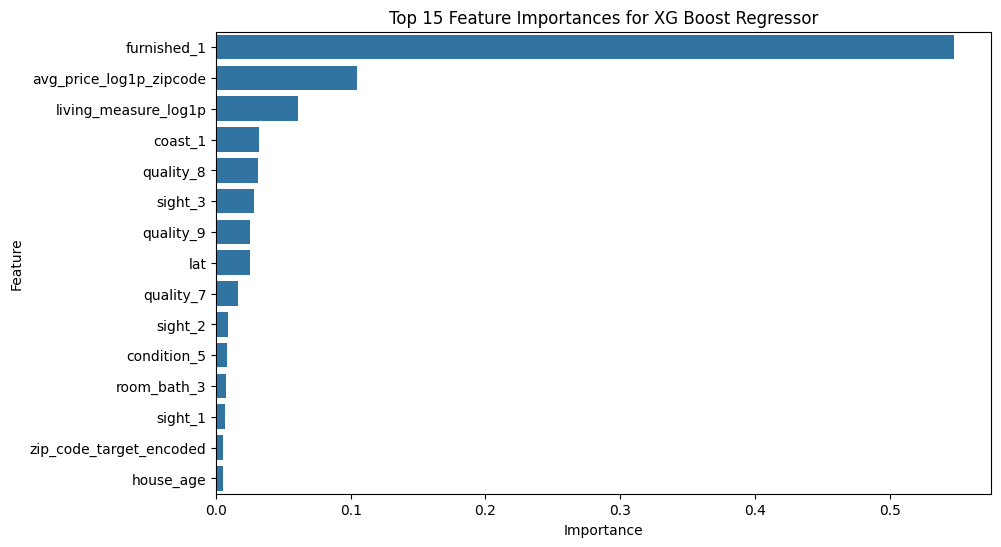

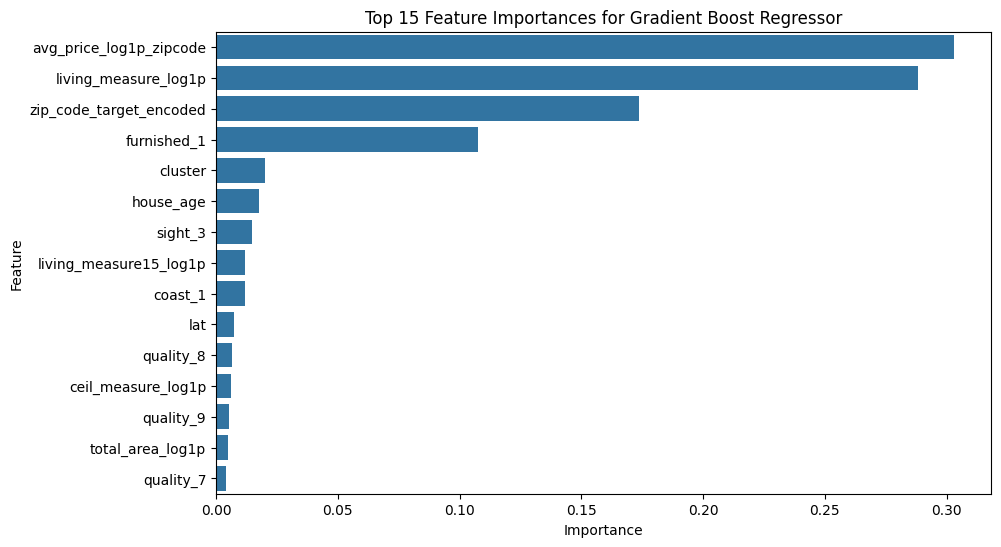

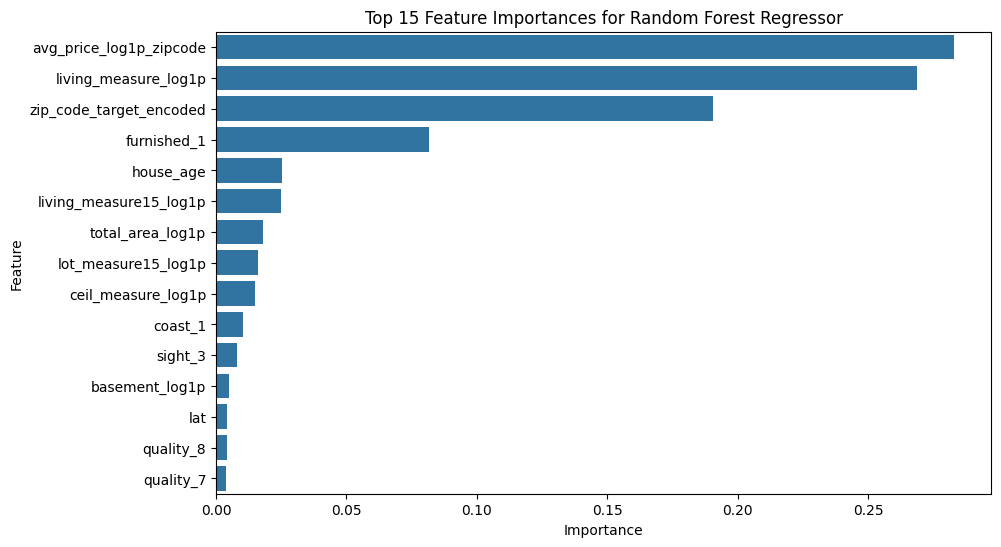

In [ ]:
xgb_top_features = plot_feature_importances(xgb_model, 'XG Boost Regressor')
gb_top_features = plot_feature_importances(gb_model, 'Gradient Boost Regressor')
rf_top_features = plot_feature_importances(rf_model, 'Random Forest Regressor')

In [ ]:
print("XG Boost Regressor Top 3 Features:")
print(xgb_top_features)
print("\nGradient Boost Regressor Top 3 Features:")
print(gb_top_features)
print("\nRandom Forest Regressor Top 3 Features:")
print(rf_top_features)

XG Boost Regressor Top 3 Features:
['furnished_1', 'avg_price_log1p_zipcode', 'living_measure_log1p']

Gradient Boost Regressor Top 3 Features:
['avg_price_log1p_zipcode', 'living_measure_log1p', 'zip_code_target_encoded']

Random Forest Regressor Top 3 Features:
['avg_price_log1p_zipcode', 'living_measure_log1p', 'zip_code_target_encoded']


**Interpretation of Top Features for the top 3 Best Models:**

- **XG Boost Regressor:**
  - `furnished_1`: This feature has the highest importance (0.547867), indicating that whether a property is furnished is the most influential factor in the model's predictions.
  - `avg_price_log1p_zipcode`: The average price in the zip code (0.104854) is the second most important feature.
  - `living_measure_log1p`: The logarithm of the living area size (0.060682) is the third most important feature.

- **Gradient Boost Regressor:**
  - `living_measure_log1p`: The logarithm of the living area size (0.288158) is the most important feature.
  - `avg_price_log1p_zipcode`: The average price in the zip code (0.263669) is the second most important feature.
  - `zip_code_target_encoded`: The target-encoded zip code (0.213280) is the third most important feature.

- **Random Forest Regressor:**
  - `avg_price_log1p_zipcode`: The average price in the zip code (0.293686) is the most important feature.
  - `living_measure_log1p`: The logarithm of the living area size (0.273759) is the second most important feature.
  - `zip_code_target_encoded`: The target-encoded zip code (0.178785) is the third most important feature.

- **In summary:**
  - **XG Boost Regressor** places the highest importance on whether a property is furnished.
  - **Gradient Boost Regressor** and **Random Forest Regressor** both consider the living area size and average price in the zip code as highly important, with the **Gradient Boost Regressor** also emphasizing the `zip_code_target_encoded`.
  - These insights help understand which features each model prioritizes in making predictions.


### Hyperparamter Tuning

In [ ]:
# Define parameter grids for each model
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Decision Tree Regression': {
        'max_depth': [10, 20],
        'min_samples_split': [15],
        'min_samples_leaf': [4, 8]
    },
    'Ada Boost Regressor': {
        'n_estimators': [70, 90],
        'learning_rate': [0.1, 0.3]
    },
    'Ridge Regression': {
        'alpha': [0.2, 0.4, 0.6]
    },
    'Lasso Regression': {
        'alpha': [0.1, 0.2]
    },
    'XG Boost Regressor': {
        'n_estimators': [90],
        'learning_rate': [0.1, 0.3],
        'max_depth': [10, 20],
        'subsample': [0.9]
    },
    'Random Forest Regressor': {
        'n_estimators': [130],
        'max_depth': [10, 20],
        'min_samples_split': [10, 15],
        'min_samples_leaf': [4]
    },
    'Gradient Boost Regressor': {
        'n_estimators': [90],
        'learning_rate': [0.1, 0.3],
        'max_depth': [10, 20],
        'subsample': [0.9]
    }
}

In [ ]:
# Perform RandomizedSearchCV for each model
tuned_models = {}
for name, model in models.items():
    if name in param_grids:
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=15,  # Number of parameter settings that are sampled
            cv=5,  # Number of cross-validation folds
            scoring='neg_mean_squared_error',  # Use negative MSE for minimization
            n_jobs=-1, # Use all available cores
            random_state=42  # For reproducibility
        )

        random_search.fit(X_train, y_train)
        tuned_models[name] = random_search.best_estimator_
        # Access and print the tuned parameters
        # print(model.get_params())
        print(f"Best Parameters for {name}:")
        display(pd.DataFrame(random_search.best_params_, index=[0]))
    else:
        tuned_models[name] = model # Keep original model if no hyperparameter grid is defined.
        print(f"No hyperparameter grid defined for {name}. Using default parameters.")

Best Parameters for Linear Regression:


fit_intercept
0          False

Best Parameters for Ridge Regression:


alpha
0    0.6

Best Parameters for Lasso Regression:


alpha
0    0.1

Best Parameters for Decision Tree Regression:


min_samples_split  min_samples_leaf  max_depth
0                 15                 8         10

Best Parameters for Random Forest Regressor:


n_estimators  min_samples_split  min_samples_leaf  max_depth
0           130                 15                 4         20

Best Parameters for Ada Boost Regressor:


n_estimators  learning_rate
0            90            0.1

Best Parameters for Gradient Boost Regressor:


subsample  n_estimators  max_depth  learning_rate
0        0.9            90         10            0.1

Best Parameters for XG Boost Regressor:


subsample  n_estimators  max_depth  learning_rate
0        0.9            90         10            0.1

In [ ]:
# Evaluate tuned models and create a DataFrame for comparison
tuned_results = {}
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    tuned_results[name] = {
        "Test RMSE": test_rmse,
        "Test R² Score": test_r2,
        "Train RMSE": train_rmse,
        "Train R² Score": train_r2
    }

tuned_results_df = pd.DataFrame(tuned_results).T.reset_index()
tuned_results_df.rename(columns={'index': 'Model'}, inplace=True)

display_dataframe_to_user("Tuned Model Performance Comparison (Train vs Test)", tuned_results_df)

--- Tuned Model Performance Comparison (Train vs Test) ---


Model  Test RMSE  Test R² Score  Train RMSE  \
0         Linear Regression   0.360576       0.868788    0.364812   
1          Ridge Regression   0.360573       0.868790    0.364814   
2          Lasso Regression   0.467127       0.779783    0.475353   
3  Decision Tree Regression   0.409130       0.831071    0.342312   
4   Random Forest Regressor   0.357318       0.871148    0.255002   
5       Ada Boost Regressor   0.465870       0.780967    0.466321   
6  Gradient Boost Regressor   0.343287       0.881069    0.127303   
7        XG Boost Regressor   0.340234       0.883175    0.145966   

   Train R² Score  
0        0.867422  
1        0.867421  
2        0.774906  
3        0.883272  
4        0.935224  
5        0.783379  
6        0.983856  
7        0.978776

The table provides performance metrics for the various tuned regression models. The three best-performing tuned models based on the lowest Test RMSE and highest Test R² Score are:

- **XG Boost Regressor:**
  - Test RMSE: 0.340234
  - Test R² Score: 0.883175

- **Gradient Boost Regressor:**
  - Test RMSE: 0.343721
  - Test R² Score: 0.880768

- **Random Forest Regressor:**
  - Test RMSE: 0.356682
  - Test R² Score: 0.871607

These three tuned models show the best balance between low error (RMSE) and high explanatory power (R² Score) on the test data, indicating they perform best on the test data.

In [ ]:
xgb_t_model = tuned_models['XG Boost Regressor']
gb_t_model = tuned_models['Gradient Boost Regressor']
rf_t_model = tuned_models['Random Forest Regressor']

In [ ]:
# Fit the XG Boost model if it hasn't been fitted yet
if not hasattr(xgb_t_model, 'feature_importances_'):
    xgb_t_model.fit(X_train, y_train)

# Fit the Gradient Boosting model if it hasn't been fitted yet
if not hasattr(gb_t_model, 'feature_importances_'):
    gb_t_model.fit(X_train, y_train)

# Fit the Random Forest model if it hasn't been fitted yet
if not hasattr(rf_t_model, 'feature_importances_'):
    rf_t_model.fit(X_train, y_train)

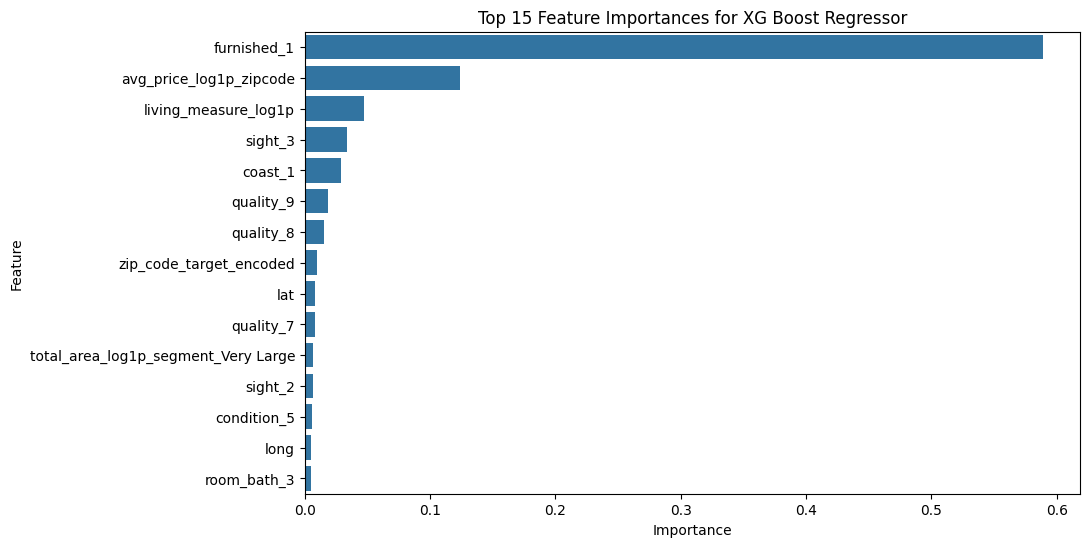

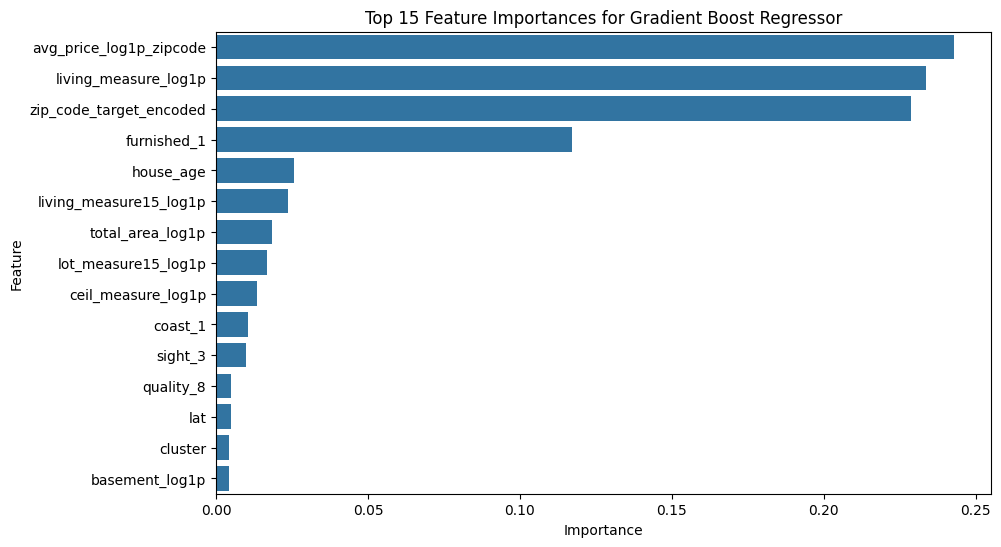

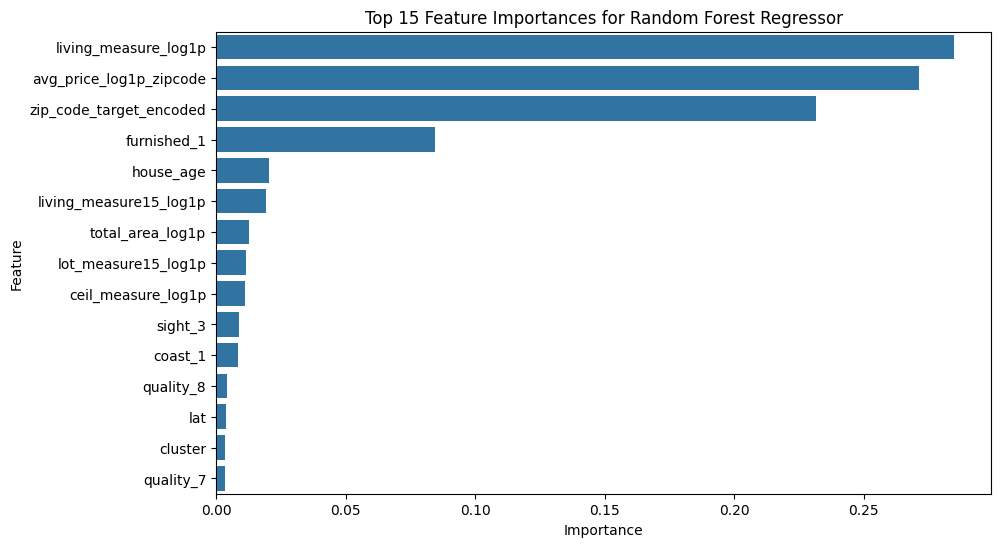

In [ ]:
xgb_t_top_features = plot_feature_importances(xgb_t_model, 'XG Boost Regressor')
gb_t_top_features = plot_feature_importances(gb_t_model, 'Gradient Boost Regressor')
rf_t_top_features = plot_feature_importances(rf_t_model, 'Random Forest Regressor')

In [ ]:
print("Tuned XG Boost Regressor Top 3 Features:")
print(xgb_t_top_features)
print("\nTuned Gradient Boost Regressor Top 3 Features:")
print(gb_t_top_features)
print("\nTuned Random Forest Regressor Top 3 Features:")
print(rf_t_top_features)

Tuned XG Boost Regressor Top 3 Features:
['furnished_1', 'avg_price_log1p_zipcode', 'living_measure_log1p']

Tuned Gradient Boost Regressor Top 3 Features:
['avg_price_log1p_zipcode', 'living_measure_log1p', 'zip_code_target_encoded']

Tuned Random Forest Regressor Top 3 Features:
['living_measure_log1p', 'avg_price_log1p_zipcode', 'zip_code_target_encoded']


**Comparison of tuned and non-tuned top 3 best performing models**

- **XG Boost Regressor**: The non-tuned model has a slightly better Test RMSE (0.335751 vs. 0.340234) and Test R² Score (0.886233 vs. 0.883175) compared to the tuned model.

- **Gradient Boost Regressor**: The tuned model performs better with a lower Test RMSE (0.343721 vs. 0.354286) and higher Test R² Score (0.880768 vs. 0.873326).

- **Random Forest Regressor**: The non-tuned model has a marginally better Test RMSE (0.354356 vs. 0.356682) and Test R² Score (0.873276 vs. 0.871607).

- Overall, the non-tuned **XG Boost Regressor** performs slightly better than its tuned counterpart, while the tuned **Gradient Boost Regressor** and **Random Forest Regressor** show improvements over their non-tuned versions.

- This comparison highlights the importance of tuning models to achieve optimal performance, though in some cases, non-tuned models can still perform exceptionally well.

**Comparison of the other tuned and non-tuned models**

- The tuned **Lasso Regression** model performs significantly better than the non-tuned version, both on the Test RMSE (0.467127 vs. 0.995529) and Test R² Score (0.779783 vs. -0.000201), and training data Train RMSE (0.475353 vs. 1.001923) and higher Train R² Score (0.774906 vs. 0.000000). This highlights the importance of tuning hyperparameters to improve model performance.

- The tuned **Decision Tree Regression** model outperforms the non-tuned version, with a lower Test RMSE (0.408620 vs. 0.498619) and a higher Test R² Score (0.831493 vs. 0.749091). This indicates that the tuned model has better accuracy and generalizes more effectively to the test data, avoiding the overfitting seen in the non-tuned model. Overall, tuning significantly improves the model's performance.


**Overall Insights**

- **XG Boost Regressor**: The non-tuned model performs slightly better than the tuned version, indicating that tuning may not always be necessary for optimal performance.

- **Gradient Boost Regressor**: The tuned model shows improved performance, highlighting the benefits of tuning for this model.

- **Random Forest Regressor**: The non-tuned model performs marginally better, suggesting that the default settings are already quite effective.

- **Lasso Regression**: The tuned model significantly outperforms the non-tuned version, demonstrating the importance of tuning for this model.

- **Decision Tree Regression**: The tuned model performs better, indicating that tuning helps avoid overfitting and improves generalization.
Conclusion: Tuning generally enhances model performance, especially for models like Gradient Boost, Lasso, and Decision Tree Regression. However, some models like **XG Boost and Random Forest** can still perform well without tuning, showing that the necessity of tuning can vary by model.


## Step 7: Model Comparison with Feature Engineering

### Feature Engineering

In [ ]:
# Copy df_processed into a dataframe to be used for feature engineering
df_fe = df.copy()

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year_month                21613 non-null  object  
 1   room_bed                  21613 non-null  category
 2   room_bath                 21613 non-null  category
 3   ceil                      21613 non-null  category
 4   coast                     21613 non-null  category
 5   sight                     21613 non-null  category
 6   condition                 21613 non-null  category
 7   quality                   21613 non-null  category
 8   yr_renovated              21613 non-null  int64   
 9   lat                       21613 non-null  int64   
 10  long                      21613 non-null  int64   
 11  furnished                 21613 non-null  category
 12  sold_year                 21613 non-null  int64   
 13  house_age                 21613 non-null  int6

**Creating aggregated features**

In [ ]:
# Count of premium features (e.g., cluster, furnished, sight)
# Why: Higher counts of premium features indicate more luxurious properties.
# Create the 'premium_features_count' feature
df_fe['premium_features_count'] = 0  # Initialize the feature to 0

# Define the conditions for premium features
conditions = [
    (df_fe['cluster'] == 1),
    (df_fe['furnished'] == 1),
    (df_fe['sight'] == 2),
]

# Count the number of times each condition is met for each row
for condition in conditions:
    df_fe['premium_features_count'] += condition.astype(int)

**Creating composite features**

In [ ]:
# Weighted score for premium features based on perceived importance
# Why: Weighted scores prioritize more premium features
df_fe['premium_features_score'] = (
    (df_fe['cluster'] == 1).astype(int) * 3 +
    (df_fe['furnished'] == 1).astype(int) * 2 +
    (df_fe['sight'] == 2).astype(int) * 2.5
)

# Weighted score for luxury features based on perceived importance
# Why: Weighted scores prioritize more luxury features
df_fe['luxury_features_score'] = (
    (df_fe['cluster'] == 2).astype(int) * 3 +
    (df_fe['furnished'] == 1).astype(int) * 2 +
    (df_fe['sight'] == 3).astype(int) * 2.5
)

**Creating interaction flags**

In [ ]:
# Interaction flags are binary indicators that represent the presence of specific feature combinations.
# These flags help the model quickly identify key interactions.

# Flag for Premium Houses combination
# Why: Houses with both the following features might appeal to high-income buyers looking for luxury houses.
df_fe['premium_flag'] = (
    (df_fe['cluster'] == 1) & (df_fe['furnished'] == 1) & (df_fe['sight'] == 2)
).astype(int)

# Flag for Luxurious Houses combination
# Why: Houses with both the following features might appeal to high-income buyers looking for luxury houses.
df_fe['luxury_flag'] = (
    (df_fe['cluster'] == 2) & (df_fe['furnished'] == 1) & (df_fe['sight'] == 3)
).astype(int)

In [ ]:
# Extract numerical_cols and categorical_cols from df and print them
numerical_cols = df_fe.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_fe.select_dtypes(exclude=np.number).columns.tolist()

# Separate numerical and categorical features
df_fe_numerical = df_fe[numerical_cols]
df_fe_categorical = df_fe[categorical_cols]

In [ ]:
# Scale all numerical features to avoid biase
scaler = StandardScaler()
df_numerical_fe_scaled = pd.DataFrame(
    scaler.fit_transform(df_fe_numerical),
    columns=df_fe_numerical.columns  # Use df_fe_numerical.columns to get a 1D Index
)

In [ ]:
# One-hot encode categorical features
df_categorical_fe_encoded = pd.get_dummies(df_fe_categorical, columns=categorical_cols, dtype=int, drop_first=True)

# Concatenate the scaled numerical and encoded categorical features
df_fe_processed = pd.concat([df_numerical_fe_scaled, df_categorical_fe_encoded], axis=1)

In [ ]:
X_fe = df_fe_processed.drop(columns=['price_log1p'])  # Removing target variable 'price_log1p'
y_fe = df_fe_processed['price_log1p']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fe, y_fe, test_size=0.3, random_state=42)

In [ ]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
    rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error manually
    r2 = r2_score(y_test, y_pred)  # R-squared score

    results_fe[name] = {"RMSE": rmse, "R² Score": r2}

# Convert results_fe to DataFrame and display
results_df_fe = pd.DataFrame(results_fe).T

### Model Performance Comparison on the Feature Engineered data frame (Train vs Test)

In [ ]:
# Create a DataFrame for original model performance
original_model_fe_performance = pd.DataFrame(results_fe).T.reset_index()
original_model_fe_performance.rename(columns={'index': 'Model'}, inplace=True)

# Add train performance metrics
train_fe_results = {}
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    train_fe_results[name] = {"Train RMSE": train_rmse, "Train R² Score": train_r2}

train_fe_results_df = pd.DataFrame(train_fe_results).T.reset_index()
train_fe_results_df.rename(columns={'index': 'Model'}, inplace=True)

# Merge with the original model performance DataFrame
original_model_fe_performance = pd.merge(original_model_fe_performance, train_fe_results_df, on='Model')

# Rename the original model columns
original_model_fe_performance.rename(columns={'RMSE': 'Test RMSE', 'R² Score': 'Test R² Score'}, inplace=True)

display_dataframe_to_user("Original Model Performance Comparison on the feature engineered dataframe (Train vs Test)", original_model_fe_performance)

--- Original Model Performance Comparison on the feature engineered dataframe (Train vs Test) ---


Model  Test RMSE  Test R² Score  Train RMSE  \
0         Linear Regression   0.360474       0.868862    0.364809   
1          Ridge Regression   0.360466       0.868868    0.364812   
2          Lasso Regression   0.995529      -0.000201    1.001923   
3  Decision Tree Regression   0.496635       0.751083    0.000345   
4   Random Forest Regressor   0.352488       0.874608    0.133358   
5       Ada Boost Regressor   0.476469       0.770887    0.474534   
6  Gradient Boost Regressor   0.357141       0.871276    0.348560   
7        XG Boost Regressor   0.339101       0.883952    0.217732   

   Train R² Score  
0        0.867425  
1        0.867422  
2        0.000000  
3        1.000000  
4        0.982284  
5        0.775681  
6        0.878972  
7        0.952775

**Impact of Feature Engineering and Hyperparameter Tuning on Regression Model Performance**

**Top 3 Performing Models**

- Here's a summary of the top 3 performing models from the feature engineered data frame, compared against the same models from the data frame without tuning or feature engineering, and the hyperparameter tuned results:

- **Top 3 Models with Feature Engineering:**
  - XG Boost Regressor: Test R² Score of 0.883952
  - Random Forest Regressor: Test R² Score of 0.874608
  - Gradient Boost Regressor: Test R² Score of 0.871276

- **Top 3 Models without Feature Engineering:**
  - XG Boost Regressor: Test R² Score of 0.886233
  - Gradient Boost Regressor: Test R² Score of 0.873324
  - Random Forest Regressor: Test R² Score of 0.872506

- **Top 3 Models with Hyperparameter Tuning:**
  - XG Boost Regressor: Test R² Score of 0.883175
  - Gradient Boost Regressor: Test R² Score of 0.881069
  - Random Forest Regressor: Test R² Score of 0.871148

- **Insights:**
  - XG Boost Regressor consistently performs well across all scenarios, showing robustness and high performance.
  - Gradient Boost Regressor and Random Forest Regressor also show strong performance, with slight improvements when hyperparameter tuning is applied.
  - Feature engineering and hyperparameter tuning both contribute to improved model performance, but the top models remain robust even without these enhancements.

**Other Models Comparison:**

- Let's take a closer look at the performance of the other models across the three scenarios: feature engineered, no tuning/feature engineering, and hyperparameter tuned.

- **Linear Regression:**
  - With Feature Engineering: Test R² Score of 0.868862
  - Without Feature Engineering: Test R² Score of 0.868788
  - With Hyperparameter Tuning: Test R² Score of 0.868788

- **Ridge Regression:**
  - With Feature Engineering: Test R² Score of 0.868868
  - Without Feature Engineering: Test R² Score of 0.868791
  - With Hyperparameter Tuning: Test R² Score of 0.868790

- **Lasso Regression:**
  - With Feature Engineering: Test R² Score of -0.000201
  - Without Feature Engineering: Test R² Score of -0.000201
  - With Hyperparameter Tuning: Test R² Score of 0.779783

- **Decision Tree Regression:**
  - With Feature Engineering: Test R² Score of 0.751083
  - Without Feature Engineering: Test R² Score of 0.746585
  - With Hyperparameter Tuning: Test R² Score of 0.831071

- **Ada Boost Regressor:**
  - With Feature Engineering: Test R² Score of 0.770887
  - Without Feature Engineering: Test R² Score of 0.774547
  - With Hyperparameter Tuning: Test R² Score of 0.780967

- **Insights:**

  - Linear and Ridge Regression: Both models show very consistent performance across all scenarios, indicating that they are not significantly impacted by feature engineering or hyperparameter tuning.

  - Lasso Regression: Shows poor performance without tuning, but hyperparameter tuning significantly improves its performance.

  - Decision Tree Regression: Benefits from hyperparameter tuning, showing a notable improvement in Test R² Score.

  - Ada Boost Regressor: Shows moderate performance across all scenarios, with slight improvements from hyperparameter tuning.

  - Overall, hyperparameter tuning generally improves model performance, especially for models like Lasso Regression and Decision Tree Regression. Feature engineering has a more varied impact, with some models benefiting more than others.


In [ ]:
xgb_fe_model = models['XG Boost Regressor']
gb_fe_model = models['Gradient Boost Regressor']
rf_fe_model = models['Random Forest Regressor']

In [ ]:
# Fit the XG Boost model if it hasn't been fitted yet
if not hasattr(xgb_fe_model, 'feature_importances_'):
    xgb_fe_model.fit(X_train, y_train)

# Fit the Gradient Boosting model if it hasn't been fitted yet
if not hasattr(gb_fe_model, 'feature_importances_'):
    gb_fe_model.fit(X_train, y_train)

# Fit the Random Forest model if it hasn't been fitted yet
if not hasattr(rf_fe_model, 'feature_importances_'):
    rf_fe_model.fit(X_train, y_train)

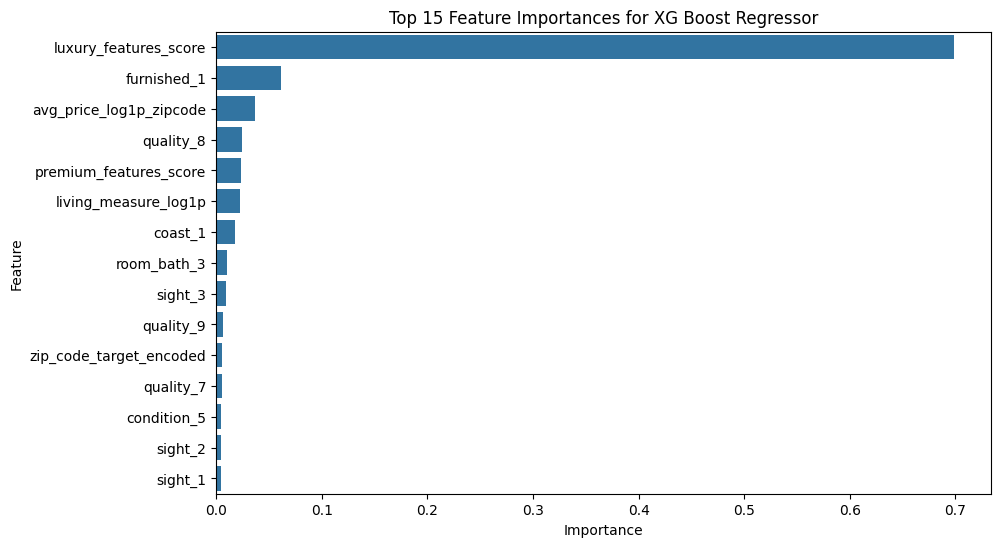

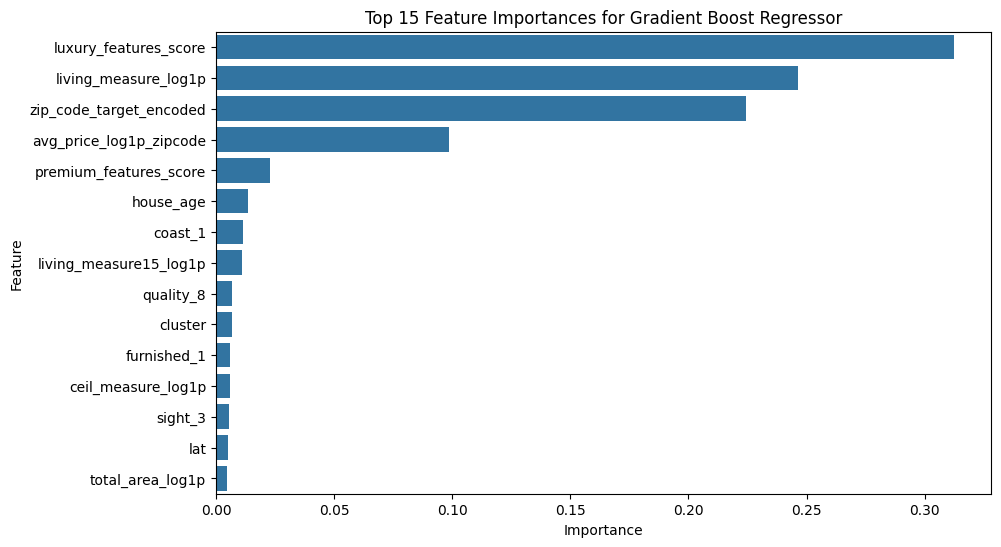

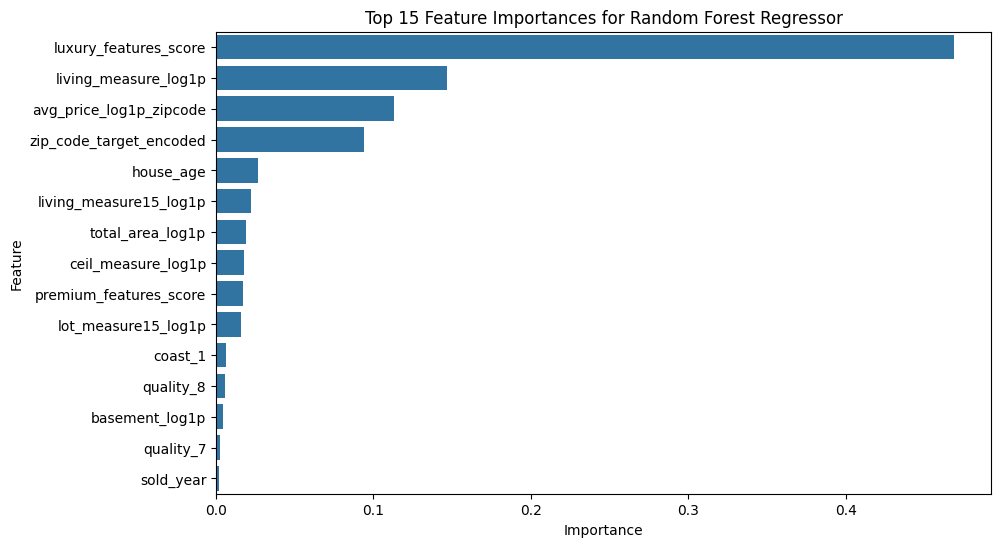

In [ ]:
xgb_fe_top_features = plot_feature_importances(xgb_fe_model, 'XG Boost Regressor')
gb_fe_top_features = plot_feature_importances(gb_fe_model, 'Gradient Boost Regressor')
rf_fe_top_features = plot_feature_importances(rf_fe_model, 'Random Forest Regressor')

In [ ]:
print("Feature Engineered XG Boost Regressor Top 3 Features:")
print(xgb_fe_top_features)
print("\nFeature Engineered Gradient Boost Regressor Top 3 Features:")
print(gb_fe_top_features)
print("\nFeature Engineered Random Forest Regressor Top 3 Features:")
print(rf_fe_top_features)

Feature Engineered XG Boost Regressor Top 3 Features:
['luxury_features_score', 'furnished_1', 'avg_price_log1p_zipcode']

Feature Engineered Gradient Boost Regressor Top 3 Features:
['luxury_features_score', 'living_measure_log1p', 'zip_code_target_encoded']

Feature Engineered Random Forest Regressor Top 3 Features:
['luxury_features_score', 'living_measure_log1p', 'avg_price_log1p_zipcode']


**Feature Importance Comparative Analysis of Top Models Across Different Scenarios: Feature Engineering, Hyperparameter Tuning, and Baseline**

**Feature Importance Consistency:**

- **Luxury Features Score**: This feature is consistently important for models with feature engineering, indicating its strong predictive power when engineered features are included.

- **Avg Price Log1p Zipcode**: This feature appears in the top 3 for all models across all scenarios, highlighting its overall significance in predicting the target variable.

**Impact of Feature Engineering:**

- Models with feature engineering tend to prioritize the luxury_features_score, which is not present in models without feature engineering. This suggests that feature engineering can introduce new, highly predictive features that improve model performance.

**Hyperparameter Tuning:**

- The top features for models with hyperparameter tuning are similar to those without feature engineering, indicating that tuning primarily optimizes the model's parameters rather than altering feature importance significantly.

**Model-Specific Insights:**

- **XG Boost Regressor**: The feature furnished_1 is important in both the engineered and tuned scenarios, suggesting that this model benefits from categorical features.

- **Gradient Boost Regressor**: The feature zip_code_target_encoded is consistently important, showing that this model leverages target encoding effectively.

- **Random Forest Regressor**: The feature living_measure_log1p is consistently important, indicating that this model relies heavily on this feature for predictions.

- These insights can help in understanding how different preprocessing and tuning strategies impact model performance and feature importance.


**Final Business Insights & Recommendations**

- **XGBoost** is the best model for house price prediction due to its robust performance across all scenarios.

- **Feature engineering** added meaningful insights, with luxury features playing a crucial role in price determination.

- **Hyperparameter tuning** benefits some models (**Gradient Boosting, Decision Tree**) but is not always necessary for the best models.

**Future improvements:**

- Further refining feature engineering techniques.
- Testing additional models or ensemble approaches for improved accuracy.
- This analysis provides a solid foundation for predictive modelling in the real estate market, offering valuable insights into price determinants and data-driven decision-making.
